<a href="https://colab.research.google.com/github/mjiii25/22-1_DLAI/blob/main/team-project/modeling-dl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load data

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
# data path
dpath = "/content/drive/MyDrive/"

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# H1N1 Model.ver1

In [ ]:
train_h1n1_ver1 = pd.read_csv('/content/drive/MyDrive/22-1_DLAI_Team_Project/train_h1n1_ver1.csv')

In [ ]:
print(train_h1n1_ver1.shape)
train_h1n1_ver1.head()

(24828, 24)


,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,age_group,race,sex,hhs_geo_region,census_msa,household_adults,household_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,1.0,2.0,4,1,1,8,1,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,4.0,4.0,2,1,2,1,2,0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1,1,2,9,2,2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,3.0,5.0,5,1,1,5,3,0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,3.0,2.0,3,1,1,9,2,1.0,0.0,0


In [ ]:
## split feature and target, train set and validation set

from sklearn.model_selection import train_test_split

feature = train_h1n1_ver1.iloc[:,1:-1]
target = train_h1n1_ver1['h1n1_vaccine']

x_train_h1n1_ver1, x_valid_h1n1_ver1, y_train_h1n1_ver1, y_valid_h1n1_ver1 = train_test_split(feature, target, test_size=0.2,shuffle=True,
                                                                                              stratify=target,  random_state=1234) 

### Layer effect

**layer 3개**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_h1n1_ver1_s = keras.Sequential([
                                    layers.Dense(16, activation = "relu"),
                                    layers.Dense(16, activation = "relu"),
                                    layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_h1n1_ver1_s.compile(optimizer = "rmsprop",
                          loss = "binary_crossentropy",
                          metrics = ["accuracy"])



# fitting model

history_h1n1_ver1_s = model_h1n1_ver1_s.fit(x_train_h1n1_ver1,
                                            y_train_h1n1_ver1,
                                            epochs = 20,
                                            batch_size = 512,
                                            validation_data = (x_valid_h1n1_ver1, y_valid_h1n1_ver1))


Epoch 1/20
39/39 [==============================] - 1s 8ms/step - loss: 0.5342 - accuracy: 0.7666 - val_loss: 0.5082 - val_accuracy: 0.7813
Epoch 2/20
39/39 [==============================] - 0s 4ms/step - loss: 0.4889 - accuracy: 0.7883 - val_loss: 0.4850 - val_accuracy: 0.7908
Epoch 3/20
39/39 [==============================] - 0s 4ms/step - loss: 0.4746 - accuracy: 0.7956 - val_loss: 0.4776 - val_accuracy: 0.7952
Epoch 4/20
39/39 [==============================] - 0s 4ms/step - loss: 0.4682 - accuracy: 0.7981 - val_loss: 0.4743 - val_accuracy: 0.7948
Epoch 5/20
39/39 [==============================] - 0s 4ms/step - loss: 0.4650 - accuracy: 0.8011 - val_loss: 0.4711 - val_accuracy: 0.7968
Epoch 6/20
39/39 [==============================] - 0s 4ms/step - loss: 0.4620 - accuracy: 0.8001 - val_loss: 0.4688 - val_accuracy: 0.8000
Epoch 7/20
39/39 [==============================] - 0s 4ms/step - loss: 0.4595 - accuracy: 0.8023 - val_loss: 0.4683 - val_accuracy: 0.7970
Epoch 8/20
39/39 [==

**layer 8개**


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_h1n1_ver1_b = keras.Sequential([
                                    layers.Dense(256, activation = "relu"),
                                    layers.Dense(256, activation = "relu"),
                                    layers.Dense(128, activation = "relu"),
                                    layers.Dense(64, activation = "relu"),
                                    layers.Dense(64, activation = "relu"),
                                    layers.Dense(16, activation = "relu"),
                                    layers.Dense(16, activation = "relu"),
                                    layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_h1n1_ver1_b.compile(optimizer = "rmsprop",
                          loss = "binary_crossentropy",
                          metrics = ["accuracy"])



# fitting model

history_h1n1_ver1_b = model_h1n1_ver1_b.fit(x_train_h1n1_ver1,
                                            y_train_h1n1_ver1,
                                            epochs = 20,
                                            batch_size = 512,
                                            validation_data = (x_valid_h1n1_ver1, y_valid_h1n1_ver1))


Epoch 1/20
39/39 [==============================] - 1s 11ms/step - loss: 0.5037 - accuracy: 0.7855 - val_loss: 0.4746 - val_accuracy: 0.7968
Epoch 2/20
39/39 [==============================] - 0s 6ms/step - loss: 0.4706 - accuracy: 0.7955 - val_loss: 0.4741 - val_accuracy: 0.7926
Epoch 3/20
39/39 [==============================] - 0s 5ms/step - loss: 0.4651 - accuracy: 0.7987 - val_loss: 0.4599 - val_accuracy: 0.8059
Epoch 4/20
39/39 [==============================] - 0s 6ms/step - loss: 0.4542 - accuracy: 0.8047 - val_loss: 0.4571 - val_accuracy: 0.8057
Epoch 5/20
39/39 [==============================] - 0s 5ms/step - loss: 0.4478 - accuracy: 0.8050 - val_loss: 0.4605 - val_accuracy: 0.8075
Epoch 6/20
39/39 [==============================] - 0s 6ms/step - loss: 0.4454 - accuracy: 0.8075 - val_loss: 0.4887 - val_accuracy: 0.8073
Epoch 7/20
39/39 [==============================] - 0s 5ms/step - loss: 0.4423 - accuracy: 0.8089 - val_loss: 0.4514 - val_accuracy: 0.8067
Epoch 8/20
39/39 [=

#### visualize

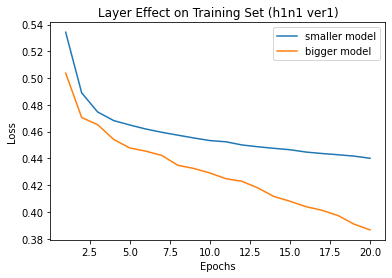

In [ ]:
# Layer effect on training loss


import matplotlib.pyplot as plt

history_dict_h1n1_ver1_s = history_h1n1_ver1_s.history
history_dict_h1n1_ver1_b = history_h1n1_ver1_b.history

loss_values_h1n1_ver1_s = history_dict_h1n1_ver1_s["loss"]
loss_values_h1n1_ver1_b = history_dict_h1n1_ver1_b["loss"]

epochs = range(1, len(loss_values_h1n1_ver1_s) + 1)


plt.plot(epochs, loss_values_h1n1_ver1_s, label="smaller model")
plt.plot(epochs, loss_values_h1n1_ver1_b, label="bigger model")


plt.title("Layer Effect on Training Set (h1n1 ver1)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
#plt.ylim([0.3,0.9])
plt.legend()
plt.show()

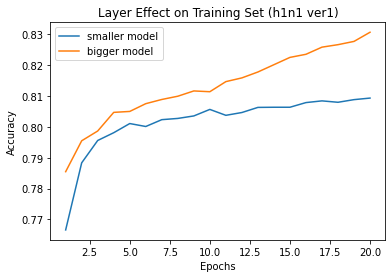

In [ ]:
# Layer effect on training accuracy


import matplotlib.pyplot as plt



acc_values_h1n1_ver1_s = history_dict_h1n1_ver1_s["accuracy"]
acc_values_h1n1_ver1_b = history_dict_h1n1_ver1_b["accuracy"]

epochs = range(1, len(acc_values_h1n1_ver1_s) + 1)


plt.plot(epochs, acc_values_h1n1_ver1_s, label="smaller model")
plt.plot(epochs, acc_values_h1n1_ver1_b, label="bigger model")


plt.title("Layer Effect on Training Set (h1n1 ver1)")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
#plt.ylim([0.3,0.9])
plt.legend()
plt.show()

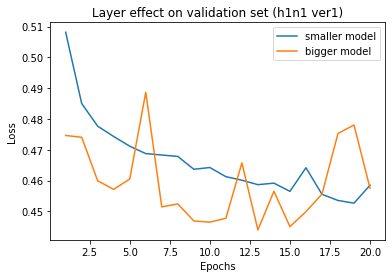

In [ ]:
# Layer effect on validation loss


import matplotlib.pyplot as plt



val_loss_values_h1n1_ver1_s = history_dict_h1n1_ver1_s["val_loss"]
val_loss_values_h1n1_ver1_b = history_dict_h1n1_ver1_b["val_loss"]

epochs = range(1, len(val_loss_values_h1n1_ver1_s) + 1)


plt.plot(epochs, val_loss_values_h1n1_ver1_s, label="smaller model")
plt.plot(epochs, val_loss_values_h1n1_ver1_b, label="bigger model")


plt.title("Layer effect on validation set (h1n1 ver1)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
#plt.ylim([0.3,0.9])
plt.legend()
plt.show()

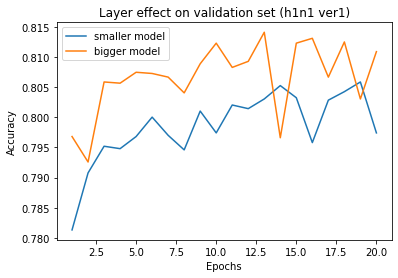

In [ ]:
# Layer effect on validation accuracy


import matplotlib.pyplot as plt



val_acc_values_h1n1_ver1_s = history_dict_h1n1_ver1_s["val_accuracy"]
val_acc_values_h1n1_ver1_b = history_dict_h1n1_ver1_b["val_accuracy"]

epochs = range(1, len(val_acc_values_h1n1_ver1_s) + 1)


plt.plot(epochs, val_acc_values_h1n1_ver1_s, label="smaller model")
plt.plot(epochs, val_acc_values_h1n1_ver1_b, label="bigger model")


plt.title("Layer effect on validation set (h1n1 ver1)")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
#plt.ylim([0.3,0.9])
plt.legend()
plt.show()

## **L1, L2 regularization effect**

**layer 8개 + L1 regularization 1개**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_h1n1_ver1_L1_1 = keras.Sequential([
                                         layers.Dense(256, activation = "relu"),
                                         layers.Dense(256, activation = "relu"),
                                         layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l1(0.001)),
                                         layers.Dense(64, activation = "relu"),
                                         layers.Dense(64, activation = "relu"),
                                         layers.Dense(16, activation = "relu"),
                                         layers.Dense(16, activation = "relu"),
                                         layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_h1n1_ver1_L1_1.compile(optimizer = "rmsprop",
                             loss = "binary_crossentropy",
                             metrics = ["accuracy"])



# fitting model

history_h1n1_ver1_L1_1 = model_h1n1_ver1_L1_1.fit(x_train_h1n1_ver1,
                                                  y_train_h1n1_ver1,
                                                  epochs = 20,
                                                  batch_size = 512,
                                                  validation_data = (x_valid_h1n1_ver1, y_valid_h1n1_ver1))


Epoch 1/20
39/39 [==============================] - 1s 11ms/step - loss: 1.8776 - accuracy: 0.7859 - val_loss: 1.4096 - val_accuracy: 0.7859
Epoch 2/20
39/39 [==============================] - 0s 5ms/step - loss: 1.0619 - accuracy: 0.7927 - val_loss: 0.7900 - val_accuracy: 0.8010
Epoch 3/20
39/39 [==============================] - 0s 5ms/step - loss: 0.6436 - accuracy: 0.7998 - val_loss: 0.5567 - val_accuracy: 0.8063
Epoch 4/20
39/39 [==============================] - 0s 5ms/step - loss: 0.5224 - accuracy: 0.8010 - val_loss: 0.5182 - val_accuracy: 0.8037
Epoch 5/20
39/39 [==============================] - 0s 6ms/step - loss: 0.4960 - accuracy: 0.8062 - val_loss: 0.4951 - val_accuracy: 0.8079
Epoch 6/20
39/39 [==============================] - 0s 6ms/step - loss: 0.4829 - accuracy: 0.8079 - val_loss: 0.4949 - val_accuracy: 0.8095
Epoch 7/20
39/39 [==============================] - 0s 5ms/step - loss: 0.4731 - accuracy: 0.8103 - val_loss: 0.4789 - val_accuracy: 0.8069
Epoch 8/20
39/39 [=

**layer 8개 + L1 regularization 2개**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_h1n1_ver1_L1_2 = keras.Sequential([
                                         layers.Dense(256, activation = "relu"),
                                         layers.Dense(256, activation = "relu"),
                                         layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l1(0.001)),
                                         layers.Dense(64, activation = "relu"),
                                         layers.Dense(64, activation = "relu"),
                                         layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l1(0.001)),
                                         layers.Dense(16, activation = "relu"),
                                         layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_h1n1_ver1_L1_2.compile(optimizer = "rmsprop",
                             loss = "binary_crossentropy",
                             metrics = ["accuracy"])



# fitting model

history_h1n1_ver1_L1_2 = model_h1n1_ver1_L1_2.fit(x_train_h1n1_ver1,
                                                  y_train_h1n1_ver1,
                                                  epochs = 20,
                                                  batch_size = 512,
                                                  validation_data = (x_valid_h1n1_ver1, y_valid_h1n1_ver1))


Epoch 1/20
39/39 [==============================] - 1s 11ms/step - loss: 2.0135 - accuracy: 0.7836 - val_loss: 1.4870 - val_accuracy: 0.7872
Epoch 2/20
39/39 [==============================] - 0s 5ms/step - loss: 1.1587 - accuracy: 0.7952 - val_loss: 0.8703 - val_accuracy: 0.7984
Epoch 3/20
39/39 [==============================] - 0s 6ms/step - loss: 0.7119 - accuracy: 0.7978 - val_loss: 0.6130 - val_accuracy: 0.8025
Epoch 4/20
39/39 [==============================] - 0s 7ms/step - loss: 0.5729 - accuracy: 0.8017 - val_loss: 0.5525 - val_accuracy: 0.8041
Epoch 5/20
39/39 [==============================] - 0s 6ms/step - loss: 0.5309 - accuracy: 0.8022 - val_loss: 0.5239 - val_accuracy: 0.8083
Epoch 6/20
39/39 [==============================] - 0s 5ms/step - loss: 0.5090 - accuracy: 0.8039 - val_loss: 0.5081 - val_accuracy: 0.8027
Epoch 7/20
39/39 [==============================] - 0s 5ms/step - loss: 0.4954 - accuracy: 0.8056 - val_loss: 0.5083 - val_accuracy: 0.7958
Epoch 8/20
39/39 [=

**layer 8개 + L2 regularization 1개**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_h1n1_ver1_L2_1 = keras.Sequential([
                                         layers.Dense(256, activation = "relu"),
                                         layers.Dense(256, activation = "relu"),
                                         layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l2(0.001)),
                                         layers.Dense(64, activation = "relu"),
                                         layers.Dense(64, activation = "relu"),
                                         layers.Dense(16, activation = "relu"),
                                         layers.Dense(16, activation = "relu"),
                                         layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_h1n1_ver1_L2_1.compile(optimizer = "rmsprop",
                             loss = "binary_crossentropy",
                             metrics = ["accuracy"])



# fitting model

history_h1n1_ver1_L2_1 = model_h1n1_ver1_L2_1.fit(x_train_h1n1_ver1,
                                                  y_train_h1n1_ver1,
                                                  epochs = 20,
                                                  batch_size = 512,
                                                  validation_data = (x_valid_h1n1_ver1, y_valid_h1n1_ver1))


Epoch 1/20
39/39 [==============================] - 1s 11ms/step - loss: 0.6153 - accuracy: 0.7859 - val_loss: 0.5892 - val_accuracy: 0.7859
Epoch 2/20
39/39 [==============================] - 0s 6ms/step - loss: 0.5271 - accuracy: 0.7880 - val_loss: 0.5539 - val_accuracy: 0.7775
Epoch 3/20
39/39 [==============================] - 0s 5ms/step - loss: 0.4929 - accuracy: 0.8015 - val_loss: 0.4930 - val_accuracy: 0.8103
Epoch 4/20
39/39 [==============================] - 0s 5ms/step - loss: 0.4752 - accuracy: 0.8038 - val_loss: 0.4782 - val_accuracy: 0.8075
Epoch 5/20
39/39 [==============================] - 0s 5ms/step - loss: 0.4653 - accuracy: 0.8047 - val_loss: 0.4694 - val_accuracy: 0.8039
Epoch 6/20
39/39 [==============================] - 0s 6ms/step - loss: 0.4575 - accuracy: 0.8079 - val_loss: 0.4688 - val_accuracy: 0.8099
Epoch 7/20
39/39 [==============================] - 0s 7ms/step - loss: 0.4497 - accuracy: 0.8072 - val_loss: 0.4585 - val_accuracy: 0.8085
Epoch 8/20
39/39 [=

**layer 8개 + L2 regularization 2개**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_h1n1_ver1_L2_2 = keras.Sequential([
                                         layers.Dense(256, activation = "relu"),
                                         layers.Dense(256, activation = "relu"),
                                         layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l2(0.001)),
                                         layers.Dense(64, activation = "relu"),
                                         layers.Dense(64, activation = "relu"),
                                         layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.001)),
                                         layers.Dense(16, activation = "relu"),
                                         layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_h1n1_ver1_L2_2.compile(optimizer = "rmsprop",
                             loss = "binary_crossentropy",
                             metrics = ["accuracy"])



# fitting model

history_h1n1_ver1_L2_2 = model_h1n1_ver1_L2_2.fit(x_train_h1n1_ver1,
                                                  y_train_h1n1_ver1,
                                                  epochs = 20,
                                                  batch_size = 512,
                                                  validation_data = (x_valid_h1n1_ver1, y_valid_h1n1_ver1))


Epoch 1/20
39/39 [==============================] - 1s 11ms/step - loss: 0.6507 - accuracy: 0.7726 - val_loss: 0.5962 - val_accuracy: 0.8006
Epoch 2/20
39/39 [==============================] - 0s 6ms/step - loss: 0.5473 - accuracy: 0.7957 - val_loss: 0.5208 - val_accuracy: 0.8041
Epoch 3/20
39/39 [==============================] - 0s 7ms/step - loss: 0.5120 - accuracy: 0.7961 - val_loss: 0.5108 - val_accuracy: 0.7978
Epoch 4/20
39/39 [==============================] - 0s 5ms/step - loss: 0.4867 - accuracy: 0.8030 - val_loss: 0.4845 - val_accuracy: 0.8027
Epoch 5/20
39/39 [==============================] - 0s 5ms/step - loss: 0.4771 - accuracy: 0.8012 - val_loss: 0.4773 - val_accuracy: 0.8027
Epoch 6/20
39/39 [==============================] - 0s 5ms/step - loss: 0.4664 - accuracy: 0.8055 - val_loss: 0.4704 - val_accuracy: 0.8059
Epoch 7/20
39/39 [==============================] - 0s 6ms/step - loss: 0.4606 - accuracy: 0.8074 - val_loss: 0.4698 - val_accuracy: 0.8039
Epoch 8/20
39/39 [=

**layer 8개 + L1&L2 regularization 1개**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_h1n1_ver1_L12 = keras.Sequential([
                                        layers.Dense(256, activation = "relu"),
                                        layers.Dense(256, activation = "relu"),
                                        layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l1_l2(l1 = 0.001, l2 = 0.001)),
                                        layers.Dense(64, activation = "relu"),
                                        layers.Dense(64, activation = "relu"),
                                        layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l1_l2(l1 = 0.001, l2 = 0.001)),
                                        layers.Dense(16, activation = "relu"),
                                        layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_h1n1_ver1_L12.compile(optimizer = "rmsprop",
                            loss = "binary_crossentropy",
                            metrics = ["accuracy"])



# fitting model

history_h1n1_ver1_L12 = model_h1n1_ver1_L12.fit(x_train_h1n1_ver1,
                                                y_train_h1n1_ver1,
                                                epochs = 20,
                                                batch_size = 512,
                                                validation_data = (x_valid_h1n1_ver1, y_valid_h1n1_ver1))


Epoch 1/20
39/39 [==============================] - 1s 11ms/step - loss: 2.1540 - accuracy: 0.7705 - val_loss: 1.5767 - val_accuracy: 0.7859
Epoch 2/20
39/39 [==============================] - 0s 5ms/step - loss: 1.2274 - accuracy: 0.7898 - val_loss: 0.9178 - val_accuracy: 0.7964
Epoch 3/20
39/39 [==============================] - 0s 6ms/step - loss: 0.7455 - accuracy: 0.7973 - val_loss: 0.6249 - val_accuracy: 0.8039
Epoch 4/20
39/39 [==============================] - 0s 5ms/step - loss: 0.5832 - accuracy: 0.8008 - val_loss: 0.5572 - val_accuracy: 0.8029
Epoch 5/20
39/39 [==============================] - 0s 6ms/step - loss: 0.5362 - accuracy: 0.8031 - val_loss: 0.5256 - val_accuracy: 0.8069
Epoch 6/20
39/39 [==============================] - 0s 6ms/step - loss: 0.5100 - accuracy: 0.8049 - val_loss: 0.5058 - val_accuracy: 0.8077
Epoch 7/20
39/39 [==============================] - 0s 7ms/step - loss: 0.4932 - accuracy: 0.8078 - val_loss: 0.4974 - val_accuracy: 0.8073
Epoch 8/20
39/39 [=

### visualize

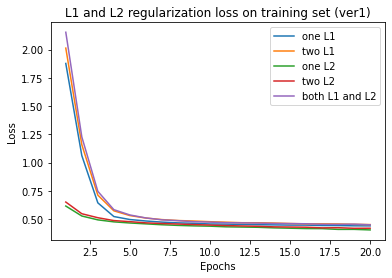

In [ ]:
# L1, L2 regularization effect on training loss


import matplotlib.pyplot as plt

history_dict_h1n1_ver1_L1_1 = history_h1n1_ver1_L1_1.history
history_dict_h1n1_ver1_L1_2 = history_h1n1_ver1_L1_2.history
history_dict_h1n1_ver1_L2_1 = history_h1n1_ver1_L2_1.history
history_dict_h1n1_ver1_L2_2 = history_h1n1_ver1_L2_2.history
history_dict_h1n1_ver1_L12 = history_h1n1_ver1_L12.history

loss_values_h1n1_ver1_L1_1 = history_dict_h1n1_ver1_L1_1["loss"]
loss_values_h1n1_ver1_L1_2 = history_dict_h1n1_ver1_L1_2["loss"]
loss_values_h1n1_ver1_L2_1 = history_dict_h1n1_ver1_L2_1["loss"]
loss_values_h1n1_ver1_L2_2 = history_dict_h1n1_ver1_L2_2["loss"]
loss_values_h1n1_ver1_L12 = history_dict_h1n1_ver1_L12["loss"]


epochs = range(1, len(loss_values_h1n1_ver1_L1_1) + 1)


plt.plot(epochs, loss_values_h1n1_ver1_L1_1, label="one L1")
plt.plot(epochs, loss_values_h1n1_ver1_L1_2, label="two L1")
plt.plot(epochs, loss_values_h1n1_ver1_L2_1, label="one L2")
plt.plot(epochs, loss_values_h1n1_ver1_L2_2, label="two L2")
plt.plot(epochs, loss_values_h1n1_ver1_L12, label="both L1 and L2")


plt.title("L1 and L2 regularization loss on training set (h1n1 ver1)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
#plt.ylim([0.3,0.9])
plt.legend()
plt.show()

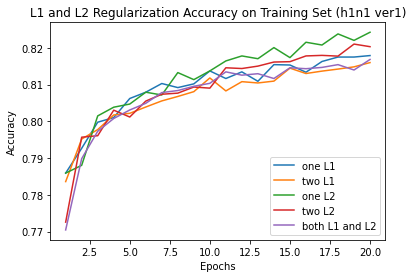

In [ ]:
# L1, L2 regularization effect on training accuracy


import matplotlib.pyplot as plt


acc_values_h1n1_ver1_L1_1 = history_dict_h1n1_ver1_L1_1["accuracy"]
acc_values_h1n1_ver1_L1_2 = history_dict_h1n1_ver1_L1_2["accuracy"]
acc_values_h1n1_ver1_L2_1 = history_dict_h1n1_ver1_L2_1["accuracy"]
acc_values_h1n1_ver1_L2_2 = history_dict_h1n1_ver1_L2_2["accuracy"]
acc_values_h1n1_ver1_L12 = history_dict_h1n1_ver1_L12["accuracy"]

epochs = range(1, len(acc_values_h1n1_ver1_L1_1) + 1)


plt.plot(epochs, acc_values_h1n1_ver1_L1_1, label="one L1")
plt.plot(epochs, acc_values_h1n1_ver1_L1_2, label="two L1")
plt.plot(epochs, acc_values_h1n1_ver1_L2_1, label="one L2")
plt.plot(epochs, acc_values_h1n1_ver1_L2_2, label="two L2")
plt.plot(epochs, acc_values_h1n1_ver1_L12, label="both L1 and L2")

plt.title("L1 and L2 Regularization Accuracy on Training Set (h1n1 ver1)")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
#plt.ylim([0.78, 0.85])
plt.legend()
plt.show()

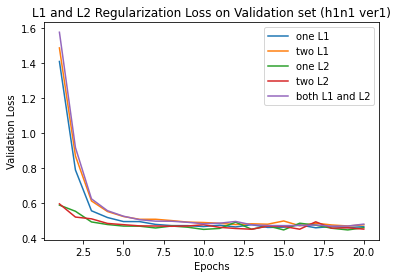

In [ ]:
# L1, L2 regularization effect on validation loss


import matplotlib.pyplot as plt


val_loss_values_h1n1_ver1_L1_1 = history_dict_h1n1_ver1_L1_1["val_loss"]
val_loss_values_h1n1_ver1_L1_2 = history_dict_h1n1_ver1_L1_2["val_loss"]
val_loss_values_h1n1_ver1_L2_1 = history_dict_h1n1_ver1_L2_1["val_loss"]
val_loss_values_h1n1_ver1_L2_2 = history_dict_h1n1_ver1_L2_2["val_loss"]
val_loss_values_h1n1_ver1_L12 = history_dict_h1n1_ver1_L12["val_loss"]


epochs = range(1, len(val_loss_values_h1n1_ver1_L1_1) + 1)


plt.plot(epochs, val_loss_values_h1n1_ver1_L1_1, label="one L1")
plt.plot(epochs, val_loss_values_h1n1_ver1_L1_2, label="two L1")
plt.plot(epochs, val_loss_values_h1n1_ver1_L2_1, label="one L2")
plt.plot(epochs, val_loss_values_h1n1_ver1_L2_2, label="two L2")
plt.plot(epochs, val_loss_values_h1n1_ver1_L12, label="both L1 and L2")


plt.title("L1 and L2 Regularization Loss on Validation set (h1n1 ver1)")
plt.xlabel("Epochs")
plt.ylabel("Validation Loss")
#plt.ylim([0.3,0.9])
plt.legend()
plt.show()

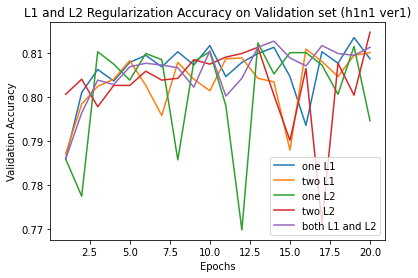

In [ ]:
# L1, L2 regularization effect on validation accuracy


import matplotlib.pyplot as plt

val_acc_values_h1n1_ver1_L1_1 = history_dict_h1n1_ver1_L1_1["val_accuracy"]
val_acc_values_h1n1_ver1_L1_2 = history_dict_h1n1_ver1_L1_2["val_accuracy"]
val_acc_values_h1n1_ver1_L2_1 = history_dict_h1n1_ver1_L2_1["val_accuracy"]
val_acc_values_h1n1_ver1_L2_2 = history_dict_h1n1_ver1_L2_2["val_accuracy"]
val_acc_values_h1n1_ver1_L12 = history_dict_h1n1_ver1_L12["val_accuracy"]



epochs = range(1, len(val_acc_values_h1n1_ver1_L1_1) + 1)


plt.plot(epochs, val_acc_values_h1n1_ver1_L1_1, label="one L1")
plt.plot(epochs, val_acc_values_h1n1_ver1_L1_2, label="two L1")
plt.plot(epochs, val_acc_values_h1n1_ver1_L2_1, label="one L2")
plt.plot(epochs, val_acc_values_h1n1_ver1_L2_2, label="two L2")
plt.plot(epochs, val_acc_values_h1n1_ver1_L12, label="both L1 and L2")


plt.title("L1 and L2 Regularization Accuracy on Validation set (h1n1 ver1)")
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
plt.legend()
plt.show()

## **Hyperparameter effect**

**0.005**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_h1n1_ver1_one = keras.Sequential([
                                        layers.Dense(256, activation = "relu"),
                                        layers.Dense(256, activation = "relu"),
                                        layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l2(0.005)),
                                        layers.Dense(64, activation = "relu"),
                                        layers.Dense(64, activation = "relu"),
                                        layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.005)),
                                        layers.Dense(16, activation = "relu"),
                                        layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_h1n1_ver1_one.compile(optimizer = "rmsprop",
                            loss = "binary_crossentropy",
                            metrics = ["accuracy"])



# fitting model

history_h1n1_ver1_one = model_h1n1_ver1_one.fit(x_train_h1n1_ver1,
                                                y_train_h1n1_ver1,
                                                epochs = 20,
                                                batch_size = 512,
                                                validation_data = (x_valid_h1n1_ver1, y_valid_h1n1_ver1))


Epoch 1/20
39/39 [==============================] - 1s 11ms/step - loss: 1.1481 - accuracy: 0.7844 - val_loss: 0.8812 - val_accuracy: 0.7859
Epoch 2/20
39/39 [==============================] - 0s 6ms/step - loss: 0.7537 - accuracy: 0.7916 - val_loss: 0.6442 - val_accuracy: 0.7956
Epoch 3/20
39/39 [==============================] - 0s 6ms/step - loss: 0.5864 - accuracy: 0.8007 - val_loss: 0.5468 - val_accuracy: 0.8049
Epoch 4/20
39/39 [==============================] - 0s 6ms/step - loss: 0.5212 - accuracy: 0.8030 - val_loss: 0.5138 - val_accuracy: 0.8061
Epoch 5/20
39/39 [==============================] - 0s 5ms/step - loss: 0.4950 - accuracy: 0.8044 - val_loss: 0.4914 - val_accuracy: 0.8043
Epoch 6/20
39/39 [==============================] - 0s 5ms/step - loss: 0.4757 - accuracy: 0.8057 - val_loss: 0.4855 - val_accuracy: 0.8059
Epoch 7/20
39/39 [==============================] - 0s 6ms/step - loss: 0.4672 - accuracy: 0.8059 - val_loss: 0.5051 - val_accuracy: 0.7958
Epoch 8/20
39/39 [=

**0.002**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_h1n1_ver1_two = keras.Sequential([
                                        layers.Dense(256, activation = "relu"),
                                        layers.Dense(256, activation = "relu"),
                                        layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l2(0.002)),
                                        layers.Dense(64, activation = "relu"),
                                        layers.Dense(64, activation = "relu"),
                                        layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.002)),
                                        layers.Dense(16, activation = "relu"),
                                        layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_h1n1_ver1_two.compile(optimizer = "rmsprop",
                            loss = "binary_crossentropy",
                            metrics = ["accuracy"])



# fitting model

history_h1n1_ver1_two = model_h1n1_ver1_two.fit(x_train_h1n1_ver1,
                                                y_train_h1n1_ver1,
                                                epochs = 20,
                                                batch_size = 512,
                                                validation_data = (x_valid_h1n1_ver1, y_valid_h1n1_ver1))


Epoch 1/20
39/39 [==============================] - 1s 11ms/step - loss: 0.7739 - accuracy: 0.7701 - val_loss: 0.6581 - val_accuracy: 0.7859
Epoch 2/20
39/39 [==============================] - 0s 6ms/step - loss: 0.5934 - accuracy: 0.7948 - val_loss: 0.5547 - val_accuracy: 0.7922
Epoch 3/20
39/39 [==============================] - 0s 5ms/step - loss: 0.5258 - accuracy: 0.7997 - val_loss: 0.5287 - val_accuracy: 0.7898
Epoch 4/20
39/39 [==============================] - 0s 5ms/step - loss: 0.4931 - accuracy: 0.8045 - val_loss: 0.4904 - val_accuracy: 0.8045
Epoch 5/20
39/39 [==============================] - 0s 6ms/step - loss: 0.4778 - accuracy: 0.8038 - val_loss: 0.4786 - val_accuracy: 0.8033
Epoch 6/20
39/39 [==============================] - 0s 6ms/step - loss: 0.4680 - accuracy: 0.8075 - val_loss: 0.4757 - val_accuracy: 0.8057
Epoch 7/20
39/39 [==============================] - 0s 6ms/step - loss: 0.4610 - accuracy: 0.8079 - val_loss: 0.4686 - val_accuracy: 0.8051
Epoch 8/20
39/39 [=

**0.001(original)**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_h1n1_ver1_three = keras.Sequential([
                                          layers.Dense(256, activation = "relu"),
                                          layers.Dense(256, activation = "relu"),
                                          layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l2(0.001)),
                                          layers.Dense(64, activation = "relu"),
                                          layers.Dense(64, activation = "relu"),
                                          layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.001)),
                                          layers.Dense(16, activation = "relu"),
                                          layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_h1n1_ver1_three.compile(optimizer = "rmsprop",
                               loss = "binary_crossentropy",
                               metrics = ["accuracy"])



# fitting model

history_h1n1_ver1_three = model_h1n1_ver1_three.fit(x_train_h1n1_ver1,
                                                     y_train_h1n1_ver1,
                                                     epochs = 20,
                                                     batch_size = 512,
                                                     validation_data = (x_valid_h1n1_ver1, y_valid_h1n1_ver1))


Epoch 1/20
39/39 [==============================] - 1s 10ms/step - loss: 0.6492 - accuracy: 0.7744 - val_loss: 0.5891 - val_accuracy: 0.7892
Epoch 2/20
39/39 [==============================] - 0s 6ms/step - loss: 0.5424 - accuracy: 0.7937 - val_loss: 0.5210 - val_accuracy: 0.8012
Epoch 3/20
39/39 [==============================] - 0s 7ms/step - loss: 0.5048 - accuracy: 0.7989 - val_loss: 0.5251 - val_accuracy: 0.7815
Epoch 4/20
39/39 [==============================] - 0s 6ms/step - loss: 0.4864 - accuracy: 0.8014 - val_loss: 0.4949 - val_accuracy: 0.8043
Epoch 5/20
39/39 [==============================] - 0s 6ms/step - loss: 0.4736 - accuracy: 0.8058 - val_loss: 0.4912 - val_accuracy: 0.8061
Epoch 6/20
39/39 [==============================] - 0s 6ms/step - loss: 0.4664 - accuracy: 0.8072 - val_loss: 0.4857 - val_accuracy: 0.8043
Epoch 7/20
39/39 [==============================] - 0s 6ms/step - loss: 0.4619 - accuracy: 0.8073 - val_loss: 0.4700 - val_accuracy: 0.8077
Epoch 8/20
39/39 [=

**0.0005**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_h1n1_ver1_four = keras.Sequential([
                                         layers.Dense(256, activation = "relu"),
                                         layers.Dense(256, activation = "relu"),
                                         layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l2(0.0005)),
                                         layers.Dense(64, activation = "relu"),
                                         layers.Dense(64, activation = "relu"),
                                         layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.0005)),
                                         layers.Dense(16, activation = "relu"),
                                         layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_h1n1_ver1_four.compile(optimizer = "rmsprop",
                             loss = "binary_crossentropy",
                             metrics = ["accuracy"])



# fitting model

history_h1n1_ver1_four = model_h1n1_ver1_four.fit(x_train_h1n1_ver1,
                                                  y_train_h1n1_ver1,
                                                  epochs = 20,
                                                  batch_size = 512,
                                                  validation_data = (x_valid_h1n1_ver1, y_valid_h1n1_ver1))


Epoch 1/20
39/39 [==============================] - 3s 17ms/step - loss: 0.5825 - accuracy: 0.7725 - val_loss: 0.5868 - val_accuracy: 0.7867
Epoch 2/20
39/39 [==============================] - 0s 9ms/step - loss: 0.5171 - accuracy: 0.7952 - val_loss: 0.5153 - val_accuracy: 0.7928
Epoch 3/20
39/39 [==============================] - 0s 8ms/step - loss: 0.4923 - accuracy: 0.8015 - val_loss: 0.4948 - val_accuracy: 0.7912
Epoch 4/20
39/39 [==============================] - 0s 10ms/step - loss: 0.4789 - accuracy: 0.8031 - val_loss: 0.4793 - val_accuracy: 0.8043
Epoch 5/20
39/39 [==============================] - 0s 9ms/step - loss: 0.4693 - accuracy: 0.8062 - val_loss: 0.4780 - val_accuracy: 0.8014
Epoch 6/20
39/39 [==============================] - 0s 9ms/step - loss: 0.4623 - accuracy: 0.8074 - val_loss: 0.4741 - val_accuracy: 0.8045
Epoch 7/20
39/39 [==============================] - 0s 9ms/step - loss: 0.4578 - accuracy: 0.8075 - val_loss: 0.4750 - val_accuracy: 0.8061
Epoch 8/20
39/39 [

**0.0001**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_h1n1_ver1_five = keras.Sequential([
                                         layers.Dense(256, activation = "relu"),
                                         layers.Dense(256, activation = "relu"),
                                         layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l2(0.0001)),
                                         layers.Dense(64, activation = "relu"),
                                         layers.Dense(64, activation = "relu"),
                                         layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.0001)),
                                         layers.Dense(16, activation = "relu"),
                                         layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_h1n1_ver1_five.compile(optimizer = "rmsprop",
                             loss = "binary_crossentropy",
                             metrics = ["accuracy"])



# fitting model

history_h1n1_ver1_five = model_h1n1_ver1_five.fit(x_train_h1n1_ver1,
                                                  y_train_h1n1_ver1,
                                                  epochs = 20,
                                                  batch_size = 512,
                                                  validation_data = (x_valid_h1n1_ver1, y_valid_h1n1_ver1))


Epoch 1/20
39/39 [==============================] - 2s 17ms/step - loss: 0.5229 - accuracy: 0.7879 - val_loss: 0.4858 - val_accuracy: 0.7876
Epoch 2/20
39/39 [==============================] - 0s 8ms/step - loss: 0.4793 - accuracy: 0.7968 - val_loss: 0.4796 - val_accuracy: 0.8008
Epoch 3/20
39/39 [==============================] - 0s 8ms/step - loss: 0.4697 - accuracy: 0.8031 - val_loss: 0.4711 - val_accuracy: 0.8006
Epoch 4/20
39/39 [==============================] - 0s 9ms/step - loss: 0.4622 - accuracy: 0.8036 - val_loss: 0.4735 - val_accuracy: 0.8004
Epoch 5/20
39/39 [==============================] - 0s 8ms/step - loss: 0.4549 - accuracy: 0.8056 - val_loss: 0.4605 - val_accuracy: 0.8059
Epoch 6/20
39/39 [==============================] - 0s 9ms/step - loss: 0.4506 - accuracy: 0.8085 - val_loss: 0.4594 - val_accuracy: 0.8063
Epoch 7/20
39/39 [==============================] - 0s 9ms/step - loss: 0.4466 - accuracy: 0.8084 - val_loss: 0.4582 - val_accuracy: 0.8065
Epoch 8/20
39/39 [=

### visualize

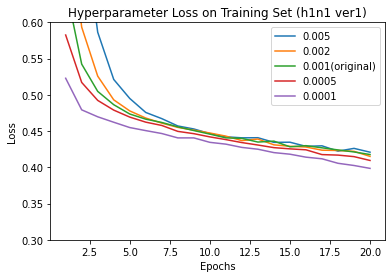

In [ ]:
# Hyperparameter effect on training loss


import matplotlib.pyplot as plt

history_dict_h1n1_ver1_one = history_h1n1_ver1_one.history
history_dict_h1n1_ver1_two = history_h1n1_ver1_two.history
history_dict_h1n1_ver1_three = history_h1n1_ver1_three.history
history_dict_h1n1_ver1_four = history_h1n1_ver1_four.history
history_dict_h1n1_ver1_five = history_h1n1_ver1_five.history

loss_values_h1n1_ver1_one = history_dict_h1n1_ver1_one["loss"]
loss_values_h1n1_ver1_two = history_dict_h1n1_ver1_two["loss"]
loss_values_h1n1_ver1_three = history_dict_h1n1_ver1_three["loss"]
loss_values_h1n1_ver1_four = history_dict_h1n1_ver1_four["loss"]
loss_values_h1n1_ver1_five = history_dict_h1n1_ver1_five["loss"]


epochs = range(1, len(loss_values_h1n1_ver1_one) + 1)


plt.plot(epochs, loss_values_h1n1_ver1_one, label="0.005")
plt.plot(epochs, loss_values_h1n1_ver1_two, label="0.002")
plt.plot(epochs, loss_values_h1n1_ver1_three, label="0.001(original)")
plt.plot(epochs, loss_values_h1n1_ver1_four, label="0.0005")
plt.plot(epochs, loss_values_h1n1_ver1_five, label="0.0001")


plt.title("Hyperparameter Loss on Training Set (h1n1 ver1)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.ylim([0.3,0.6])
plt.legend()
plt.show()

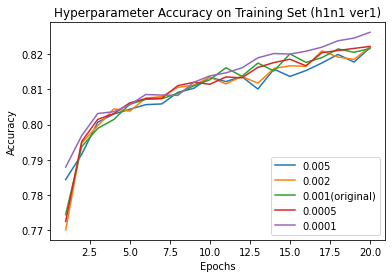

In [ ]:
# Hyperparameter effect on training accuracy


import matplotlib.pyplot as plt


acc_values_h1n1_ver1_one = history_dict_h1n1_ver1_one["accuracy"]
acc_values_h1n1_ver1_two = history_dict_h1n1_ver1_two["accuracy"]
acc_values_h1n1_ver1_three = history_dict_h1n1_ver1_three["accuracy"]
acc_values_h1n1_ver1_four = history_dict_h1n1_ver1_four["accuracy"]
acc_values_h1n1_ver1_five = history_dict_h1n1_ver1_five["accuracy"]

epochs = range(1, len(acc_values_h1n1_ver1_one) + 1)


plt.plot(epochs, acc_values_h1n1_ver1_one, label="0.005")
plt.plot(epochs, acc_values_h1n1_ver1_two, label="0.002")
plt.plot(epochs, acc_values_h1n1_ver1_three, label="0.001(original)")
plt.plot(epochs, acc_values_h1n1_ver1_four, label="0.0005")
plt.plot(epochs, acc_values_h1n1_ver1_five, label="0.0001")

plt.title("Hyperparameter Accuracy on Training Set (h1n1 ver1)")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
#plt.ylim([0.78, 0.85])
plt.legend()
plt.show()

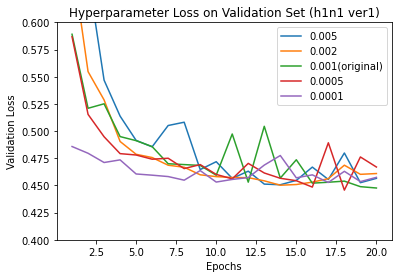

In [ ]:
# Hyperparameter effect on validation loss


import matplotlib.pyplot as plt


val_loss_values_h1n1_ver1_one = history_dict_h1n1_ver1_one["val_loss"]
val_loss_values_h1n1_ver1_two = history_dict_h1n1_ver1_two["val_loss"]
val_loss_values_h1n1_ver1_three = history_dict_h1n1_ver1_three["val_loss"]
val_loss_values_h1n1_ver1_four = history_dict_h1n1_ver1_four["val_loss"]
val_loss_values_h1n1_ver1_five = history_dict_h1n1_ver1_five["val_loss"]


epochs = range(1, len(val_loss_values_h1n1_ver1_one) + 1)


plt.plot(epochs, val_loss_values_h1n1_ver1_one, label="0.005")
plt.plot(epochs, val_loss_values_h1n1_ver1_two, label="0.002")
plt.plot(epochs, val_loss_values_h1n1_ver1_three, label="0.001(original)")
plt.plot(epochs, val_loss_values_h1n1_ver1_four, label="0.0005")
plt.plot(epochs, val_loss_values_h1n1_ver1_five, label="0.0001")


plt.title("Hyperparameter Loss on Validation Set (h1n1 ver1)")
plt.xlabel("Epochs")
plt.ylabel("Validation Loss")
plt.ylim([0.4,0.6])
plt.legend()
plt.show()

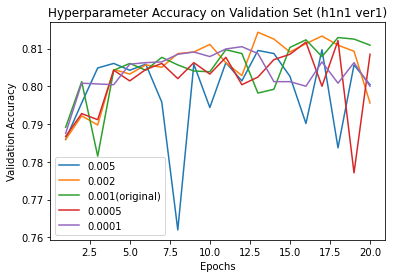

In [ ]:
# Hyperparameter effect on validation accuracy


import matplotlib.pyplot as plt



val_acc_values_h1n1_ver1_one = history_dict_h1n1_ver1_one["val_accuracy"]
val_acc_values_h1n1_ver1_two = history_dict_h1n1_ver1_two["val_accuracy"]
val_acc_values_h1n1_ver1_three = history_dict_h1n1_ver1_three["val_accuracy"]
val_acc_values_h1n1_ver1_four = history_dict_h1n1_ver1_four["val_accuracy"]
val_acc_values_h1n1_ver1_five = history_dict_h1n1_ver1_five["val_accuracy"]



epochs = range(1, len(val_acc_values_h1n1_ver1_one) + 1)


plt.plot(epochs, val_acc_values_h1n1_ver1_one, label="0.005")
plt.plot(epochs, val_acc_values_h1n1_ver1_two, label="0.002")
plt.plot(epochs, val_acc_values_h1n1_ver1_three, label="0.001(original)")
plt.plot(epochs, val_acc_values_h1n1_ver1_four, label="0.0005")
plt.plot(epochs, val_acc_values_h1n1_ver1_five, label="0.0001")


plt.title("Hyperparameter Accuracy on Validation Set (h1n1 ver1)")
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
plt.legend()
plt.show()

## **Dropout effect**

**# dropout = 1**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_h1n1_ver1_onedr = keras.Sequential([
                                          layers.Dense(256, activation = "relu"),
                                          layers.Dense(256, activation = "relu"),
                                          layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l2(0.001)),
                                          layers.Dense(64, activation = "relu"),
                                          layers.Dropout(0.5),
                                          layers.Dense(64, activation = "relu"),
                                          layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.001)),
                                          layers.Dense(16, activation = "relu"),
                                          layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_h1n1_ver1_onedr.compile(optimizer = "rmsprop",
                              loss = "binary_crossentropy",
                              metrics = ["accuracy"])



# fitting model

history_h1n1_ver1_onedr = model_h1n1_ver1_onedr.fit(x_train_h1n1_ver1,
                                                    y_train_h1n1_ver1,
                                                    epochs = 20,
                                                    batch_size = 512,
                                                    validation_data = (x_valid_h1n1_ver1, y_valid_h1n1_ver1))


Epoch 1/20
39/39 [==============================] - 1s 11ms/step - loss: 0.6646 - accuracy: 0.7688 - val_loss: 0.5786 - val_accuracy: 0.7859
Epoch 2/20
39/39 [==============================] - 0s 6ms/step - loss: 0.5529 - accuracy: 0.7882 - val_loss: 0.5239 - val_accuracy: 0.7982
Epoch 3/20
39/39 [==============================] - 0s 6ms/step - loss: 0.5137 - accuracy: 0.7974 - val_loss: 0.4999 - val_accuracy: 0.7984
Epoch 4/20
39/39 [==============================] - 0s 6ms/step - loss: 0.4904 - accuracy: 0.8001 - val_loss: 0.4855 - val_accuracy: 0.8071
Epoch 5/20
39/39 [==============================] - 0s 6ms/step - loss: 0.4760 - accuracy: 0.8038 - val_loss: 0.4859 - val_accuracy: 0.7994
Epoch 6/20
39/39 [==============================] - 0s 6ms/step - loss: 0.4689 - accuracy: 0.8044 - val_loss: 0.4808 - val_accuracy: 0.7976
Epoch 7/20
39/39 [==============================] - 0s 6ms/step - loss: 0.4618 - accuracy: 0.8063 - val_loss: 0.4704 - val_accuracy: 0.8057
Epoch 8/20
39/39 [=

**# dropout = 2**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_h1n1_ver1_twodr = keras.Sequential([
                                          layers.Dense(256, activation = "relu"),
                                          layers.Dense(256, activation = "relu"),
                                          layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l2(0.001)),
                                          layers.Dense(64, activation = "relu"),
                                          layers.Dropout(0.5),
                                          layers.Dense(64, activation = "relu"),
                                          layers.Dropout(0.5),
                                          layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.001)),
                                          layers.Dense(16, activation = "relu"),
                                          layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_h1n1_ver1_twodr.compile(optimizer = "rmsprop",
                              loss = "binary_crossentropy",
                              metrics = ["accuracy"])



# fitting model

history_h1n1_ver1_twodr = model_h1n1_ver1_twodr.fit(x_train_h1n1_ver1,
                                                    y_train_h1n1_ver1,
                                                    epochs = 20,
                                                    batch_size = 512,
                                                    validation_data = (x_valid_h1n1_ver1, y_valid_h1n1_ver1))


Epoch 1/20
39/39 [==============================] - 1s 10ms/step - loss: 0.6696 - accuracy: 0.7782 - val_loss: 0.5863 - val_accuracy: 0.7859
Epoch 2/20
39/39 [==============================] - 0s 6ms/step - loss: 0.5715 - accuracy: 0.7859 - val_loss: 0.5418 - val_accuracy: 0.7859
Epoch 3/20
39/39 [==============================] - 0s 6ms/step - loss: 0.5261 - accuracy: 0.7859 - val_loss: 0.5325 - val_accuracy: 0.7859
Epoch 4/20
39/39 [==============================] - 0s 6ms/step - loss: 0.5036 - accuracy: 0.7874 - val_loss: 0.4962 - val_accuracy: 0.8031
Epoch 5/20
39/39 [==============================] - 0s 9ms/step - loss: 0.4876 - accuracy: 0.7952 - val_loss: 0.4820 - val_accuracy: 0.8045
Epoch 6/20
39/39 [==============================] - 0s 10ms/step - loss: 0.4783 - accuracy: 0.8020 - val_loss: 0.4818 - val_accuracy: 0.7998
Epoch 7/20
39/39 [==============================] - 0s 10ms/step - loss: 0.4679 - accuracy: 0.8060 - val_loss: 0.4756 - val_accuracy: 0.8073
Epoch 8/20
39/39 

**# dropout = 3**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_h1n1_ver1_threedr = keras.Sequential([
                                            layers.Dense(256, activation = "relu"),
                                            layers.Dense(256, activation = "relu"),
                                            layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l2(0.001)),
                                            layers.Dense(64, activation = "relu"),
                                            layers.Dropout(0.5),
                                            layers.Dense(64, activation = "relu"),
                                            layers.Dropout(0.5),
                                            layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.001)),
                                            layers.Dropout(0.5),
                                            layers.Dense(16, activation = "relu"),
                                            layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_h1n1_ver1_threedr.compile(optimizer = "rmsprop",
                                loss = "binary_crossentropy",
                                metrics = ["accuracy"])



# fitting model

history_h1n1_ver1_threedr = model_h1n1_ver1_threedr.fit(x_train_h1n1_ver1,
                                                        y_train_h1n1_ver1,
                                                        epochs = 20,
                                                        batch_size = 512,
                                                        validation_data = (x_valid_h1n1_ver1, y_valid_h1n1_ver1))


Epoch 1/20
39/39 [==============================] - 2s 17ms/step - loss: 0.6990 - accuracy: 0.7624 - val_loss: 0.5834 - val_accuracy: 0.7859
Epoch 2/20
39/39 [==============================] - 0s 7ms/step - loss: 0.5908 - accuracy: 0.7856 - val_loss: 0.5335 - val_accuracy: 0.7859
Epoch 3/20
39/39 [==============================] - 0s 9ms/step - loss: 0.5424 - accuracy: 0.7859 - val_loss: 0.5234 - val_accuracy: 0.7859
Epoch 4/20
39/39 [==============================] - 0s 10ms/step - loss: 0.5160 - accuracy: 0.7859 - val_loss: 0.5116 - val_accuracy: 0.7859
Epoch 5/20
39/39 [==============================] - 0s 8ms/step - loss: 0.5016 - accuracy: 0.7860 - val_loss: 0.5371 - val_accuracy: 0.7859
Epoch 6/20
39/39 [==============================] - 0s 12ms/step - loss: 0.4924 - accuracy: 0.7888 - val_loss: 0.4918 - val_accuracy: 0.7940
Epoch 7/20
39/39 [==============================] - 1s 14ms/step - loss: 0.4801 - accuracy: 0.7933 - val_loss: 0.4826 - val_accuracy: 0.8043
Epoch 8/20
39/39

### visualize

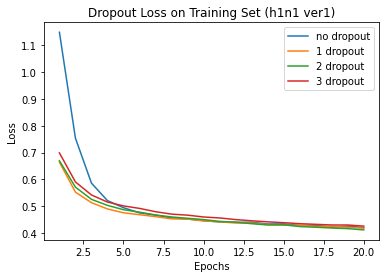

In [ ]:
# Dropout effect on training loss


import matplotlib.pyplot as plt

history_dict_h1n1_ver1_onedr = history_h1n1_ver1_onedr.history
history_dict_h1n1_ver1_twodr = history_h1n1_ver1_twodr.history
history_dict_h1n1_ver1_threedr = history_h1n1_ver1_threedr.history

loss_values_h1n1_ver1_onedr = history_dict_h1n1_ver1_onedr["loss"]
loss_values_h1n1_ver1_twodr = history_dict_h1n1_ver1_twodr["loss"]
loss_values_h1n1_ver1_threedr = history_dict_h1n1_ver1_threedr["loss"]

epochs = range(1, len(loss_values_h1n1_ver1_onedr) + 1)


plt.plot(epochs, loss_values_h1n1_ver1_one, label="no dropout")
plt.plot(epochs, loss_values_h1n1_ver1_onedr, label="1 dropout")
plt.plot(epochs, loss_values_h1n1_ver1_twodr, label="2 dropout")
plt.plot(epochs, loss_values_h1n1_ver1_threedr, label="3 dropout")

plt.title("Dropout Loss on Training Set (h1n1 ver1)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
#plt.ylim([0.4,0.6])
plt.legend()
plt.show()

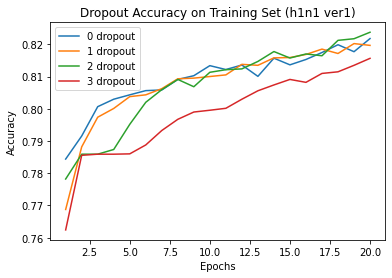

In [ ]:
# Dropout effect on training accuracy


import matplotlib.pyplot as plt


acc_values_h1n1_ver1_onedr = history_dict_h1n1_ver1_onedr["accuracy"]
acc_values_h1n1_ver1_twodr = history_dict_h1n1_ver1_twodr["accuracy"]
acc_values_h1n1_ver1_threedr = history_dict_h1n1_ver1_threedr["accuracy"]

epochs = range(1, len(acc_values_h1n1_ver1_onedr) + 1)


plt.plot(epochs, acc_values_h1n1_ver1_one, label="0 dropout")
plt.plot(epochs, acc_values_h1n1_ver1_onedr, label="1 dropout")
plt.plot(epochs, acc_values_h1n1_ver1_twodr, label="2 dropout")
plt.plot(epochs, acc_values_h1n1_ver1_threedr, label="3 dropout")

plt.title("Dropout Accuracy on Training Set (h1n1 ver1)")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
#plt.ylim([0.78, 0.85])
plt.legend()
plt.show()

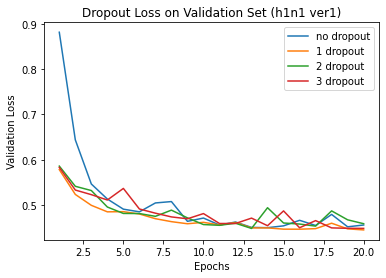

In [ ]:
# Dropout effect on validation loss


import matplotlib.pyplot as plt


val_loss_values_h1n1_ver1_onedr = history_dict_h1n1_ver1_onedr["val_loss"]
val_loss_values_h1n1_ver1_twodr = history_dict_h1n1_ver1_twodr["val_loss"]
val_loss_values_h1n1_ver1_threedr = history_dict_h1n1_ver1_threedr["val_loss"]


epochs = range(1, len(val_loss_values_h1n1_ver1_onedr) + 1)


plt.plot(epochs, val_loss_values_h1n1_ver1_one, label="no dropout")
plt.plot(epochs, val_loss_values_h1n1_ver1_onedr, label="1 dropout")
plt.plot(epochs, val_loss_values_h1n1_ver1_twodr, label="2 dropout")
plt.plot(epochs, val_loss_values_h1n1_ver1_threedr, label="3 dropout")

plt.title("Dropout Loss on Validation Set (h1n1 ver1)")
plt.xlabel("Epochs")
plt.ylabel("Validation Loss")
#plt.ylim([0.4,0.6])
plt.legend()
plt.show()

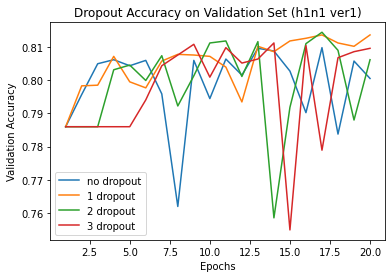

In [ ]:
# Dropout effect on validation accuracy


import matplotlib.pyplot as plt



val_acc_values_h1n1_ver1_onedr = history_dict_h1n1_ver1_onedr["val_accuracy"]
val_acc_values_h1n1_ver1_twodr = history_dict_h1n1_ver1_twodr["val_accuracy"]
val_acc_values_h1n1_ver1_threedr = history_dict_h1n1_ver1_threedr["val_accuracy"]



epochs = range(1, len(val_acc_values_h1n1_ver1_onedr) + 1)


plt.plot(epochs, val_acc_values_h1n1_ver1_one, label="no dropout")
plt.plot(epochs, val_acc_values_h1n1_ver1_onedr, label="1 dropout")
plt.plot(epochs, val_acc_values_h1n1_ver1_twodr, label="2 dropout")
plt.plot(epochs, val_acc_values_h1n1_ver1_threedr, label="3 dropout")


plt.title("Dropout Accuracy on Validation Set (h1n1 ver1)")
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
plt.legend()
plt.show()

# H1N1 Model.ver2

In [ ]:
train_h1n1_ver2 = pd.read_csv('/content/drive/MyDrive/22-1_DLAI_Team_Project/train_h1n1_ver2.csv')

In [ ]:
print(train_h1n1_ver2.shape)
train_h1n1_ver2.head()

(24828, 38)


,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,region_3,region_4,region_5,region_6,region_7,region_8,region_9,msa_1,msa_2,msa_3
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0,0,0,0,0,1,0,1,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0,0,0,0,0,0,0,0,1,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,1,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0,0,1,0,0,0,0,0,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,0,0,0,0,0,0,1,0,1,0


In [ ]:
train_h1n1_ver2.columns

Index(['respondent_id', 'h1n1_concern', 'h1n1_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'chronic_med_condition',
       'child_under_6_months', 'health_worker', 'opinion_h1n1_vacc_effective',
       'opinion_h1n1_risk', 'opinion_h1n1_sick_from_vacc', 'age_group', 'sex',
       'household_adults', 'household_children', 'h1n1_vaccine', 'race_1',
       'race_2', 'race_3', 'race_4', 'region_0', 'region_1', 'region_2',
       'region_3', 'region_4', 'region_5', 'region_6', 'region_7', 'region_8',
       'region_9', 'msa_1', 'msa_2', 'msa_3'],
      dtype='object')

In [ ]:
## split feature and target, train set and validation set

from sklearn.model_selection import train_test_split

feature = train_h1n1_ver2.iloc[:,1:-1]
target = train_h1n1_ver2['h1n1_vaccine']

x_train_h1n1_ver2, x_valid_h1n1_ver2, y_train_h1n1_ver2, y_valid_h1n1_ver2 = train_test_split(feature, target, test_size=0.2,shuffle=True,
                                                                                              stratify=target,  random_state=1234) 

### Layer effect

**layer 3개**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_h1n1_ver2_s = keras.Sequential([
                                      layers.Dense(16, activation = "relu"),
                                      layers.Dense(16, activation = "relu"),
                                      layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_h1n1_ver2_s.compile(optimizer = "rmsprop",
                          loss = "binary_crossentropy",
                          metrics = ["accuracy"])



# fitting model

history_h1n1_ver2_s = model_h1n1_ver2_s.fit(x_train_h1n1_ver2,
                                            y_train_h1n1_ver2,
                                            epochs = 20,
                                            batch_size = 512,
                                            validation_data = (x_valid_h1n1_ver2, y_valid_h1n1_ver2))


Epoch 1/20
39/39 [==============================] - 1s 7ms/step - loss: 0.5091 - accuracy: 0.7818 - val_loss: 0.4295 - val_accuracy: 0.8166
Epoch 2/20
39/39 [==============================] - 0s 4ms/step - loss: 0.3765 - accuracy: 0.8449 - val_loss: 0.3238 - val_accuracy: 0.8731
Epoch 3/20
39/39 [==============================] - 0s 4ms/step - loss: 0.2822 - accuracy: 0.8967 - val_loss: 0.2430 - val_accuracy: 0.9132
Epoch 4/20
39/39 [==============================] - 0s 4ms/step - loss: 0.2046 - accuracy: 0.9388 - val_loss: 0.1741 - val_accuracy: 0.9372
Epoch 5/20
39/39 [==============================] - 0s 4ms/step - loss: 0.1349 - accuracy: 0.9757 - val_loss: 0.1040 - val_accuracy: 0.9883
Epoch 6/20
39/39 [==============================] - 0s 4ms/step - loss: 0.0781 - accuracy: 0.9954 - val_loss: 0.0571 - val_accuracy: 0.9990
Epoch 7/20
39/39 [==============================] - 0s 4ms/step - loss: 0.0416 - accuracy: 0.9995 - val_loss: 0.0295 - val_accuracy: 1.0000
Epoch 8/20
39/39 [==

**layer 8개**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_h1n1_ver2_b = keras.Sequential([
                                      layers.Dense(256, activation = "relu"),
                                      layers.Dense(256, activation = "relu"),
                                      layers.Dense(128, activation = "relu"),
                                      layers.Dense(64, activation = "relu"),
                                      layers.Dense(64, activation = "relu"),
                                      layers.Dense(16, activation = "relu"),
                                      layers.Dense(16, activation = "relu"),
                                      layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_h1n1_ver2_b.compile(optimizer = "rmsprop",
                          loss = "binary_crossentropy",
                          metrics = ["accuracy"])



# fitting model

history_h1n1_ver2_b = model_h1n1_ver2_b.fit(x_train_h1n1_ver2,
                                            y_train_h1n1_ver2,
                                            epochs = 20,
                                            batch_size = 512,
                                            validation_data = (x_valid_h1n1_ver2, y_valid_h1n1_ver2))


Epoch 1/20
39/39 [==============================] - 1s 10ms/step - loss: 0.4283 - accuracy: 0.8182 - val_loss: 0.2330 - val_accuracy: 0.8840
Epoch 2/20
39/39 [==============================] - 0s 5ms/step - loss: 0.1447 - accuracy: 0.9728 - val_loss: 0.0046 - val_accuracy: 1.0000
Epoch 3/20
39/39 [==============================] - 0s 5ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 1.6694e-04 - val_accuracy: 1.0000
Epoch 4/20
39/39 [==============================] - 0s 5ms/step - loss: 5.3567e-05 - accuracy: 1.0000 - val_loss: 1.2671e-05 - val_accuracy: 1.0000
Epoch 5/20
39/39 [==============================] - 0s 5ms/step - loss: 3.4930e-06 - accuracy: 1.0000 - val_loss: 1.2375e-06 - val_accuracy: 1.0000
Epoch 6/20
39/39 [==============================] - 0s 6ms/step - loss: 3.3451e-07 - accuracy: 1.0000 - val_loss: 2.1314e-07 - val_accuracy: 1.0000
Epoch 7/20
39/39 [==============================] - 0s 6ms/step - loss: 5.2084e-08 - accuracy: 1.0000 - val_loss: 3.7484e-08 - val_

### visualize

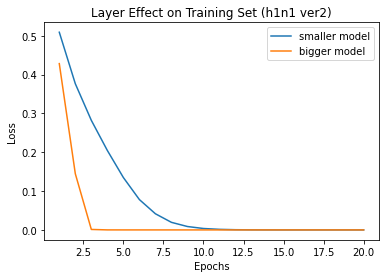

In [ ]:
# Layer effect on training loss


import matplotlib.pyplot as plt

history_dict_h1n1_ver2_s = history_h1n1_ver2_s.history
history_dict_h1n1_ver2_b = history_h1n1_ver2_b.history

loss_values_h1n1_ver2_s = history_dict_h1n1_ver2_s["loss"]
loss_values_h1n1_ver2_b = history_dict_h1n1_ver2_b["loss"]

epochs = range(1, len(loss_values_h1n1_ver2_s) + 1)


plt.plot(epochs, loss_values_h1n1_ver2_s, label="smaller model")
plt.plot(epochs, loss_values_h1n1_ver2_b, label="bigger model")


plt.title("Layer Effect on Training Set (h1n1 ver2)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
#plt.ylim([0.3,0.9])
plt.legend()
plt.show()

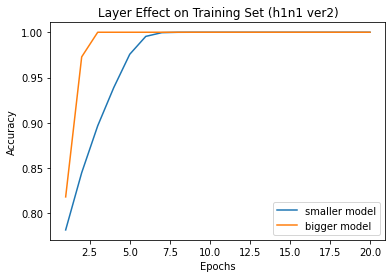

In [ ]:
# Layer effect on training accuracy


import matplotlib.pyplot as plt



acc_values_h1n1_ver2_s = history_dict_h1n1_ver2_s["accuracy"]
acc_values_h1n1_ver2_b = history_dict_h1n1_ver2_b["accuracy"]

epochs = range(1, len(acc_values_h1n1_ver2_s) + 1)


plt.plot(epochs, acc_values_h1n1_ver2_s, label="smaller model")
plt.plot(epochs, acc_values_h1n1_ver2_b, label="bigger model")


plt.title("Layer Effect on Training Set (h1n1 ver2)")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
#plt.ylim([0.3,0.9])
plt.legend()
plt.show()

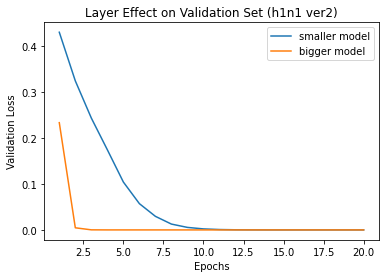

In [ ]:
# Layer effect on validation loss


import matplotlib.pyplot as plt



val_loss_values_h1n1_ver2_s = history_dict_h1n1_ver2_s["val_loss"]
val_loss_values_h1n1_ver2_b = history_dict_h1n1_ver2_b["val_loss"]

epochs = range(1, len(val_loss_values_h1n1_ver2_s) + 1)


plt.plot(epochs, val_loss_values_h1n1_ver2_s, label="smaller model")
plt.plot(epochs, val_loss_values_h1n1_ver2_b, label="bigger model")


plt.title("Layer Effect on Validation Set (h1n1 ver2)")
plt.xlabel("Epochs")
plt.ylabel("Validation Loss")
#plt.ylim([0.3,0.9])
plt.legend()
plt.show()

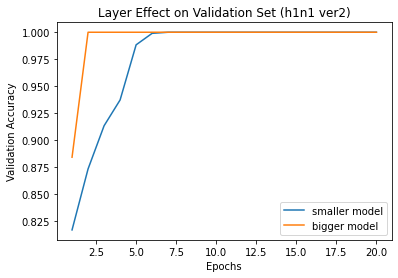

In [ ]:
# Layer effect on validation accuracy


import matplotlib.pyplot as plt



val_acc_values_h1n1_ver2_s = history_dict_h1n1_ver2_s["val_accuracy"]
val_acc_values_h1n1_ver2_b = history_dict_h1n1_ver2_b["val_accuracy"]

epochs = range(1, len(val_acc_values_h1n1_ver2_s) + 1)


plt.plot(epochs, val_acc_values_h1n1_ver2_s, label="smaller model")
plt.plot(epochs, val_acc_values_h1n1_ver2_b, label="bigger model")


plt.title("Layer Effect on Validation Set (h1n1 ver2)")
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
#plt.ylim([0.3,0.9])
plt.legend()
plt.show()

## **L1, L2 regularization effect**

**layer 3개 + L1 regularization 1개**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_h1n1_ver2_L1_1 = keras.Sequential([
                                      layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l1(0.001)),
                                      layers.Dense(16, activation = "relu"),
                                      layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_h1n1_ver2_L1_1.compile(optimizer = "rmsprop",
                             loss = "binary_crossentropy",
                             metrics = ["accuracy"])



# fitting model

history_h1n1_ver2_L1_1 = model_h1n1_ver2_L1_1.fit(x_train_h1n1_ver2,
                                                  y_train_h1n1_ver2,
                                                  epochs = 20,
                                                  batch_size = 512,
                                                  validation_data = (x_valid_h1n1_ver2, y_valid_h1n1_ver2))


Epoch 1/20
39/39 [==============================] - 1s 9ms/step - loss: 0.6006 - accuracy: 0.7859 - val_loss: 0.5565 - val_accuracy: 0.7859
Epoch 2/20
39/39 [==============================] - 0s 4ms/step - loss: 0.5138 - accuracy: 0.7904 - val_loss: 0.4755 - val_accuracy: 0.8075
Epoch 3/20
39/39 [==============================] - 0s 4ms/step - loss: 0.4276 - accuracy: 0.8390 - val_loss: 0.3913 - val_accuracy: 0.8623
Epoch 4/20
39/39 [==============================] - 0s 4ms/step - loss: 0.3427 - accuracy: 0.8926 - val_loss: 0.3080 - val_accuracy: 0.8993
Epoch 5/20
39/39 [==============================] - 0s 4ms/step - loss: 0.2633 - accuracy: 0.9387 - val_loss: 0.2307 - val_accuracy: 0.9509
Epoch 6/20
39/39 [==============================] - 0s 4ms/step - loss: 0.1945 - accuracy: 0.9744 - val_loss: 0.1672 - val_accuracy: 0.9915
Epoch 7/20
39/39 [==============================] - 0s 4ms/step - loss: 0.1381 - accuracy: 0.9953 - val_loss: 0.1164 - val_accuracy: 0.9986
Epoch 8/20
39/39 [==

**layer 3개 + L1 regularization 2개**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers



# building model

model_h1n1_ver2_L1_2 = keras.Sequential([
                                      layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l1(0.001)),
                                      layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l1(0.001)),
                                      layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_h1n1_ver2_L1_2.compile(optimizer = "rmsprop",
                             loss = "binary_crossentropy",
                             metrics = ["accuracy"])



# fitting model

history_h1n1_ver2_L1_2 = model_h1n1_ver2_L1_2.fit(x_train_h1n1_ver2,
                                                  y_train_h1n1_ver2,
                                                  epochs = 20,
                                                  batch_size = 512,
                                                  validation_data = (x_valid_h1n1_ver2, y_valid_h1n1_ver2))


Epoch 1/20
39/39 [==============================] - 1s 8ms/step - loss: 0.6822 - accuracy: 0.7792 - val_loss: 0.6206 - val_accuracy: 0.7916
Epoch 2/20
39/39 [==============================] - 0s 4ms/step - loss: 0.5714 - accuracy: 0.8080 - val_loss: 0.5193 - val_accuracy: 0.8133
Epoch 3/20
39/39 [==============================] - 0s 4ms/step - loss: 0.4614 - accuracy: 0.8605 - val_loss: 0.4042 - val_accuracy: 0.8798
Epoch 4/20
39/39 [==============================] - 0s 4ms/step - loss: 0.3485 - accuracy: 0.9292 - val_loss: 0.3027 - val_accuracy: 0.9593
Epoch 5/20
39/39 [==============================] - 0s 4ms/step - loss: 0.2613 - accuracy: 0.9758 - val_loss: 0.2300 - val_accuracy: 0.9738
Epoch 6/20
39/39 [==============================] - 0s 4ms/step - loss: 0.1945 - accuracy: 0.9953 - val_loss: 0.1705 - val_accuracy: 0.9978
Epoch 7/20
39/39 [==============================] - 0s 5ms/step - loss: 0.1476 - accuracy: 0.9998 - val_loss: 0.1296 - val_accuracy: 1.0000
Epoch 8/20
39/39 [==

**layer 3개 + L2 regularization 1개**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_h1n1_ver2_L2_1 = keras.Sequential([
                                      layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.001)),
                                      layers.Dense(16, activation = "relu"),
                                      layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_h1n1_ver2_L2_1.compile(optimizer = "rmsprop",
                             loss = "binary_crossentropy",
                             metrics = ["accuracy"])



# fitting model

history_h1n1_ver2_L2_1 = model_h1n1_ver2_L2_1.fit(x_train_h1n1_ver2,
                                                  y_train_h1n1_ver2,
                                                  epochs = 20,
                                                  batch_size = 512,
                                                  validation_data = (x_valid_h1n1_ver2, y_valid_h1n1_ver2))


Epoch 1/20
39/39 [==============================] - 1s 8ms/step - loss: 0.5221 - accuracy: 0.7849 - val_loss: 0.4777 - val_accuracy: 0.7890
Epoch 2/20
39/39 [==============================] - 0s 4ms/step - loss: 0.4252 - accuracy: 0.8181 - val_loss: 0.3693 - val_accuracy: 0.8568
Epoch 3/20
39/39 [==============================] - 0s 4ms/step - loss: 0.3127 - accuracy: 0.8900 - val_loss: 0.2638 - val_accuracy: 0.9199
Epoch 4/20
39/39 [==============================] - 0s 4ms/step - loss: 0.2122 - accuracy: 0.9491 - val_loss: 0.1776 - val_accuracy: 0.9505
Epoch 5/20
39/39 [==============================] - 0s 4ms/step - loss: 0.1343 - accuracy: 0.9880 - val_loss: 0.1055 - val_accuracy: 0.9990
Epoch 6/20
39/39 [==============================] - 0s 4ms/step - loss: 0.0786 - accuracy: 0.9992 - val_loss: 0.0626 - val_accuracy: 1.0000
Epoch 7/20
39/39 [==============================] - 0s 4ms/step - loss: 0.0458 - accuracy: 1.0000 - val_loss: 0.0354 - val_accuracy: 1.0000
Epoch 8/20
39/39 [==

**layer 3개 + L2 regularization 2개**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model


model_h1n1_ver2_L2_2 = keras.Sequential([
                                      layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.001)),
                                      layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.001)),
                                      layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_h1n1_ver2_L2_2.compile(optimizer = "rmsprop",
                             loss = "binary_crossentropy",
                             metrics = ["accuracy"])



# fitting model

history_h1n1_ver2_L2_2 = model_h1n1_ver2_L2_2.fit(x_train_h1n1_ver2,
                                                  y_train_h1n1_ver2,
                                                  epochs = 20,
                                                  batch_size = 512,
                                                  validation_data = (x_valid_h1n1_ver2, y_valid_h1n1_ver2))


Epoch 1/20
39/39 [==============================] - 1s 8ms/step - loss: 0.6060 - accuracy: 0.7275 - val_loss: 0.5083 - val_accuracy: 0.7938
Epoch 2/20
39/39 [==============================] - 0s 4ms/step - loss: 0.4669 - accuracy: 0.8151 - val_loss: 0.4227 - val_accuracy: 0.8302
Epoch 3/20
39/39 [==============================] - 0s 4ms/step - loss: 0.3901 - accuracy: 0.8537 - val_loss: 0.3540 - val_accuracy: 0.8637
Epoch 4/20
39/39 [==============================] - 0s 4ms/step - loss: 0.3174 - accuracy: 0.8920 - val_loss: 0.2817 - val_accuracy: 0.9086
Epoch 5/20
39/39 [==============================] - 0s 5ms/step - loss: 0.2452 - accuracy: 0.9317 - val_loss: 0.2122 - val_accuracy: 0.9442
Epoch 6/20
39/39 [==============================] - 0s 4ms/step - loss: 0.1770 - accuracy: 0.9706 - val_loss: 0.1462 - val_accuracy: 0.9873
Epoch 7/20
39/39 [==============================] - 0s 4ms/step - loss: 0.1193 - accuracy: 0.9966 - val_loss: 0.0995 - val_accuracy: 0.9996
Epoch 8/20
39/39 [==

**layer 3개 + L1&L2 regularization 1개**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_h1n1_ver2_L12 = keras.Sequential([
                                      layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l1_l2(l1 = 0.001, l2 = 0.001)),
                                      layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l1_l2(l1 = 0.001, l2 = 0.001)),
                                      layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_h1n1_ver2_L12.compile(optimizer = "rmsprop",
                            loss = "binary_crossentropy",
                            metrics = ["accuracy"])



# fitting model

history_h1n1_ver2_L12 = model_h1n1_ver2_L12.fit(x_train_h1n1_ver2,
                                                y_train_h1n1_ver2,
                                                epochs = 20,
                                                batch_size = 512,
                                                validation_data = (x_valid_h1n1_ver2, y_valid_h1n1_ver2))


Epoch 1/20
39/39 [==============================] - 1s 8ms/step - loss: 0.7176 - accuracy: 0.7859 - val_loss: 0.6479 - val_accuracy: 0.7859
Epoch 2/20
39/39 [==============================] - 0s 4ms/step - loss: 0.6115 - accuracy: 0.7887 - val_loss: 0.5602 - val_accuracy: 0.7958
Epoch 3/20
39/39 [==============================] - 0s 4ms/step - loss: 0.5142 - accuracy: 0.8207 - val_loss: 0.4564 - val_accuracy: 0.8526
Epoch 4/20
39/39 [==============================] - 0s 4ms/step - loss: 0.4010 - accuracy: 0.8955 - val_loss: 0.3461 - val_accuracy: 0.9311
Epoch 5/20
39/39 [==============================] - 0s 4ms/step - loss: 0.3009 - accuracy: 0.9533 - val_loss: 0.2594 - val_accuracy: 0.9686
Epoch 6/20
39/39 [==============================] - 0s 4ms/step - loss: 0.2243 - accuracy: 0.9850 - val_loss: 0.1937 - val_accuracy: 0.9974
Epoch 7/20
39/39 [==============================] - 0s 4ms/step - loss: 0.1670 - accuracy: 0.9977 - val_loss: 0.1444 - val_accuracy: 0.9990
Epoch 8/20
39/39 [==

### visualize

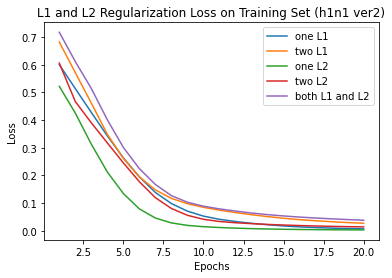

In [ ]:
# L1, L2 regularization effect on training loss


import matplotlib.pyplot as plt

history_dict_h1n1_ver2_L1_1 = history_h1n1_ver2_L1_1.history
history_dict_h1n1_ver2_L1_2 = history_h1n1_ver2_L1_2.history
history_dict_h1n1_ver2_L2_1 = history_h1n1_ver2_L2_1.history
history_dict_h1n1_ver2_L2_2 = history_h1n1_ver2_L2_2.history
history_dict_h1n1_ver2_L12 = history_h1n1_ver2_L12.history

loss_values_h1n1_ver2_L1_1 = history_dict_h1n1_ver2_L1_1["loss"]
loss_values_h1n1_ver2_L1_2 = history_dict_h1n1_ver2_L1_2["loss"]
loss_values_h1n1_ver2_L2_1 = history_dict_h1n1_ver2_L2_1["loss"]
loss_values_h1n1_ver2_L2_2 = history_dict_h1n1_ver2_L2_2["loss"]
loss_values_h1n1_ver2_L12 = history_dict_h1n1_ver2_L12["loss"]


epochs = range(1, len(loss_values_h1n1_ver2_L1_1) + 1)


plt.plot(epochs, loss_values_h1n1_ver2_L1_1, label="one L1")
plt.plot(epochs, loss_values_h1n1_ver2_L1_2, label="two L1")
plt.plot(epochs, loss_values_h1n1_ver2_L2_1, label="one L2")
plt.plot(epochs, loss_values_h1n1_ver2_L2_2, label="two L2")
plt.plot(epochs, loss_values_h1n1_ver2_L12, label="both L1 and L2")


plt.title("L1 and L2 Regularization Loss on Training Set (h1n1 ver2)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
#plt.ylim([0.3,0.9])
plt.legend()
plt.show()

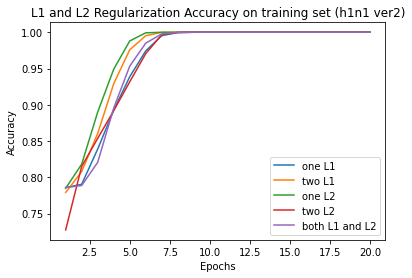

In [ ]:
# L1, L2 regularization effect on training accuracy


import matplotlib.pyplot as plt


acc_values_h1n1_ver2_L1_1 = history_dict_h1n1_ver2_L1_1["accuracy"]
acc_values_h1n1_ver2_L1_2 = history_dict_h1n1_ver2_L1_2["accuracy"]
acc_values_h1n1_ver2_L2_1 = history_dict_h1n1_ver2_L2_1["accuracy"]
acc_values_h1n1_ver2_L2_2 = history_dict_h1n1_ver2_L2_2["accuracy"]
acc_values_h1n1_ver2_L12 = history_dict_h1n1_ver2_L12["accuracy"]

epochs = range(1, len(acc_values_h1n1_ver2_L1_1) + 1)


plt.plot(epochs, acc_values_h1n1_ver2_L1_1, label="one L1")
plt.plot(epochs, acc_values_h1n1_ver2_L1_2, label="two L1")
plt.plot(epochs, acc_values_h1n1_ver2_L2_1, label="one L2")
plt.plot(epochs, acc_values_h1n1_ver2_L2_2, label="two L2")
plt.plot(epochs, acc_values_h1n1_ver2_L12, label="both L1 and L2")

plt.title("L1 and L2 Regularization Accuracy on training set (h1n1 ver2)")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
#plt.ylim([0.78, 0.85])
plt.legend()
plt.show()

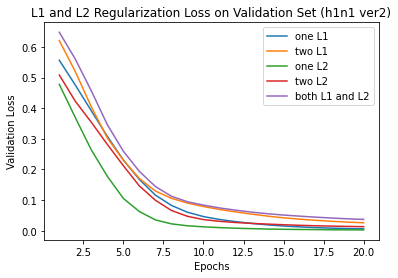

In [ ]:
# L1, L2 regularization effect on validation loss


import matplotlib.pyplot as plt


val_loss_values_h1n1_ver2_L1_1 = history_dict_h1n1_ver2_L1_1["val_loss"]
val_loss_values_h1n1_ver2_L1_2 = history_dict_h1n1_ver2_L1_2["val_loss"]
val_loss_values_h1n1_ver2_L2_1 = history_dict_h1n1_ver2_L2_1["val_loss"]
val_loss_values_h1n1_ver2_L2_2 = history_dict_h1n1_ver2_L2_2["val_loss"]
val_loss_values_h1n1_ver2_L12 = history_dict_h1n1_ver2_L12["val_loss"]


epochs = range(1, len(val_loss_values_h1n1_ver2_L1_1) + 1)


plt.plot(epochs, val_loss_values_h1n1_ver2_L1_1, label="one L1")
plt.plot(epochs, val_loss_values_h1n1_ver2_L1_2, label="two L1")
plt.plot(epochs, val_loss_values_h1n1_ver2_L2_1, label="one L2")
plt.plot(epochs, val_loss_values_h1n1_ver2_L2_2, label="two L2")
plt.plot(epochs, val_loss_values_h1n1_ver2_L12, label="both L1 and L2")


plt.title("L1 and L2 Regularization Loss on Validation Set (h1n1 ver2)")
plt.xlabel("Epochs")
plt.ylabel("Validation Loss")
#plt.ylim([0.3,0.9])
plt.legend()
plt.show()

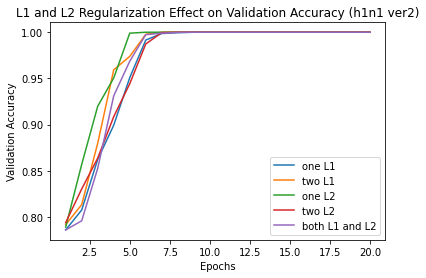

In [ ]:
# L1, L2 regularization effect on validation accuracy


import matplotlib.pyplot as plt


val_acc_values_h1n1_ver2_L1_1 = history_dict_h1n1_ver2_L1_1["val_accuracy"]
val_acc_values_h1n1_ver2_L1_2 = history_dict_h1n1_ver2_L1_2["val_accuracy"]
val_acc_values_h1n1_ver2_L2_1 = history_dict_h1n1_ver2_L2_1["val_accuracy"]
val_acc_values_h1n1_ver2_L2_2 = history_dict_h1n1_ver2_L2_2["val_accuracy"]
val_acc_values_h1n1_ver2_L12 = history_dict_h1n1_ver2_L12["val_accuracy"]



epochs = range(1, len(val_acc_values_h1n1_ver2_L1_1) + 1)


plt.plot(epochs, val_acc_values_h1n1_ver2_L1_1, label="one L1")
plt.plot(epochs, val_acc_values_h1n1_ver2_L1_2, label="two L1")
plt.plot(epochs, val_acc_values_h1n1_ver2_L2_1, label="one L2")
plt.plot(epochs, val_acc_values_h1n1_ver2_L2_2, label="two L2")
plt.plot(epochs, val_acc_values_h1n1_ver2_L12, label="both L1 and L2")


plt.title("L1 and L2 Regularization Effect on Validation Accuracy (h1n1 ver2)")
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
plt.legend()
plt.show()

## **Hyperparameter effect**

**0.005**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_h1n1_ver2_one = keras.Sequential([
                                      layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.005)),
                                      layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.005)),
                                      layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_h1n1_ver2_one.compile(optimizer = "rmsprop",
                            loss = "binary_crossentropy",
                            metrics = ["accuracy"])



# fitting model

history_h1n1_ver2_one = model_h1n1_ver2_one.fit(x_train_h1n1_ver2,
                                                y_train_h1n1_ver2,
                                                epochs = 20,
                                                batch_size = 512,
                                                validation_data = (x_valid_h1n1_ver2, y_valid_h1n1_ver2))


Epoch 1/20
39/39 [==============================] - 1s 13ms/step - loss: 0.6929 - accuracy: 0.7841 - val_loss: 0.6328 - val_accuracy: 0.7892
Epoch 2/20
39/39 [==============================] - 0s 7ms/step - loss: 0.5894 - accuracy: 0.7969 - val_loss: 0.5373 - val_accuracy: 0.8075
Epoch 3/20
39/39 [==============================] - 0s 7ms/step - loss: 0.4932 - accuracy: 0.8346 - val_loss: 0.4495 - val_accuracy: 0.8433
Epoch 4/20
39/39 [==============================] - 0s 7ms/step - loss: 0.4048 - accuracy: 0.8819 - val_loss: 0.3654 - val_accuracy: 0.8935
Epoch 5/20
39/39 [==============================] - 0s 7ms/step - loss: 0.3239 - accuracy: 0.9269 - val_loss: 0.2885 - val_accuracy: 0.9561
Epoch 6/20
39/39 [==============================] - 0s 7ms/step - loss: 0.2500 - accuracy: 0.9678 - val_loss: 0.2164 - val_accuracy: 0.9781
Epoch 7/20
39/39 [==============================] - 0s 8ms/step - loss: 0.1872 - accuracy: 0.9943 - val_loss: 0.1630 - val_accuracy: 0.9990
Epoch 8/20
39/39 [=

**0.002**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_h1n1_ver2_two = keras.Sequential([
                                      layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.002)),
                                      layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.002)),
                                      layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_h1n1_ver2_two.compile(optimizer = "rmsprop",
                            loss = "binary_crossentropy",
                            metrics = ["accuracy"])



# fitting model

history_h1n1_ver2_two = model_h1n1_ver2_two.fit(x_train_h1n1_ver2,
                                                y_train_h1n1_ver2,
                                                epochs = 20,
                                                batch_size = 512,
                                                validation_data = (x_valid_h1n1_ver2, y_valid_h1n1_ver2))


Epoch 1/20
39/39 [==============================] - 1s 8ms/step - loss: 0.5811 - accuracy: 0.7842 - val_loss: 0.5309 - val_accuracy: 0.7872
Epoch 2/20
39/39 [==============================] - 0s 4ms/step - loss: 0.4862 - accuracy: 0.7988 - val_loss: 0.4314 - val_accuracy: 0.8216
Epoch 3/20
39/39 [==============================] - 0s 4ms/step - loss: 0.3768 - accuracy: 0.8614 - val_loss: 0.3285 - val_accuracy: 0.8838
Epoch 4/20
39/39 [==============================] - 0s 4ms/step - loss: 0.2804 - accuracy: 0.9334 - val_loss: 0.2417 - val_accuracy: 0.9412
Epoch 5/20
39/39 [==============================] - 0s 4ms/step - loss: 0.1990 - accuracy: 0.9761 - val_loss: 0.1682 - val_accuracy: 0.9942
Epoch 6/20
39/39 [==============================] - 0s 4ms/step - loss: 0.1382 - accuracy: 0.9960 - val_loss: 0.1163 - val_accuracy: 0.9978
Epoch 7/20
39/39 [==============================] - 0s 4ms/step - loss: 0.0980 - accuracy: 0.9995 - val_loss: 0.0904 - val_accuracy: 0.9998
Epoch 8/20
39/39 [==

**0.001(original)**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_h1n1_ver2_three = keras.Sequential([
                                      layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.001)),
                                      layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.001)),
                                      layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_h1n1_ver2_three.compile(optimizer = "rmsprop",
                               loss = "binary_crossentropy",
                               metrics = ["accuracy"])



# fitting model

history_h1n1_ver2_three = model_h1n1_ver2_three.fit(x_train_h1n1_ver2,
                                                     y_train_h1n1_ver2,
                                                     epochs = 20,
                                                     batch_size = 512,
                                                     validation_data = (x_valid_h1n1_ver2, y_valid_h1n1_ver2))


Epoch 1/20
39/39 [==============================] - 2s 15ms/step - loss: 0.5550 - accuracy: 0.7629 - val_loss: 0.4696 - val_accuracy: 0.8105
Epoch 2/20
39/39 [==============================] - 0s 7ms/step - loss: 0.4071 - accuracy: 0.8499 - val_loss: 0.3503 - val_accuracy: 0.8596
Epoch 3/20
39/39 [==============================] - 0s 7ms/step - loss: 0.2905 - accuracy: 0.9136 - val_loss: 0.2421 - val_accuracy: 0.9368
Epoch 4/20
39/39 [==============================] - 0s 7ms/step - loss: 0.1958 - accuracy: 0.9641 - val_loss: 0.1611 - val_accuracy: 0.9895
Epoch 5/20
39/39 [==============================] - 0s 7ms/step - loss: 0.1270 - accuracy: 0.9935 - val_loss: 0.1027 - val_accuracy: 1.0000
Epoch 6/20
39/39 [==============================] - 0s 6ms/step - loss: 0.0827 - accuracy: 0.9997 - val_loss: 0.0677 - val_accuracy: 1.0000
Epoch 7/20
39/39 [==============================] - 0s 7ms/step - loss: 0.0563 - accuracy: 1.0000 - val_loss: 0.0473 - val_accuracy: 1.0000
Epoch 8/20
39/39 [=

**0.0005**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model


model_h1n1_ver2_four = keras.Sequential([
                                      layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.0005)),
                                      layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.0005)),
                                      layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_h1n1_ver2_four.compile(optimizer = "rmsprop",
                             loss = "binary_crossentropy",
                             metrics = ["accuracy"])



# fitting model

history_h1n1_ver2_four = model_h1n1_ver2_four.fit(x_train_h1n1_ver2,
                                                  y_train_h1n1_ver2,
                                                  epochs = 20,
                                                  batch_size = 512,
                                                  validation_data = (x_valid_h1n1_ver2, y_valid_h1n1_ver2))


Epoch 1/20
39/39 [==============================] - 2s 11ms/step - loss: 0.5696 - accuracy: 0.7736 - val_loss: 0.5124 - val_accuracy: 0.7859
Epoch 2/20
39/39 [==============================] - 0s 5ms/step - loss: 0.4729 - accuracy: 0.7928 - val_loss: 0.4304 - val_accuracy: 0.8206
Epoch 3/20
39/39 [==============================] - 0s 5ms/step - loss: 0.3904 - accuracy: 0.8396 - val_loss: 0.3523 - val_accuracy: 0.8572
Epoch 4/20
39/39 [==============================] - 0s 7ms/step - loss: 0.3042 - accuracy: 0.8930 - val_loss: 0.2604 - val_accuracy: 0.9120
Epoch 5/20
39/39 [==============================] - 0s 8ms/step - loss: 0.2124 - accuracy: 0.9441 - val_loss: 0.1786 - val_accuracy: 0.9774
Epoch 6/20
39/39 [==============================] - 0s 8ms/step - loss: 0.1396 - accuracy: 0.9802 - val_loss: 0.1149 - val_accuracy: 0.9976
Epoch 7/20
39/39 [==============================] - 0s 7ms/step - loss: 0.0867 - accuracy: 0.9970 - val_loss: 0.0696 - val_accuracy: 0.9990
Epoch 8/20
39/39 [=

**0.0001**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_h1n1_ver2_five = keras.Sequential([
                                      layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.0001)),
                                      layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.0001)),
                                      layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_h1n1_ver2_five.compile(optimizer = "rmsprop",
                             loss = "binary_crossentropy",
                             metrics = ["accuracy"])



# fitting model

history_h1n1_ver2_five = model_h1n1_ver2_five.fit(x_train_h1n1_ver2,
                                                  y_train_h1n1_ver2,
                                                  epochs = 20,
                                                  batch_size = 512,
                                                  validation_data = (x_valid_h1n1_ver2, y_valid_h1n1_ver2))


Epoch 1/20
39/39 [==============================] - 1s 8ms/step - loss: 0.5316 - accuracy: 0.7833 - val_loss: 0.4853 - val_accuracy: 0.7859
Epoch 2/20
39/39 [==============================] - 0s 4ms/step - loss: 0.4366 - accuracy: 0.7935 - val_loss: 0.3888 - val_accuracy: 0.8178
Epoch 3/20
39/39 [==============================] - 0s 4ms/step - loss: 0.3407 - accuracy: 0.8458 - val_loss: 0.3017 - val_accuracy: 0.8768
Epoch 4/20
39/39 [==============================] - 0s 5ms/step - loss: 0.2547 - accuracy: 0.9052 - val_loss: 0.2163 - val_accuracy: 0.9368
Epoch 5/20
39/39 [==============================] - 0s 4ms/step - loss: 0.1717 - accuracy: 0.9596 - val_loss: 0.1400 - val_accuracy: 0.9781
Epoch 6/20
39/39 [==============================] - 0s 4ms/step - loss: 0.1072 - accuracy: 0.9896 - val_loss: 0.0833 - val_accuracy: 0.9970
Epoch 7/20
39/39 [==============================] - 0s 4ms/step - loss: 0.0615 - accuracy: 0.9984 - val_loss: 0.0465 - val_accuracy: 0.9996
Epoch 8/20
39/39 [==

### visualize

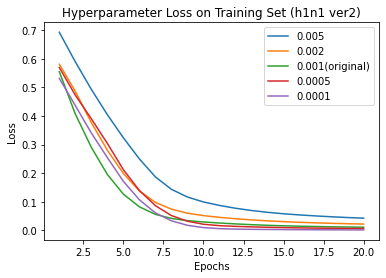

In [ ]:
# Hyperparameter effect on training loss


import matplotlib.pyplot as plt

history_dict_h1n1_ver2_one = history_h1n1_ver2_one.history
history_dict_h1n1_ver2_two = history_h1n1_ver2_two.history
history_dict_h1n1_ver2_three = history_h1n1_ver2_three.history
history_dict_h1n1_ver2_four = history_h1n1_ver2_four.history
history_dict_h1n1_ver2_five = history_h1n1_ver2_five.history

loss_values_h1n1_ver2_one = history_dict_h1n1_ver2_one["loss"]
loss_values_h1n1_ver2_two = history_dict_h1n1_ver2_two["loss"]
loss_values_h1n1_ver2_three = history_dict_h1n1_ver2_three["loss"]
loss_values_h1n1_ver2_four = history_dict_h1n1_ver2_four["loss"]
loss_values_h1n1_ver2_five = history_dict_h1n1_ver2_five["loss"]


epochs = range(1, len(loss_values_h1n1_ver2_one) + 1)


plt.plot(epochs, loss_values_h1n1_ver2_one, label="0.005")
plt.plot(epochs, loss_values_h1n1_ver2_two, label="0.002")
plt.plot(epochs, loss_values_h1n1_ver2_three, label="0.001(original)")
plt.plot(epochs, loss_values_h1n1_ver2_four, label="0.0005")
plt.plot(epochs, loss_values_h1n1_ver2_five, label="0.0001")


plt.title("Hyperparameter Loss on Training Set (h1n1 ver2)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
#plt.ylim([0.3,0.6])
plt.legend()
plt.show()

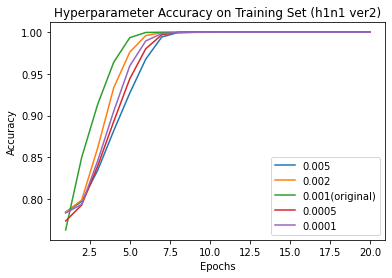

In [ ]:
# Hyperparameter effect on training accuracy


import matplotlib.pyplot as plt


acc_values_h1n1_ver2_one = history_dict_h1n1_ver2_one["accuracy"]
acc_values_h1n1_ver2_two = history_dict_h1n1_ver2_two["accuracy"]
acc_values_h1n1_ver2_three = history_dict_h1n1_ver2_three["accuracy"]
acc_values_h1n1_ver2_four = history_dict_h1n1_ver2_four["accuracy"]
acc_values_h1n1_ver2_five = history_dict_h1n1_ver2_five["accuracy"]

epochs = range(1, len(acc_values_h1n1_ver2_one) + 1)


plt.plot(epochs, acc_values_h1n1_ver2_one, label="0.005")
plt.plot(epochs, acc_values_h1n1_ver2_two, label="0.002")
plt.plot(epochs, acc_values_h1n1_ver2_three, label="0.001(original)")
plt.plot(epochs, acc_values_h1n1_ver2_four, label="0.0005")
plt.plot(epochs, acc_values_h1n1_ver2_five, label="0.0001")

plt.title("Hyperparameter Accuracy on Training Set (h1n1 ver2)")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
#plt.ylim([0.78, 0.85])
plt.legend()
plt.show()

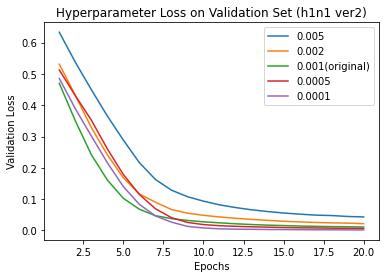

In [ ]:
# Hyperparameter effect on validation loss


import matplotlib.pyplot as plt


val_loss_values_h1n1_ver2_one = history_dict_h1n1_ver2_one["val_loss"]
val_loss_values_h1n1_ver2_two = history_dict_h1n1_ver2_two["val_loss"]
val_loss_values_h1n1_ver2_three = history_dict_h1n1_ver2_three["val_loss"]
val_loss_values_h1n1_ver2_four = history_dict_h1n1_ver2_four["val_loss"]
val_loss_values_h1n1_ver2_five = history_dict_h1n1_ver2_five["val_loss"]


epochs = range(1, len(val_loss_values_h1n1_ver2_one) + 1)


plt.plot(epochs, val_loss_values_h1n1_ver2_one, label="0.005")
plt.plot(epochs, val_loss_values_h1n1_ver2_two, label="0.002")
plt.plot(epochs, val_loss_values_h1n1_ver2_three, label="0.001(original)")
plt.plot(epochs, val_loss_values_h1n1_ver2_four, label="0.0005")
plt.plot(epochs, val_loss_values_h1n1_ver2_five, label="0.0001")


plt.title("Hyperparameter Loss on Validation Set (h1n1 ver2)")
plt.xlabel("Epochs")
plt.ylabel("Validation Loss")
#plt.ylim([0.4,0.6])
plt.legend()
plt.show()

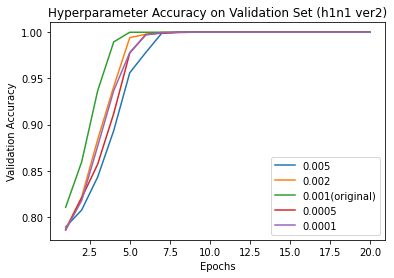

In [ ]:
# Hyperparameter effect on validation accuracy


import matplotlib.pyplot as plt



val_acc_values_h1n1_ver2_one = history_dict_h1n1_ver2_one["val_accuracy"]
val_acc_values_h1n1_ver2_two = history_dict_h1n1_ver2_two["val_accuracy"]
val_acc_values_h1n1_ver2_three = history_dict_h1n1_ver2_three["val_accuracy"]
val_acc_values_h1n1_ver2_four = history_dict_h1n1_ver2_four["val_accuracy"]
val_acc_values_h1n1_ver2_five = history_dict_h1n1_ver2_five["val_accuracy"]



epochs = range(1, len(val_acc_values_h1n1_ver2_one) + 1)


plt.plot(epochs, val_acc_values_h1n1_ver2_one, label="0.005")
plt.plot(epochs, val_acc_values_h1n1_ver2_two, label="0.002")
plt.plot(epochs, val_acc_values_h1n1_ver2_three, label="0.001(original)")
plt.plot(epochs, val_acc_values_h1n1_ver2_four, label="0.0005")
plt.plot(epochs, val_acc_values_h1n1_ver2_five, label="0.0001")


plt.title("Hyperparameter Accuracy on Validation Set (h1n1 ver2)")
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
plt.legend()
plt.show()

## **Dropout effect**

**# dropout = 1**

In [ ]:
# 수정

from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_h1n1_ver2_onedr = keras.Sequential([
                                      layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.0001)),
                                      layers.Dropout(0.5),
                                      layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.0001)),
                                      layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_h1n1_ver2_onedr.compile(optimizer = "rmsprop",
                              loss = "binary_crossentropy",
                              metrics = ["accuracy"])



# fitting model

history_h1n1_ver2_onedr = model_h1n1_ver2_onedr.fit(x_train_h1n1_ver2,
                                                    y_train_h1n1_ver2,
                                                    epochs = 20,
                                                    batch_size = 512,
                                                    validation_data = (x_valid_h1n1_ver2, y_valid_h1n1_ver2))


Epoch 1/20
39/39 [==============================] - 1s 8ms/step - loss: 1.1436 - accuracy: 0.4131 - val_loss: 0.5621 - val_accuracy: 0.7821
Epoch 2/20
39/39 [==============================] - 0s 4ms/step - loss: 0.5834 - accuracy: 0.7283 - val_loss: 0.4941 - val_accuracy: 0.7859
Epoch 3/20
39/39 [==============================] - 0s 5ms/step - loss: 0.5074 - accuracy: 0.7831 - val_loss: 0.4392 - val_accuracy: 0.7896
Epoch 4/20
39/39 [==============================] - 0s 6ms/step - loss: 0.4616 - accuracy: 0.8018 - val_loss: 0.3985 - val_accuracy: 0.7974
Epoch 5/20
39/39 [==============================] - 0s 4ms/step - loss: 0.4172 - accuracy: 0.8182 - val_loss: 0.3578 - val_accuracy: 0.8186
Epoch 6/20
39/39 [==============================] - 0s 7ms/step - loss: 0.3783 - accuracy: 0.8399 - val_loss: 0.3163 - val_accuracy: 0.8441
Epoch 7/20
39/39 [==============================] - 0s 7ms/step - loss: 0.3366 - accuracy: 0.8593 - val_loss: 0.2706 - val_accuracy: 0.8701
Epoch 8/20
39/39 [==

**# dropout = 2**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_h1n1_ver2_twodr = keras.Sequential([
                                      layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.0001)),
                                      layers.Dropout(0.5),
                                      layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.0001)),
                                      layers.Dropout(0.5),
                                      layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_h1n1_ver2_twodr.compile(optimizer = "rmsprop",
                              loss = "binary_crossentropy",
                              metrics = ["accuracy"])



# fitting model

history_h1n1_ver2_twodr = model_h1n1_ver2_twodr.fit(x_train_h1n1_ver2,
                                                    y_train_h1n1_ver2,
                                                    epochs = 20,
                                                    batch_size = 512,
                                                    validation_data = (x_valid_h1n1_ver2, y_valid_h1n1_ver2))


Epoch 1/20
39/39 [==============================] - 2s 22ms/step - loss: 0.6890 - accuracy: 0.6582 - val_loss: 0.5565 - val_accuracy: 0.7859
Epoch 2/20
39/39 [==============================] - 0s 9ms/step - loss: 0.6006 - accuracy: 0.7394 - val_loss: 0.5396 - val_accuracy: 0.7859
Epoch 3/20
39/39 [==============================] - 0s 11ms/step - loss: 0.5544 - accuracy: 0.7748 - val_loss: 0.5149 - val_accuracy: 0.7859
Epoch 4/20
39/39 [==============================] - 0s 9ms/step - loss: 0.5286 - accuracy: 0.7842 - val_loss: 0.4803 - val_accuracy: 0.7859
Epoch 5/20
39/39 [==============================] - 0s 9ms/step - loss: 0.4974 - accuracy: 0.7895 - val_loss: 0.4467 - val_accuracy: 0.7859
Epoch 6/20
39/39 [==============================] - 0s 10ms/step - loss: 0.4728 - accuracy: 0.7941 - val_loss: 0.4113 - val_accuracy: 0.7861
Epoch 7/20
39/39 [==============================] - 0s 11ms/step - loss: 0.4453 - accuracy: 0.8030 - val_loss: 0.3804 - val_accuracy: 0.7888
Epoch 8/20
39/39

### visualize

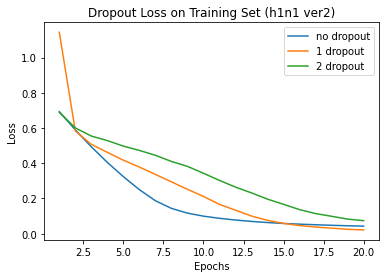

In [ ]:
# Dropout effect on training loss


import matplotlib.pyplot as plt


history_dict_h1n1_ver2_onedr = history_h1n1_ver2_onedr.history
history_dict_h1n1_ver2_twodr = history_h1n1_ver2_twodr.history


loss_values_h1n1_ver2_onedr = history_dict_h1n1_ver2_onedr["loss"]
loss_values_h1n1_ver2_twodr = history_dict_h1n1_ver2_twodr["loss"]

epochs = range(1, len(loss_values_h1n1_ver2_onedr) + 1)


plt.plot(epochs, loss_values_h1n1_ver2_one, label="no dropout")
plt.plot(epochs, loss_values_h1n1_ver2_onedr, label="1 dropout")
plt.plot(epochs, loss_values_h1n1_ver2_twodr, label="2 dropout")

plt.title("Dropout Loss on Training Set (h1n1 ver2)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
#plt.ylim([0.4,0.6])
plt.legend()
plt.show()

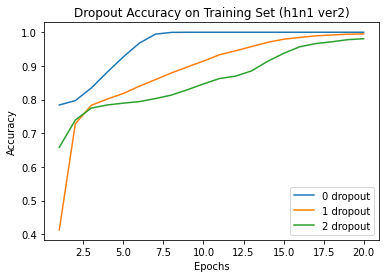

In [ ]:
# Dropout effect on training accuracy


import matplotlib.pyplot as plt


acc_values_h1n1_ver2_onedr = history_dict_h1n1_ver2_onedr["accuracy"]
acc_values_h1n1_ver2_twodr = history_dict_h1n1_ver2_twodr["accuracy"]

epochs = range(1, len(acc_values_h1n1_ver2_onedr) + 1)


plt.plot(epochs, acc_values_h1n1_ver2_one, label="0 dropout")
plt.plot(epochs, acc_values_h1n1_ver2_onedr, label="1 dropout")
plt.plot(epochs, acc_values_h1n1_ver2_twodr, label="2 dropout")

plt.title("Dropout Accuracy on Training Set (h1n1 ver2)")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
#plt.ylim([0.78, 0.85])
plt.legend()
plt.show()

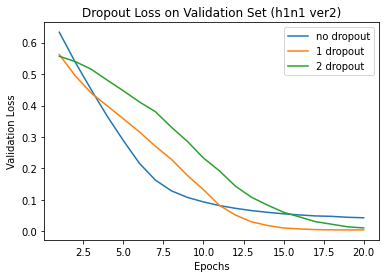

In [ ]:
# Dropout effect on validation loss


import matplotlib.pyplot as plt


val_loss_values_h1n1_ver2_onedr = history_dict_h1n1_ver2_onedr["val_loss"]
val_loss_values_h1n1_ver2_twodr = history_dict_h1n1_ver2_twodr["val_loss"]


epochs = range(1, len(val_loss_values_h1n1_ver2_onedr) + 1)


plt.plot(epochs, val_loss_values_h1n1_ver2_one, label="no dropout")
plt.plot(epochs, val_loss_values_h1n1_ver2_onedr, label="1 dropout")
plt.plot(epochs, val_loss_values_h1n1_ver2_twodr, label="2 dropout")

plt.title("Dropout Loss on Validation Set (h1n1 ver2)")
plt.xlabel("Epochs")
plt.ylabel("Validation Loss")
#plt.ylim([0.4,0.6])
plt.legend()
plt.show()

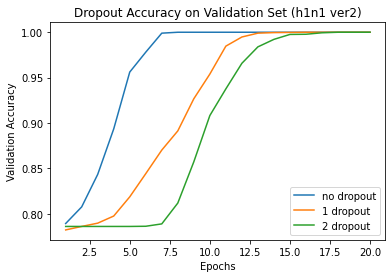

In [ ]:
# Dropout effect on validation accuracy


import matplotlib.pyplot as plt



val_acc_values_h1n1_ver2_onedr = history_dict_h1n1_ver2_onedr["val_accuracy"]
val_acc_values_h1n1_ver2_twodr = history_dict_h1n1_ver2_twodr["val_accuracy"]



epochs = range(1, len(val_acc_values_h1n1_ver2_onedr) + 1)


plt.plot(epochs, val_acc_values_h1n1_ver2_one, label="no dropout")
plt.plot(epochs, val_acc_values_h1n1_ver2_onedr, label="1 dropout")
plt.plot(epochs, val_acc_values_h1n1_ver2_twodr, label="2 dropout")


plt.title("Dropout Accuracy on Validation Set (h1n1 ver2)")
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
plt.legend()
plt.show()

## **Hyperparameter effect**

**0.8**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_h1n1_ver2_twodr2 = keras.Sequential([
                                      layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.0001)),
                                      layers.Dropout(0.8),
                                      layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.0001)),
                                      layers.Dropout(0.5),
                                      layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_h1n1_ver2_twodr2.compile(optimizer = "rmsprop",
                                   loss = "binary_crossentropy",
                                   metrics = ["accuracy"])



# fitting model

history_h1n1_ver2_twodr2 = model_h1n1_ver2_twodr2.fit(x_train_h1n1_ver2,
                                                      y_train_h1n1_ver2,
                                                      epochs = 20,
                                                      batch_size = 512,
                                                       validation_data = (x_valid_h1n1_ver2, y_valid_h1n1_ver2))


Epoch 1/20
39/39 [==============================] - 2s 15ms/step - loss: 1.1706 - accuracy: 0.5225 - val_loss: 0.5573 - val_accuracy: 0.7851
Epoch 2/20
39/39 [==============================] - 0s 7ms/step - loss: 0.7328 - accuracy: 0.6609 - val_loss: 0.5441 - val_accuracy: 0.7867
Epoch 3/20
39/39 [==============================] - 0s 7ms/step - loss: 0.6232 - accuracy: 0.7418 - val_loss: 0.5391 - val_accuracy: 0.7859
Epoch 4/20
39/39 [==============================] - 0s 7ms/step - loss: 0.5809 - accuracy: 0.7750 - val_loss: 0.5230 - val_accuracy: 0.7859
Epoch 5/20
39/39 [==============================] - 0s 7ms/step - loss: 0.5526 - accuracy: 0.7813 - val_loss: 0.5005 - val_accuracy: 0.7859
Epoch 6/20
39/39 [==============================] - 0s 8ms/step - loss: 0.5355 - accuracy: 0.7851 - val_loss: 0.4833 - val_accuracy: 0.7859
Epoch 7/20
39/39 [==============================] - 0s 7ms/step - loss: 0.5207 - accuracy: 0.7856 - val_loss: 0.4678 - val_accuracy: 0.7859
Epoch 8/20
39/39 [=

### visualize

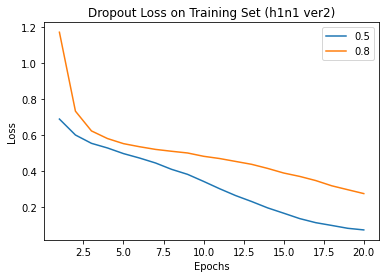

In [ ]:
# Dropout effect on training loss


import matplotlib.pyplot as plt


history_dict_h1n1_ver2_twodr = history_h1n1_ver2_twodr.history
history_dict_h1n1_ver2_twodr2 = history_h1n1_ver2_twodr2.history


loss_values_h1n1_ver2_twodr = history_dict_h1n1_ver2_twodr["loss"]
loss_values_h1n1_ver2_twodr2 = history_dict_h1n1_ver2_twodr2["loss"]


epochs = range(1, len(loss_values_h1n1_ver2_twodr) + 1)


plt.plot(epochs, loss_values_h1n1_ver2_twodr, label="0.5")
plt.plot(epochs, loss_values_h1n1_ver2_twodr2, label="0.8")

plt.title("Dropout Loss on Training Set (h1n1 ver2)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
#plt.ylim([0.4,0.6])
plt.legend()
plt.show()

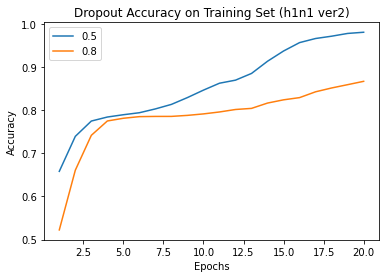

In [ ]:
# Dropout effect on training accuracy


import matplotlib.pyplot as plt


acc_values_h1n1_ver2_twodr = history_dict_h1n1_ver2_twodr["accuracy"]
acc_values_h1n1_ver2_twodr2 = history_dict_h1n1_ver2_twodr2["accuracy"]

epochs = range(1, len(acc_values_h1n1_ver2_twodr) + 1)


plt.plot(epochs, acc_values_h1n1_ver2_twodr, label="0.5")
plt.plot(epochs, acc_values_h1n1_ver2_twodr2, label="0.8")


plt.title("Dropout Accuracy on Training Set (h1n1 ver2)")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
#plt.ylim([0.78, 0.85])
plt.legend()
plt.show()

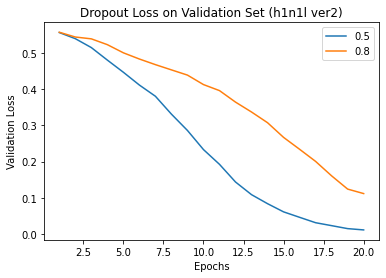

In [ ]:
# Dropout effect on validation loss


import matplotlib.pyplot as plt


val_loss_values_h1n1_ver2_twodr = history_dict_h1n1_ver2_twodr["val_loss"]
val_loss_values_h1n1_ver2_twodr2 = history_dict_h1n1_ver2_twodr2["val_loss"]


epochs = range(1, len(val_loss_values_h1n1_ver2_twodr) + 1)


plt.plot(epochs, val_loss_values_h1n1_ver2_twodr, label="0.5")
plt.plot(epochs, val_loss_values_h1n1_ver2_twodr2, label="0.8")


plt.title("Dropout Loss on Validation Set (h1n1l ver2)")
plt.xlabel("Epochs")
plt.ylabel("Validation Loss")
#plt.ylim([0.4,0.6])
plt.legend()
plt.show()

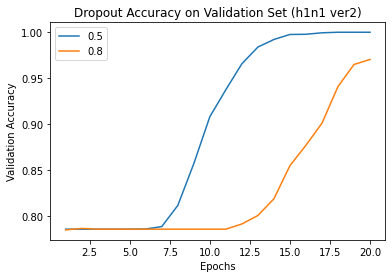

In [ ]:
# Dropout effect on validation accuracy


import matplotlib.pyplot as plt



val_acc_values_h1n1_ver2_twodr = history_dict_h1n1_ver2_twodr["val_accuracy"]
val_acc_values_h1n1_ver2_twodr2 = history_dict_h1n1_ver2_twodr2["val_accuracy"]



epochs = range(1, len(val_acc_values_h1n1_ver2_twodr) + 1)


plt.plot(epochs, val_acc_values_h1n1_ver2_twodr, label="0.5")
plt.plot(epochs, val_acc_values_h1n1_ver2_twodr2, label="0.8")


plt.title("Dropout Accuracy on Validation Set (h1n1 ver2)")
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
plt.legend()
plt.show()

# Seasonal Model.ver1

In [4]:
train_seasonal_ver1 = pd.read_csv('/content/drive/MyDrive/22-1_DLAI_Team_Project/train_seasonal_ver1.csv')

In [5]:
print(train_seasonal_ver1.shape)
train_seasonal_ver1.head()

(25026, 22)


,respondent_id,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,chronic_med_condition,child_under_6_months,...,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,race,sex,hhs_geo_region,census_msa,household_adults,household_children,seasonal_vaccine
0,0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,1.0,2.0,4,1,1,8,1,0.0,0.0,0
1,1,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,2.0,4.0,2,1,2,1,2,0.0,0.0,1
2,2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,2.0,1,1,2,9,2,2.0,0.0,0
3,3,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,4.0,1.0,5,1,1,5,3,0.0,0.0,1
4,4,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,1.0,4.0,3,1,1,9,2,1.0,0.0,0


In [6]:
train_seasonal_ver1.columns

Index(['respondent_id', 'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'chronic_med_condition',
       'child_under_6_months', 'health_worker', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group', 'race',
       'sex', 'hhs_geo_region', 'census_msa', 'household_adults',
       'household_children', 'seasonal_vaccine'],
      dtype='object')

In [7]:
## split feature and target, train set and validation set

from sklearn.model_selection import train_test_split

feature = train_seasonal_ver1.iloc[:,1:-1]
target = train_seasonal_ver1['seasonal_vaccine']

x_train_seasonal_ver1, x_valid_seasonal_ver1, y_train_seasonal_ver1, y_valid_seasonal_ver1 = train_test_split(feature, target, test_size=0.4,shuffle=True,
                                                                                                              stratify=target,  random_state=1234) 

### Layer effect

**layer 3개**

In [8]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_seasonal_ver1_s = keras.Sequential([
                                          layers.Dense(16, activation = "relu"),
                                          layers.Dense(16, activation = "relu"),
                                          layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_seasonal_ver1_s.compile(optimizer = "rmsprop",
                              loss = "binary_crossentropy",
                              metrics = ["accuracy"])



# fitting model

history_seasonal_ver1_s = model_seasonal_ver1_s.fit(x_train_seasonal_ver1,
                                                    y_train_seasonal_ver1,
                                                    epochs = 20,
                                                    batch_size = 512,
                                                    validation_data = (x_valid_seasonal_ver1, y_valid_seasonal_ver1))

Epoch 1/20
30/30 [==============================] - 5s 11ms/step - loss: 0.7486 - accuracy: 0.5610 - val_loss: 0.6748 - val_accuracy: 0.5902
Epoch 2/20
30/30 [==============================] - 0s 5ms/step - loss: 0.6441 - accuracy: 0.6318 - val_loss: 0.6241 - val_accuracy: 0.6572
Epoch 3/20
30/30 [==============================] - 0s 5ms/step - loss: 0.6032 - accuracy: 0.6790 - val_loss: 0.5914 - val_accuracy: 0.6914
Epoch 4/20
30/30 [==============================] - 0s 5ms/step - loss: 0.5778 - accuracy: 0.7051 - val_loss: 0.5749 - val_accuracy: 0.7092
Epoch 5/20
30/30 [==============================] - 0s 6ms/step - loss: 0.5663 - accuracy: 0.7154 - val_loss: 0.5705 - val_accuracy: 0.7130
Epoch 6/20
30/30 [==============================] - 0s 6ms/step - loss: 0.5606 - accuracy: 0.7190 - val_loss: 0.5637 - val_accuracy: 0.7182
Epoch 7/20
30/30 [==============================] - 0s 6ms/step - loss: 0.5567 - accuracy: 0.7217 - val_loss: 0.5588 - val_accuracy: 0.7241
Epoch 8/20
30/30 [=

**layer 8개**


In [27]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_seasonal_ver1_b = keras.Sequential([
                                          layers.Dense(256, activation = "relu"),
                                          layers.Dense(256, activation = "relu"),
                                          layers.Dense(128, activation = "relu"),
                                          layers.Dense(64, activation = "relu"),
                                          layers.Dense(64, activation = "relu"),
                                          layers.Dense(16, activation = "relu"),
                                          layers.Dense(16, activation = "relu"),
                                          layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_seasonal_ver1_b.compile(optimizer = "rmsprop",
                              loss = "binary_crossentropy",
                              metrics = ["accuracy"])



# fitting model

history_seasonal_ver1_b = model_seasonal_ver1_b.fit(x_train_seasonal_ver1,
                                                    y_train_seasonal_ver1,
                                                    epochs = 10,
                                                    batch_size = 512,
                                                    validation_data = (x_valid_seasonal_ver1, y_valid_seasonal_ver1))


Epoch 1/10
30/30 [==============================] - 4s 33ms/step - loss: 0.6218 - accuracy: 0.6622 - val_loss: 0.5603 - val_accuracy: 0.7206
Epoch 2/10
30/30 [==============================] - 0s 13ms/step - loss: 0.5617 - accuracy: 0.7163 - val_loss: 0.5541 - val_accuracy: 0.7237
Epoch 3/10
30/30 [==============================] - 0s 13ms/step - loss: 0.5534 - accuracy: 0.7261 - val_loss: 0.5571 - val_accuracy: 0.7293
Epoch 4/10
30/30 [==============================] - 0s 14ms/step - loss: 0.5493 - accuracy: 0.7279 - val_loss: 0.5566 - val_accuracy: 0.7219
Epoch 5/10
30/30 [==============================] - 0s 11ms/step - loss: 0.5412 - accuracy: 0.7338 - val_loss: 0.5418 - val_accuracy: 0.7297
Epoch 6/10
30/30 [==============================] - 0s 12ms/step - loss: 0.5396 - accuracy: 0.7320 - val_loss: 0.5563 - val_accuracy: 0.7181
Epoch 7/10
30/30 [==============================] - 0s 13ms/step - loss: 0.5348 - accuracy: 0.7377 - val_loss: 0.5424 - val_accuracy: 0.7373
Epoch 8/10
30

#### visualize

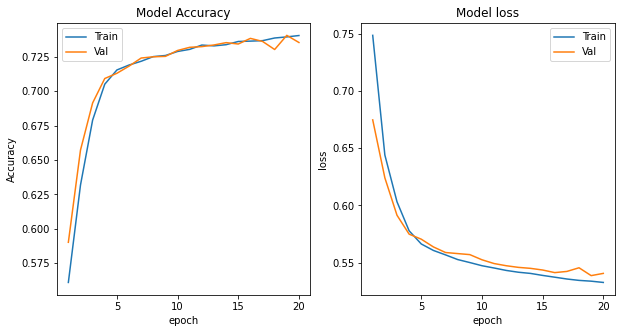

In [25]:

def learning_curve(history, epoch):
  plt.figure(figsize = (10,5))
  epoch_range = np.arange(1, epoch + 1)

  plt.subplot(1, 2, 1)

  plt.plot(epoch_range, history_seasonal_ver1_s.history['accuracy'])
  plt.plot(epoch_range, history_seasonal_ver1_s.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.xlabel('epoch')
  plt.ylabel('Accuracy')
  plt.legend(['Train', 'Val'])

  plt.subplot(1,2,2)

  plt.plot(epoch_range, history_seasonal_ver1_s.history['loss'])
  plt.plot(epoch_range, history_seasonal_ver1_s.history['val_loss'])
  plt.title('Model loss')
  plt.xlabel('epoch')
  plt.ylabel('loss')
  plt.legend(['Train', 'Val'])
  plt.show()
  
learning_curve(history_seasonal_ver1_s.history, 20)

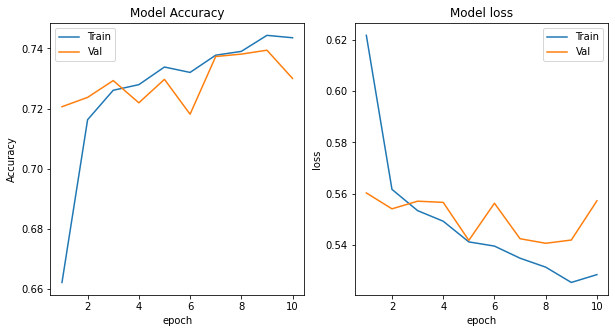

In [29]:

def learning_curve(history, epoch):
  plt.figure(figsize = (10,5))
  epoch_range = np.arange(1, epoch + 1)

  plt.subplot(1, 2, 1)

  plt.plot(epoch_range, history_seasonal_ver1_b.history['accuracy'])
  plt.plot(epoch_range, history_seasonal_ver1_b.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.xlabel('epoch')
  plt.ylabel('Accuracy')
  plt.legend(['Train', 'Val'])

  plt.subplot(1,2,2)

  plt.plot(epoch_range, history_seasonal_ver1_b.history['loss'])
  plt.plot(epoch_range, history_seasonal_ver1_b.history['val_loss'])
  plt.title('Model loss')
  plt.xlabel('epoch')
  plt.ylabel('loss')
  plt.legend(['Train', 'Val'])
  plt.show()
  
learning_curve(history_seasonal_ver1_b.history, 10)

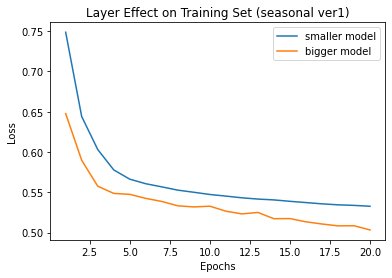

In [15]:
# Layer effect on training loss


import matplotlib.pyplot as plt

history_dict_seasonal_ver1_s = history_seasonal_ver1_s.history
history_dict_seasonal_ver1_b = history_seasonal_ver1_b.history

loss_values_seasonal_ver1_s = history_dict_seasonal_ver1_s["loss"]
loss_values_seasonal_ver1_b = history_dict_seasonal_ver1_b["loss"]

epochs = range(1, len(loss_values_seasonal_ver1_s) + 1)


plt.plot(epochs, loss_values_seasonal_ver1_s, label="smaller model")
plt.plot(epochs, loss_values_seasonal_ver1_b, label="bigger model")


plt.title("Layer Effect on Training Set (seasonal ver1)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
#plt.ylim([0.3,0.9])
plt.legend()
plt.show()

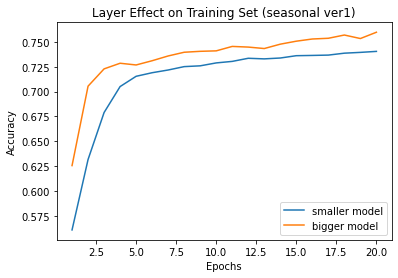

In [16]:
# Layer effect on training accuracy


import matplotlib.pyplot as plt



acc_values_seasonal_ver1_s = history_dict_seasonal_ver1_s["accuracy"]
acc_values_seasonal_ver1_b = history_dict_seasonal_ver1_b["accuracy"]

epochs = range(1, len(acc_values_seasonal_ver1_s) + 1)


plt.plot(epochs, acc_values_seasonal_ver1_s, label="smaller model")
plt.plot(epochs, acc_values_seasonal_ver1_b, label="bigger model")


plt.title("Layer Effect on Training Set (seasonal ver1)")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
#plt.ylim([0.3,0.9])
plt.legend()
plt.show()

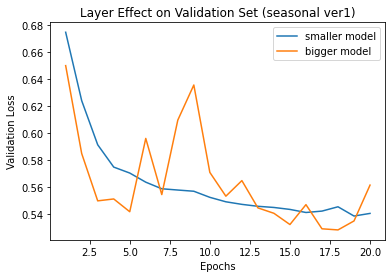

In [17]:
# Layer effect on validation loss


import matplotlib.pyplot as plt



val_loss_values_seasonal_ver1_s = history_dict_seasonal_ver1_s["val_loss"]
val_loss_values_seasonal_ver1_b = history_dict_seasonal_ver1_b["val_loss"]

epochs = range(1, len(val_loss_values_seasonal_ver1_s) + 1)


plt.plot(epochs, val_loss_values_seasonal_ver1_s, label="smaller model")
plt.plot(epochs, val_loss_values_seasonal_ver1_b, label="bigger model")


plt.title("Layer Effect on Validation Set (seasonal ver1)")
plt.xlabel("Epochs")
plt.ylabel("Validation Loss")
#plt.ylim([0.3,0.9])
plt.legend()
plt.show()

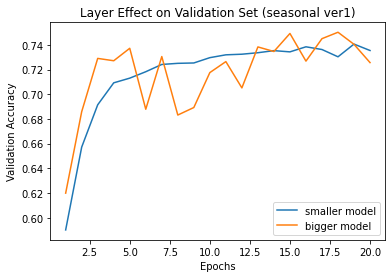

In [18]:
# Layer effect on validation accuracy


import matplotlib.pyplot as plt



val_acc_values_seasonal_ver1_s = history_dict_seasonal_ver1_s["val_accuracy"]
val_acc_values_seasonal_ver1_b = history_dict_seasonal_ver1_b["val_accuracy"]

epochs = range(1, len(val_acc_values_seasonal_ver1_s) + 1)


plt.plot(epochs, val_acc_values_seasonal_ver1_s, label="smaller model")
plt.plot(epochs, val_acc_values_seasonal_ver1_b, label="bigger model")


plt.title("Layer Effect on Validation Set (seasonal ver1)")
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
#plt.ylim([0.3,0.9])
plt.legend()
plt.show()

## **L1, L2 regularization effect**

**layer 8개 + L1 regularization 1개**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_seasonal_ver1_L1_1 = keras.Sequential([
                                             layers.Dense(256, activation = "relu"),
                                             layers.Dense(256, activation = "relu"),
                                             layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l1(0.001)),
                                             layers.Dense(64, activation = "relu"),
                                             layers.Dense(64, activation = "relu"),
                                             layers.Dense(16, activation = "relu"),
                                             layers.Dense(16, activation = "relu"),
                                             layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_seasonal_ver1_L1_1.compile(optimizer = "rmsprop",
                                 loss = "binary_crossentropy",
                                 metrics = ["accuracy"])



# fitting model

history_seasonal_ver1_L1_1 = model_seasonal_ver1_L1_1.fit(x_train_seasonal_ver1,
                                                          y_train_seasonal_ver1,
                                                          epochs = 20,
                                                          batch_size = 512,
                                                          validation_data = (x_valid_seasonal_ver1, y_valid_seasonal_ver1))


Epoch 1/20
40/40 [==============================] - 1s 9ms/step - loss: 1.9929 - accuracy: 0.6676 - val_loss: 1.4856 - val_accuracy: 0.7159
Epoch 2/20
40/40 [==============================] - 0s 5ms/step - loss: 1.1851 - accuracy: 0.7216 - val_loss: 0.9433 - val_accuracy: 0.7062
Epoch 3/20
40/40 [==============================] - 0s 5ms/step - loss: 0.7668 - accuracy: 0.7295 - val_loss: 0.6846 - val_accuracy: 0.7271
Epoch 4/20
40/40 [==============================] - 0s 5ms/step - loss: 0.6412 - accuracy: 0.7275 - val_loss: 0.6368 - val_accuracy: 0.7099
Epoch 5/20
40/40 [==============================] - 0s 5ms/step - loss: 0.6002 - accuracy: 0.7356 - val_loss: 0.6102 - val_accuracy: 0.7323
Epoch 6/20
40/40 [==============================] - 0s 5ms/step - loss: 0.5808 - accuracy: 0.7352 - val_loss: 0.6295 - val_accuracy: 0.6976
Epoch 7/20
40/40 [==============================] - 0s 6ms/step - loss: 0.5657 - accuracy: 0.7416 - val_loss: 0.6175 - val_accuracy: 0.7016
Epoch 8/20
40/40 [==

**layer 8개 + L1 regularization 2개**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_seasonal_ver1_L1_2 = keras.Sequential([
                                             layers.Dense(256, activation = "relu"),
                                             layers.Dense(256, activation = "relu"),
                                             layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l1(0.001)),
                                             layers.Dense(64, activation = "relu"),
                                             layers.Dense(64, activation = "relu"),
                                             layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l1(0.001)),
                                             layers.Dense(16, activation = "relu"),
                                             layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_seasonal_ver1_L1_2.compile(optimizer = "rmsprop",
                                 loss = "binary_crossentropy",
                                 metrics = ["accuracy"])



# fitting model

history_seasonal_ver1_L1_2 = model_seasonal_ver1_L1_2.fit(x_train_seasonal_ver1,
                                                          y_train_seasonal_ver1,
                                                          epochs = 20,
                                                          batch_size = 512,
                                                          validation_data = (x_valid_seasonal_ver1, y_valid_seasonal_ver1))


Epoch 1/20
40/40 [==============================] - 1s 10ms/step - loss: 2.0941 - accuracy: 0.6540 - val_loss: 1.5969 - val_accuracy: 0.6792
Epoch 2/20
40/40 [==============================] - 0s 6ms/step - loss: 1.2535 - accuracy: 0.7157 - val_loss: 1.0150 - val_accuracy: 0.6992
Epoch 3/20
40/40 [==============================] - 0s 5ms/step - loss: 0.8359 - accuracy: 0.7217 - val_loss: 0.7398 - val_accuracy: 0.7279
Epoch 4/20
40/40 [==============================] - 0s 5ms/step - loss: 0.6962 - accuracy: 0.7281 - val_loss: 0.8103 - val_accuracy: 0.6404
Epoch 5/20
40/40 [==============================] - 0s 6ms/step - loss: 0.6481 - accuracy: 0.7328 - val_loss: 0.6528 - val_accuracy: 0.7289
Epoch 6/20
40/40 [==============================] - 0s 6ms/step - loss: 0.6175 - accuracy: 0.7333 - val_loss: 0.6505 - val_accuracy: 0.6894
Epoch 7/20
40/40 [==============================] - 0s 6ms/step - loss: 0.5976 - accuracy: 0.7374 - val_loss: 0.6364 - val_accuracy: 0.7175
Epoch 8/20
40/40 [=

**layer 8개 + L2 regularization 1개**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_seasonal_ver1_L2_1 = keras.Sequential([
                                             layers.Dense(256, activation = "relu"),
                                             layers.Dense(256, activation = "relu"),
                                             layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l2(0.001)),
                                             layers.Dense(64, activation = "relu"),
                                             layers.Dense(64, activation = "relu"),
                                             layers.Dense(16, activation = "relu"),
                                             layers.Dense(16, activation = "relu"),
                                             layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_seasonal_ver1_L2_1.compile(optimizer = "rmsprop",
                             loss = "binary_crossentropy",
                             metrics = ["accuracy"])



# fitting model

history_seasonal_ver1_L2_1 = model_seasonal_ver1_L2_1.fit(x_train_seasonal_ver1,
                                                          y_train_seasonal_ver1,
                                                          epochs = 20,
                                                          batch_size = 512,
                                                          validation_data = (x_valid_seasonal_ver1, y_valid_seasonal_ver1))


Epoch 1/20
40/40 [==============================] - 1s 10ms/step - loss: 0.7242 - accuracy: 0.6632 - val_loss: 0.6858 - val_accuracy: 0.7103
Epoch 2/20
40/40 [==============================] - 0s 6ms/step - loss: 0.6196 - accuracy: 0.7201 - val_loss: 0.6038 - val_accuracy: 0.7203
Epoch 3/20
40/40 [==============================] - 0s 6ms/step - loss: 0.5865 - accuracy: 0.7279 - val_loss: 0.5973 - val_accuracy: 0.7265
Epoch 4/20
40/40 [==============================] - 0s 5ms/step - loss: 0.5710 - accuracy: 0.7301 - val_loss: 0.5965 - val_accuracy: 0.7113
Epoch 5/20
40/40 [==============================] - 0s 5ms/step - loss: 0.5593 - accuracy: 0.7337 - val_loss: 0.5825 - val_accuracy: 0.7145
Epoch 6/20
40/40 [==============================] - 0s 7ms/step - loss: 0.5487 - accuracy: 0.7393 - val_loss: 0.5584 - val_accuracy: 0.7357
Epoch 7/20
40/40 [==============================] - 0s 6ms/step - loss: 0.5443 - accuracy: 0.7383 - val_loss: 0.5636 - val_accuracy: 0.7349
Epoch 8/20
40/40 [=

**layer 8개 + L2 regularization 2개**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_seasonal_ver1_L2_2 = keras.Sequential([
                                             layers.Dense(256, activation = "relu"),
                                             layers.Dense(256, activation = "relu"),
                                             layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l2(0.001)),
                                             layers.Dense(64, activation = "relu"),
                                             layers.Dense(64, activation = "relu"),
                                             layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.001)),
                                             layers.Dense(16, activation = "relu"),
                                             layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_seasonal_ver1_L2_2.compile(optimizer = "rmsprop",
                                 loss = "binary_crossentropy",
                                 metrics = ["accuracy"])



# fitting model

history_seasonal_ver1_L2_2 = model_seasonal_ver1_L2_2.fit(x_train_seasonal_ver1,
                                                          y_train_seasonal_ver1,
                                                          epochs = 20,
                                                          batch_size = 512,
                                                          validation_data = (x_valid_seasonal_ver1, y_valid_seasonal_ver1))


Epoch 1/20
40/40 [==============================] - 3s 16ms/step - loss: 0.7485 - accuracy: 0.6695 - val_loss: 0.6711 - val_accuracy: 0.7101
Epoch 2/20
40/40 [==============================] - 0s 8ms/step - loss: 0.6403 - accuracy: 0.7176 - val_loss: 0.7203 - val_accuracy: 0.6552
Epoch 3/20
40/40 [==============================] - 0s 9ms/step - loss: 0.6014 - accuracy: 0.7263 - val_loss: 0.6076 - val_accuracy: 0.7259
Epoch 4/20
40/40 [==============================] - 0s 9ms/step - loss: 0.5828 - accuracy: 0.7300 - val_loss: 0.5823 - val_accuracy: 0.7265
Epoch 5/20
40/40 [==============================] - 0s 9ms/step - loss: 0.5660 - accuracy: 0.7354 - val_loss: 0.5763 - val_accuracy: 0.7239
Epoch 6/20
40/40 [==============================] - 0s 12ms/step - loss: 0.5576 - accuracy: 0.7361 - val_loss: 0.6252 - val_accuracy: 0.7012
Epoch 7/20
40/40 [==============================] - 0s 12ms/step - loss: 0.5515 - accuracy: 0.7404 - val_loss: 0.6181 - val_accuracy: 0.6934
Epoch 8/20
40/40 

**layer 8개 + L1&L2 regularization 1개**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_seasonal_ver1_L12 = keras.Sequential([
                                            layers.Dense(256, activation = "relu"),
                                            layers.Dense(256, activation = "relu"),
                                            layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l1_l2(l1 = 0.001, l2 = 0.001)),
                                            layers.Dense(64, activation = "relu"),
                                            layers.Dense(64, activation = "relu"),
                                            layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l1_l2(l1 = 0.001, l2 = 0.001)),
                                            layers.Dense(16, activation = "relu"),
                                            layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_seasonal_ver1_L12.compile(optimizer = "rmsprop",
                                loss = "binary_crossentropy",
                                metrics = ["accuracy"])



# fitting model

history_seasonal_ver1_L12 = model_seasonal_ver1_L12.fit(x_train_seasonal_ver1,
                                                        y_train_seasonal_ver1,
                                                        epochs = 20,
                                                        batch_size = 512,
                                                        validation_data = (x_valid_seasonal_ver1, y_valid_seasonal_ver1))


Epoch 1/20
40/40 [==============================] - 2s 16ms/step - loss: 2.2638 - accuracy: 0.6629 - val_loss: 1.7313 - val_accuracy: 0.6644
Epoch 2/20
40/40 [==============================] - 0s 6ms/step - loss: 1.3567 - accuracy: 0.7152 - val_loss: 1.1271 - val_accuracy: 0.6468
Epoch 3/20
40/40 [==============================] - 0s 9ms/step - loss: 0.8840 - accuracy: 0.7258 - val_loss: 0.7748 - val_accuracy: 0.7223
Epoch 4/20
40/40 [==============================] - 0s 10ms/step - loss: 0.7238 - accuracy: 0.7274 - val_loss: 0.7153 - val_accuracy: 0.7101
Epoch 5/20
40/40 [==============================] - 0s 9ms/step - loss: 0.6656 - accuracy: 0.7315 - val_loss: 0.6800 - val_accuracy: 0.7161
Epoch 6/20
40/40 [==============================] - 0s 10ms/step - loss: 0.6330 - accuracy: 0.7314 - val_loss: 0.6583 - val_accuracy: 0.6988
Epoch 7/20
40/40 [==============================] - 0s 10ms/step - loss: 0.6100 - accuracy: 0.7368 - val_loss: 0.6204 - val_accuracy: 0.7333
Epoch 8/20
40/40

### visualize

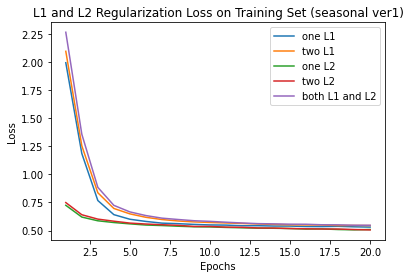

In [ ]:
# L1, L2 regularization effect on training loss


import matplotlib.pyplot as plt

history_dict_seasonal_ver1_L1_1 = history_seasonal_ver1_L1_1.history
history_dict_seasonal_ver1_L1_2 = history_seasonal_ver1_L1_2.history
history_dict_seasonal_ver1_L2_1 = history_seasonal_ver1_L2_1.history
history_dict_seasonal_ver1_L2_2 = history_seasonal_ver1_L2_2.history
history_dict_seasonal_ver1_L12 = history_seasonal_ver1_L12.history

loss_values_seasonal_ver1_L1_1 = history_dict_seasonal_ver1_L1_1["loss"]
loss_values_seasonal_ver1_L1_2 = history_dict_seasonal_ver1_L1_2["loss"]
loss_values_seasonal_ver1_L2_1 = history_dict_seasonal_ver1_L2_1["loss"]
loss_values_seasonal_ver1_L2_2 = history_dict_seasonal_ver1_L2_2["loss"]
loss_values_seasonal_ver1_L12 = history_dict_seasonal_ver1_L12["loss"]


epochs = range(1, len(loss_values_seasonal_ver1_L1_1) + 1)


plt.plot(epochs, loss_values_seasonal_ver1_L1_1, label="one L1")
plt.plot(epochs, loss_values_seasonal_ver1_L1_2, label="two L1")
plt.plot(epochs, loss_values_seasonal_ver1_L2_1, label="one L2")
plt.plot(epochs, loss_values_seasonal_ver1_L2_2, label="two L2")
plt.plot(epochs, loss_values_seasonal_ver1_L12, label="both L1 and L2")


plt.title("L1 and L2 Regularization Loss on Training Set (seasonal ver1)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
#plt.ylim([0.3,0.9])
plt.legend()
plt.show()

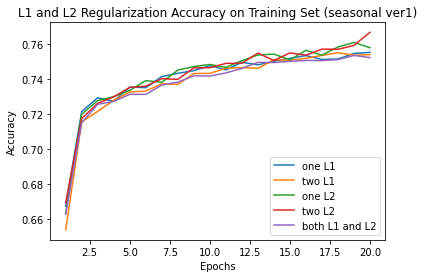

In [ ]:
# L1, L2 regularization effect on training accuracy


import matplotlib.pyplot as plt


acc_values_seasonal_ver1_L1_1 = history_dict_seasonal_ver1_L1_1["accuracy"]
acc_values_seasonal_ver1_L1_2 = history_dict_seasonal_ver1_L1_2["accuracy"]
acc_values_seasonal_ver1_L2_1 = history_dict_seasonal_ver1_L2_1["accuracy"]
acc_values_seasonal_ver1_L2_2 = history_dict_seasonal_ver1_L2_2["accuracy"]
acc_values_seasonal_ver1_L12 = history_dict_seasonal_ver1_L12["accuracy"]


epochs = range(1, len(acc_values_seasonal_ver1_L1_1) + 1)


plt.plot(epochs, acc_values_seasonal_ver1_L1_1, label="one L1")
plt.plot(epochs, acc_values_seasonal_ver1_L1_2, label="two L1")
plt.plot(epochs, acc_values_seasonal_ver1_L2_1, label="one L2")
plt.plot(epochs, acc_values_seasonal_ver1_L2_2, label="two L2")
plt.plot(epochs, acc_values_seasonal_ver1_L12, label="both L1 and L2")


plt.title("L1 and L2 Regularization Accuracy on Training Set (seasonal ver1)")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
#plt.ylim([0.3,0.9])
plt.legend()
plt.show()

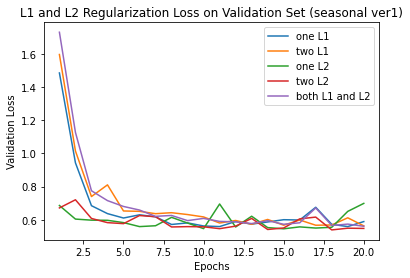

In [ ]:
# L1, L2 regularization effect on validation loss


import matplotlib.pyplot as plt


val_loss_values_seasonal_ver1_L1_1 = history_dict_seasonal_ver1_L1_1["val_loss"]
val_loss_values_seasonal_ver1_L1_2 = history_dict_seasonal_ver1_L1_2["val_loss"]
val_loss_values_seasonal_ver1_L2_1 = history_dict_seasonal_ver1_L2_1["val_loss"]
val_loss_values_seasonal_ver1_L2_2 = history_dict_seasonal_ver1_L2_2["val_loss"]
val_loss_values_seasonal_ver1_L12 = history_dict_seasonal_ver1_L12["val_loss"]


epochs = range(1, len(val_loss_values_seasonal_ver1_L1_1) + 1)


plt.plot(epochs, val_loss_values_seasonal_ver1_L1_1, label="one L1")
plt.plot(epochs, val_loss_values_seasonal_ver1_L1_2, label="two L1")
plt.plot(epochs, val_loss_values_seasonal_ver1_L2_1, label="one L2")
plt.plot(epochs, val_loss_values_seasonal_ver1_L2_2, label="two L2")
plt.plot(epochs, val_loss_values_seasonal_ver1_L12, label="both L1 and L2")


plt.title("L1 and L2 Regularization Loss on Validation Set (seasonal ver1)")
plt.xlabel("Epochs")
plt.ylabel("Validation Loss")
#plt.ylim([0.3,0.9])
plt.legend()
plt.show()

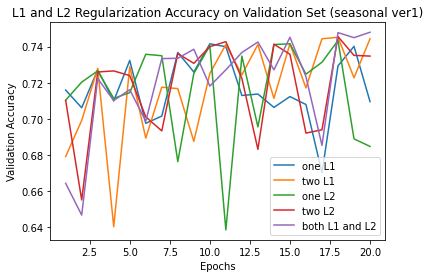

In [ ]:
# L1, L2 regularization effect on validation accuracy


import matplotlib.pyplot as plt


val_acc_values_seasonal_ver1_L1_1 = history_dict_seasonal_ver1_L1_1["val_accuracy"]
val_acc_values_seasonal_ver1_L1_2 = history_dict_seasonal_ver1_L1_2["val_accuracy"]
val_acc_values_seasonal_ver1_L2_1 = history_dict_seasonal_ver1_L2_1["val_accuracy"]
val_acc_values_seasonal_ver1_L2_2 = history_dict_seasonal_ver1_L2_2["val_accuracy"]
val_acc_values_seasonal_ver1_L12 = history_dict_seasonal_ver1_L12["val_accuracy"]


epochs = range(1, len(val_acc_values_seasonal_ver1_L1_1) + 1)


plt.plot(epochs, val_acc_values_seasonal_ver1_L1_1, label="one L1")
plt.plot(epochs, val_acc_values_seasonal_ver1_L1_2, label="two L1")
plt.plot(epochs, val_acc_values_seasonal_ver1_L2_1, label="one L2")
plt.plot(epochs, val_acc_values_seasonal_ver1_L2_2, label="two L2")
plt.plot(epochs, val_acc_values_seasonal_ver1_L12, label="both L1 and L2")


plt.title("L1 and L2 Regularization Accuracy on Validation Set (seasonal ver1)")
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
#plt.ylim([0.3,0.9])
plt.legend()
plt.show()

## **Hyperparameter effect**

**0.005**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_seasonal_ver1_one = keras.Sequential([
                                            layers.Dense(256, activation = "relu"),
                                            layers.Dense(256, activation = "relu"),
                                            layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l2(0.005)),
                                            layers.Dense(64, activation = "relu"),
                                            layers.Dense(64, activation = "relu"),
                                            layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.005)),
                                            layers.Dense(16, activation = "relu"),
                                            layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_seasonal_ver1_one.compile(optimizer = "rmsprop",
                                loss = "binary_crossentropy",
                                metrics = ["accuracy"])



# fitting model

history_seasonal_ver1_one = model_seasonal_ver1_one.fit(x_train_seasonal_ver1,
                                                        y_train_seasonal_ver1,
                                                        epochs = 20,
                                                        batch_size = 512,
                                                        validation_data = (x_valid_seasonal_ver1, y_valid_seasonal_ver1))


Epoch 1/20
40/40 [==============================] - 2s 19ms/step - loss: 1.2278 - accuracy: 0.6614 - val_loss: 0.9501 - val_accuracy: 0.7157
Epoch 2/20
40/40 [==============================] - 0s 11ms/step - loss: 0.8288 - accuracy: 0.7176 - val_loss: 0.7348 - val_accuracy: 0.7213
Epoch 3/20
40/40 [==============================] - 1s 13ms/step - loss: 0.6739 - accuracy: 0.7273 - val_loss: 0.6516 - val_accuracy: 0.7187
Epoch 4/20
40/40 [==============================] - 0s 11ms/step - loss: 0.6127 - accuracy: 0.7327 - val_loss: 0.6412 - val_accuracy: 0.6812
Epoch 5/20
40/40 [==============================] - 0s 8ms/step - loss: 0.5843 - accuracy: 0.7348 - val_loss: 0.6134 - val_accuracy: 0.7255
Epoch 6/20
40/40 [==============================] - 0s 6ms/step - loss: 0.5693 - accuracy: 0.7345 - val_loss: 0.5711 - val_accuracy: 0.7351
Epoch 7/20
40/40 [==============================] - 0s 7ms/step - loss: 0.5553 - accuracy: 0.7397 - val_loss: 0.5963 - val_accuracy: 0.7056
Epoch 8/20
40/40

**0.002**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_seasonal_ver1_two = keras.Sequential([
                                            layers.Dense(256, activation = "relu"),
                                            layers.Dense(256, activation = "relu"),
                                            layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l2(0.002)),
                                            layers.Dense(64, activation = "relu"),
                                            layers.Dense(64, activation = "relu"),
                                            layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.002)),
                                            layers.Dense(16, activation = "relu"),
                                            layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_seasonal_ver1_two.compile(optimizer = "rmsprop",
                                loss = "binary_crossentropy",
                                metrics = ["accuracy"])



# fitting model

history_seasonal_ver1_two = model_seasonal_ver1_two.fit(x_train_seasonal_ver1,
                                                        y_train_seasonal_ver1,
                                                        epochs = 20,
                                                        batch_size = 512,
                                                        validation_data = (x_valid_seasonal_ver1, y_valid_seasonal_ver1))


Epoch 1/20
40/40 [==============================] - 2s 11ms/step - loss: 0.8626 - accuracy: 0.6584 - val_loss: 0.7518 - val_accuracy: 0.6914
Epoch 2/20
40/40 [==============================] - 0s 7ms/step - loss: 0.6849 - accuracy: 0.7200 - val_loss: 0.6524 - val_accuracy: 0.7038
Epoch 3/20
40/40 [==============================] - 0s 6ms/step - loss: 0.6206 - accuracy: 0.7232 - val_loss: 0.6148 - val_accuracy: 0.7205
Epoch 4/20
40/40 [==============================] - 0s 7ms/step - loss: 0.5877 - accuracy: 0.7318 - val_loss: 0.6168 - val_accuracy: 0.7016
Epoch 5/20
40/40 [==============================] - 0s 6ms/step - loss: 0.5716 - accuracy: 0.7335 - val_loss: 0.5882 - val_accuracy: 0.7189
Epoch 6/20
40/40 [==============================] - 0s 5ms/step - loss: 0.5599 - accuracy: 0.7362 - val_loss: 0.5668 - val_accuracy: 0.7295
Epoch 7/20
40/40 [==============================] - 0s 5ms/step - loss: 0.5514 - accuracy: 0.7383 - val_loss: 0.5590 - val_accuracy: 0.7351
Epoch 8/20
40/40 [=

**0.001(original)**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_seasonal_ver1_three = keras.Sequential([
                                              layers.Dense(256, activation = "relu"),
                                              layers.Dense(256, activation = "relu"),
                                              layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l2(0.001)),
                                              layers.Dense(64, activation = "relu"),
                                              layers.Dense(64, activation = "relu"),
                                              layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.001)),
                                              layers.Dense(16, activation = "relu"),
                                              layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_seasonal_ver1_three.compile(optimizer = "rmsprop",
                                  loss = "binary_crossentropy",
                                  metrics = ["accuracy"])



# fitting model

history_seasonal_ver1_three = model_seasonal_ver1_three.fit(x_train_seasonal_ver1,
                                                            y_train_seasonal_ver1,
                                                            epochs = 20,
                                                            batch_size = 512,
                                                            validation_data = (x_valid_seasonal_ver1, y_valid_seasonal_ver1))


Epoch 1/20
40/40 [==============================] - 2s 13ms/step - loss: 0.7587 - accuracy: 0.6591 - val_loss: 0.6892 - val_accuracy: 0.7072
Epoch 2/20
40/40 [==============================] - 0s 6ms/step - loss: 0.6447 - accuracy: 0.7175 - val_loss: 0.7378 - val_accuracy: 0.6308
Epoch 3/20
40/40 [==============================] - 0s 8ms/step - loss: 0.6090 - accuracy: 0.7229 - val_loss: 0.6365 - val_accuracy: 0.7103
Epoch 4/20
40/40 [==============================] - 0s 11ms/step - loss: 0.5857 - accuracy: 0.7287 - val_loss: 0.5927 - val_accuracy: 0.7163
Epoch 5/20
40/40 [==============================] - 0s 10ms/step - loss: 0.5704 - accuracy: 0.7321 - val_loss: 0.6112 - val_accuracy: 0.6934
Epoch 6/20
40/40 [==============================] - 0s 10ms/step - loss: 0.5582 - accuracy: 0.7357 - val_loss: 0.6396 - val_accuracy: 0.6664
Epoch 7/20
40/40 [==============================] - 0s 9ms/step - loss: 0.5527 - accuracy: 0.7387 - val_loss: 0.6312 - val_accuracy: 0.6886
Epoch 8/20
40/40

**0.0005**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_seasonal_ver1_four = keras.Sequential([
                                            layers.Dense(256, activation = "relu"),
                                            layers.Dense(256, activation = "relu"),
                                            layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l2(0.0005)),
                                            layers.Dense(64, activation = "relu"),
                                            layers.Dense(64, activation = "relu"),
                                            layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.0005)),
                                            layers.Dense(16, activation = "relu"),
                                            layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_seasonal_ver1_four.compile(optimizer = "rmsprop",
                                 loss = "binary_crossentropy",
                                 metrics = ["accuracy"])



# fitting model

history_seasonal_ver1_four = model_seasonal_ver1_four.fit(x_train_seasonal_ver1,
                                                          y_train_seasonal_ver1,
                                                          epochs = 20,
                                                          batch_size = 512,
                                                          validation_data = (x_valid_seasonal_ver1, y_valid_seasonal_ver1))


Epoch 1/20
40/40 [==============================] - 2s 15ms/step - loss: 0.6803 - accuracy: 0.6793 - val_loss: 0.6258 - val_accuracy: 0.7135
Epoch 2/20
40/40 [==============================] - 0s 8ms/step - loss: 0.6049 - accuracy: 0.7175 - val_loss: 0.6014 - val_accuracy: 0.7219
Epoch 3/20
40/40 [==============================] - 0s 7ms/step - loss: 0.5833 - accuracy: 0.7274 - val_loss: 0.5831 - val_accuracy: 0.7297
Epoch 4/20
40/40 [==============================] - 0s 9ms/step - loss: 0.5698 - accuracy: 0.7319 - val_loss: 0.5995 - val_accuracy: 0.7223
Epoch 5/20
40/40 [==============================] - 0s 8ms/step - loss: 0.5600 - accuracy: 0.7381 - val_loss: 0.6474 - val_accuracy: 0.6486
Epoch 6/20
40/40 [==============================] - 0s 8ms/step - loss: 0.5547 - accuracy: 0.7341 - val_loss: 0.5653 - val_accuracy: 0.7303
Epoch 7/20
40/40 [==============================] - 0s 8ms/step - loss: 0.5452 - accuracy: 0.7434 - val_loss: 0.5626 - val_accuracy: 0.7329
Epoch 8/20
40/40 [=

**0.0001**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_seasonal_ver1_five = keras.Sequential([
                                            layers.Dense(256, activation = "relu"),
                                            layers.Dense(256, activation = "relu"),
                                            layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l2(0.0001)),
                                            layers.Dense(64, activation = "relu"),
                                            layers.Dense(64, activation = "relu"),
                                            layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.0001)),
                                            layers.Dense(16, activation = "relu"),
                                            layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_seasonal_ver1_five.compile(optimizer = "rmsprop",
                                 loss = "binary_crossentropy",
                                 metrics = ["accuracy"])



# fitting model

history_seasonal_ver1_five = model_seasonal_ver1_five.fit(x_train_seasonal_ver1,
                                                          y_train_seasonal_ver1,
                                                          epochs = 20,
                                                          batch_size = 512,
                                                          validation_data = (x_valid_seasonal_ver1, y_valid_seasonal_ver1))


Epoch 1/20
40/40 [==============================] - 2s 11ms/step - loss: 0.6246 - accuracy: 0.6733 - val_loss: 0.5783 - val_accuracy: 0.7151
Epoch 2/20
40/40 [==============================] - 0s 5ms/step - loss: 0.5702 - accuracy: 0.7213 - val_loss: 0.5709 - val_accuracy: 0.7203
Epoch 3/20
40/40 [==============================] - 0s 5ms/step - loss: 0.5562 - accuracy: 0.7272 - val_loss: 0.5674 - val_accuracy: 0.7249
Epoch 4/20
40/40 [==============================] - 0s 5ms/step - loss: 0.5506 - accuracy: 0.7309 - val_loss: 0.5591 - val_accuracy: 0.7309
Epoch 5/20
40/40 [==============================] - 0s 5ms/step - loss: 0.5453 - accuracy: 0.7371 - val_loss: 0.5895 - val_accuracy: 0.7241
Epoch 6/20
40/40 [==============================] - 0s 6ms/step - loss: 0.5426 - accuracy: 0.7360 - val_loss: 0.5483 - val_accuracy: 0.7367
Epoch 7/20
40/40 [==============================] - 0s 6ms/step - loss: 0.5347 - accuracy: 0.7418 - val_loss: 0.5484 - val_accuracy: 0.7349
Epoch 8/20
40/40 [=

### visualize

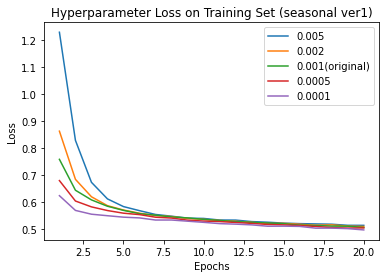

In [ ]:
# Hyperparameter effect on training loss


import matplotlib.pyplot as plt

history_dict_seasonal_ver1_one = history_seasonal_ver1_one.history
history_dict_seasonal_ver1_two = history_seasonal_ver1_two.history
history_dict_seasonal_ver1_three = history_seasonal_ver1_three.history
history_dict_seasonal_ver1_four = history_seasonal_ver1_four.history
history_dict_seasonal_ver1_five = history_seasonal_ver1_five.history

loss_values_seasonal_ver1_one = history_dict_seasonal_ver1_one["loss"]
loss_values_seasonal_ver1_two = history_dict_seasonal_ver1_two["loss"]
loss_values_seasonal_ver1_three = history_dict_seasonal_ver1_three["loss"]
loss_values_seasonal_ver1_four = history_dict_seasonal_ver1_four["loss"]
loss_values_seasonal_ver1_five = history_dict_seasonal_ver1_five["loss"]


epochs = range(1, len(loss_values_seasonal_ver1_one) + 1)


plt.plot(epochs, loss_values_seasonal_ver1_one, label="0.005")
plt.plot(epochs, loss_values_seasonal_ver1_two, label="0.002")
plt.plot(epochs, loss_values_seasonal_ver1_three, label="0.001(original)")
plt.plot(epochs, loss_values_seasonal_ver1_four, label="0.0005")
plt.plot(epochs, loss_values_seasonal_ver1_five, label="0.0001")


plt.title("Hyperparameter Loss on Training Set (seasonal ver1)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
#plt.ylim([0.3,0.6])
plt.legend()
plt.show()

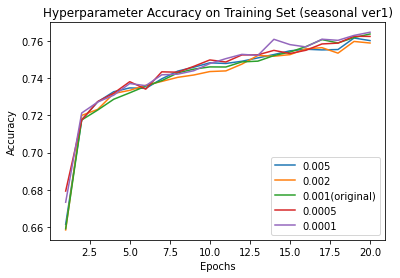

In [ ]:
# Hyperparameter effect on training accuracy


import matplotlib.pyplot as plt


acc_values_seasonal_ver1_one = history_dict_seasonal_ver1_one["accuracy"]
acc_values_seasonal_ver1_two = history_dict_seasonal_ver1_two["accuracy"]
acc_values_seasonal_ver1_three = history_dict_seasonal_ver1_three["accuracy"]
acc_values_seasonal_ver1_four = history_dict_seasonal_ver1_four["accuracy"]
acc_values_seasonal_ver1_five = history_dict_seasonal_ver1_five["accuracy"]


epochs = range(1, len(acc_values_seasonal_ver1_one) + 1)


plt.plot(epochs, acc_values_seasonal_ver1_one, label="0.005")
plt.plot(epochs, acc_values_seasonal_ver1_two, label="0.002")
plt.plot(epochs, acc_values_seasonal_ver1_three, label="0.001(original)")
plt.plot(epochs, acc_values_seasonal_ver1_four, label="0.0005")
plt.plot(epochs, acc_values_seasonal_ver1_five, label="0.0001")


plt.title("Hyperparameter Accuracy on Training Set (seasonal ver1)")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
#plt.ylim([0.7, 0.85])
plt.legend()
plt.show()

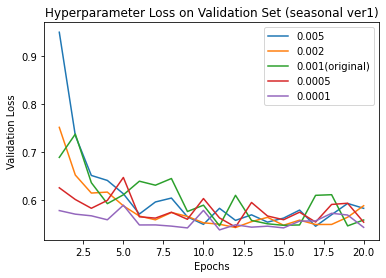

In [ ]:
# Hyperparameter effect on validation loss


import matplotlib.pyplot as plt


val_loss_values_seasonal_ver1_one = history_dict_seasonal_ver1_one["val_loss"]
val_loss_values_seasonal_ver1_two = history_dict_seasonal_ver1_two["val_loss"]
val_loss_values_seasonal_ver1_three = history_dict_seasonal_ver1_three["val_loss"]
val_loss_values_seasonal_ver1_four = history_dict_seasonal_ver1_four["val_loss"]
val_loss_values_seasonal_ver1_five = history_dict_seasonal_ver1_five["val_loss"]


epochs = range(1, len(val_loss_values_seasonal_ver1_one) + 1)


plt.plot(epochs, val_loss_values_seasonal_ver1_one, label="0.005")
plt.plot(epochs, val_loss_values_seasonal_ver1_two, label="0.002")
plt.plot(epochs, val_loss_values_seasonal_ver1_three, label="0.001(original)")
plt.plot(epochs, val_loss_values_seasonal_ver1_four, label="0.0005")
plt.plot(epochs, val_loss_values_seasonal_ver1_five, label="0.0001")


plt.title("Hyperparameter Loss on Validation Set (seasonal ver1)")
plt.xlabel("Epochs")
plt.ylabel("Validation Loss")
#plt.ylim([0.4,0.6])
plt.legend()
plt.show()

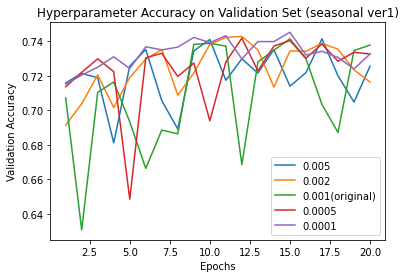

In [ ]:
# Hyperparameter effect on validation accuracy

import matplotlib.pyplot as plt


val_acc_values_seasonal_ver1_one = history_dict_seasonal_ver1_one["val_accuracy"]
val_acc_values_seasonal_ver1_two = history_dict_seasonal_ver1_two["val_accuracy"]
val_acc_values_seasonal_ver1_three = history_dict_seasonal_ver1_three["val_accuracy"]
val_acc_values_seasonal_ver1_four = history_dict_seasonal_ver1_four["val_accuracy"]
val_acc_values_seasonal_ver1_five = history_dict_seasonal_ver1_five["val_accuracy"]


epochs = range(1, len(val_acc_values_seasonal_ver1_one) + 1)


plt.plot(epochs, val_acc_values_seasonal_ver1_one, label="0.005")
plt.plot(epochs, val_acc_values_seasonal_ver1_two, label="0.002")
plt.plot(epochs, val_acc_values_seasonal_ver1_three, label="0.001(original)")
plt.plot(epochs, val_acc_values_seasonal_ver1_four, label="0.0005")
plt.plot(epochs, val_acc_values_seasonal_ver1_five, label="0.0001")


plt.title("Hyperparameter Accuracy on Validation Set (seasonal ver1)")
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
plt.legend()
plt.show()

## **Dropout effect**

**# dropout = 1**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_seasonal_ver1_onedr = keras.Sequential([
                                              layers.Dense(256, activation = "relu"),
                                              layers.Dense(256, activation = "relu"),
                                              layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l2(0.001)),
                                              layers.Dense(64, activation = "relu"),
                                              layers.Dropout(0.5),
                                              layers.Dense(64, activation = "relu"),
                                              layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.001)),
                                              layers.Dense(16, activation = "relu"),
                                              layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_seasonal_ver1_onedr.compile(optimizer = "rmsprop",
                                  loss = "binary_crossentropy",
                                  metrics = ["accuracy"])



# fitting model

history_seasonal_ver1_onedr = model_seasonal_ver1_onedr.fit(x_train_seasonal_ver1,
                                                            y_train_seasonal_ver1,
                                                            epochs = 20,
                                                            batch_size = 512,
                                                            validation_data = (x_valid_seasonal_ver1, y_valid_seasonal_ver1))


Epoch 1/20
40/40 [==============================] - 2s 15ms/step - loss: 0.7554 - accuracy: 0.6576 - val_loss: 0.6784 - val_accuracy: 0.7147
Epoch 2/20
40/40 [==============================] - 0s 9ms/step - loss: 0.6466 - accuracy: 0.7190 - val_loss: 0.6508 - val_accuracy: 0.7177
Epoch 3/20
40/40 [==============================] - 0s 9ms/step - loss: 0.6137 - accuracy: 0.7242 - val_loss: 0.6070 - val_accuracy: 0.7219
Epoch 4/20
40/40 [==============================] - 0s 10ms/step - loss: 0.5910 - accuracy: 0.7270 - val_loss: 0.5935 - val_accuracy: 0.7275
Epoch 5/20
40/40 [==============================] - 0s 10ms/step - loss: 0.5758 - accuracy: 0.7339 - val_loss: 0.6860 - val_accuracy: 0.6766
Epoch 6/20
40/40 [==============================] - 0s 9ms/step - loss: 0.5676 - accuracy: 0.7340 - val_loss: 0.5772 - val_accuracy: 0.7319
Epoch 7/20
40/40 [==============================] - 0s 6ms/step - loss: 0.5542 - accuracy: 0.7409 - val_loss: 0.5671 - val_accuracy: 0.7335
Epoch 8/20
40/40 

**# dropout = 2**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_seasonal_ver1_twodr = keras.Sequential([
                                              layers.Dense(256, activation = "relu"),
                                              layers.Dense(256, activation = "relu"),
                                              layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l2(0.001)),
                                              layers.Dense(64, activation = "relu"),
                                              layers.Dropout(0.5),
                                              layers.Dense(64, activation = "relu"),
                                              layers.Dropout(0.5),
                                              layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.001)),
                                              layers.Dense(16, activation = "relu"),
                                              layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_seasonal_ver1_twodr.compile(optimizer = "rmsprop",
                                  loss = "binary_crossentropy",
                                  metrics = ["accuracy"])



# fitting model

history_seasonal_ver1_twodr = model_seasonal_ver1_twodr.fit(x_train_seasonal_ver1,
                                                            y_train_seasonal_ver1,
                                                            epochs = 20,
                                                            batch_size = 512,
                                                            validation_data = (x_valid_seasonal_ver1, y_valid_seasonal_ver1))


Epoch 1/20
40/40 [==============================] - 2s 14ms/step - loss: 0.7714 - accuracy: 0.6525 - val_loss: 0.7121 - val_accuracy: 0.6652
Epoch 2/20
40/40 [==============================] - 0s 7ms/step - loss: 0.6616 - accuracy: 0.7155 - val_loss: 0.6508 - val_accuracy: 0.7024
Epoch 3/20
40/40 [==============================] - 0s 6ms/step - loss: 0.6231 - accuracy: 0.7215 - val_loss: 0.6797 - val_accuracy: 0.6532
Epoch 4/20
40/40 [==============================] - 0s 9ms/step - loss: 0.6058 - accuracy: 0.7280 - val_loss: 0.6398 - val_accuracy: 0.6628
Epoch 5/20
40/40 [==============================] - 0s 9ms/step - loss: 0.5848 - accuracy: 0.7329 - val_loss: 0.5941 - val_accuracy: 0.7303
Epoch 6/20
40/40 [==============================] - 0s 10ms/step - loss: 0.5771 - accuracy: 0.7310 - val_loss: 0.5824 - val_accuracy: 0.7345
Epoch 7/20
40/40 [==============================] - 0s 9ms/step - loss: 0.5652 - accuracy: 0.7358 - val_loss: 0.5772 - val_accuracy: 0.7279
Epoch 8/20
40/40 [

**# dropout = 3**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_seasonal_ver1_threedr = keras.Sequential([
                                                layers.Dense(256, activation = "relu"),
                                                layers.Dense(256, activation = "relu"),
                                                layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l2(0.001)),
                                                layers.Dense(64, activation = "relu"),
                                                layers.Dropout(0.5),
                                                layers.Dense(64, activation = "relu"),
                                                layers.Dropout(0.5),
                                                layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.001)),
                                                layers.Dropout(0.5),
                                                layers.Dense(16, activation = "relu"),
                                                layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_seasonal_ver1_threedr.compile(optimizer = "rmsprop",
                                    loss = "binary_crossentropy",
                                    metrics = ["accuracy"])



# fitting model

history_seasonal_ver1_threedr = model_seasonal_ver1_threedr.fit(x_train_seasonal_ver1,
                                                                y_train_seasonal_ver1,
                                                                epochs = 20,
                                                                batch_size = 512,
                                                                validation_data = (x_valid_seasonal_ver1, y_valid_seasonal_ver1))


Epoch 1/20
40/40 [==============================] - 3s 17ms/step - loss: 0.7976 - accuracy: 0.6008 - val_loss: 0.7031 - val_accuracy: 0.6928
Epoch 2/20
40/40 [==============================] - 0s 9ms/step - loss: 0.6926 - accuracy: 0.6786 - val_loss: 0.6653 - val_accuracy: 0.6680
Epoch 3/20
40/40 [==============================] - 0s 8ms/step - loss: 0.6427 - accuracy: 0.6995 - val_loss: 0.6216 - val_accuracy: 0.7257
Epoch 4/20
40/40 [==============================] - 0s 9ms/step - loss: 0.6248 - accuracy: 0.7071 - val_loss: 0.5874 - val_accuracy: 0.7265
Epoch 5/20
40/40 [==============================] - 0s 9ms/step - loss: 0.6051 - accuracy: 0.7199 - val_loss: 0.6193 - val_accuracy: 0.6766
Epoch 6/20
40/40 [==============================] - 0s 8ms/step - loss: 0.5961 - accuracy: 0.7282 - val_loss: 0.5902 - val_accuracy: 0.7255
Epoch 7/20
40/40 [==============================] - 0s 9ms/step - loss: 0.5834 - accuracy: 0.7337 - val_loss: 0.5754 - val_accuracy: 0.7341
Epoch 8/20
40/40 [=

### visualize

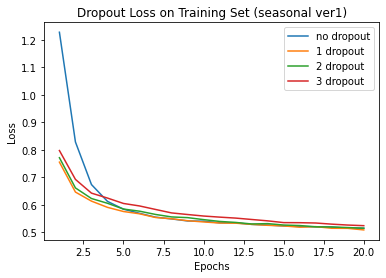

In [ ]:
# Dropout effect on training loss


import matplotlib.pyplot as plt


history_dict_seasonal_ver1_onedr = history_seasonal_ver1_onedr.history
history_dict_seasonal_ver1_twodr = history_seasonal_ver1_twodr.history
history_dict_seasonal_ver1_threedr = history_seasonal_ver1_threedr.history


loss_values_seasonal_ver1_onedr = history_dict_seasonal_ver1_onedr["loss"]
loss_values_seasonal_ver1_twodr = history_dict_seasonal_ver1_twodr["loss"]
loss_values_seasonal_ver1_threedr = history_dict_seasonal_ver1_threedr["loss"]

epochs = range(1, len(loss_values_seasonal_ver1_onedr) + 1)


plt.plot(epochs, loss_values_seasonal_ver1_one, label="no dropout")
plt.plot(epochs, loss_values_seasonal_ver1_onedr, label="1 dropout")
plt.plot(epochs, loss_values_seasonal_ver1_twodr, label="2 dropout")
plt.plot(epochs, loss_values_seasonal_ver1_threedr, label="3 dropout")

plt.title("Dropout Loss on Training Set (seasonal ver1)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
#plt.ylim([0.4,0.6])
plt.legend()
plt.show()

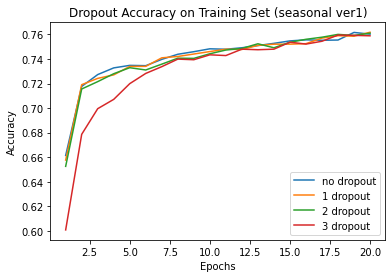

In [ ]:
# Dropout effect on training accuracy


import matplotlib.pyplot as plt


acc_values_seasonal_ver1_onedr = history_dict_seasonal_ver1_onedr["accuracy"]
acc_values_seasonal_ver1_twodr = history_dict_seasonal_ver1_twodr["accuracy"]
acc_values_seasonal_ver1_threedr = history_dict_seasonal_ver1_threedr["accuracy"]

epochs = range(1, len(acc_values_seasonal_ver1_onedr) + 1)


plt.plot(epochs, acc_values_seasonal_ver1_one, label="no dropout")
plt.plot(epochs, acc_values_seasonal_ver1_onedr, label="1 dropout")
plt.plot(epochs, acc_values_seasonal_ver1_twodr, label="2 dropout")
plt.plot(epochs, acc_values_seasonal_ver1_threedr, label="3 dropout")

plt.title("Dropout Accuracy on Training Set (seasonal ver1)")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
#plt.ylim([0.4,0.6])
plt.legend()
plt.show()

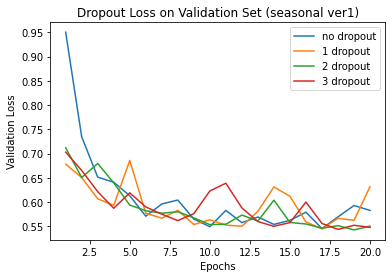

In [ ]:
# Dropout effect on validation loss


import matplotlib.pyplot as plt



val_loss_values_seasonal_ver1_onedr = history_dict_seasonal_ver1_onedr["val_loss"]
val_loss_values_seasonal_ver1_twodr = history_dict_seasonal_ver1_twodr["val_loss"]
val_loss_values_seasonal_ver1_threedr = history_dict_seasonal_ver1_threedr["val_loss"]

epochs = range(1, len(val_loss_values_seasonal_ver1_onedr) + 1)


plt.plot(epochs, val_loss_values_seasonal_ver1_one, label="no dropout")
plt.plot(epochs, val_loss_values_seasonal_ver1_onedr, label="1 dropout")
plt.plot(epochs, val_loss_values_seasonal_ver1_twodr, label="2 dropout")
plt.plot(epochs, val_loss_values_seasonal_ver1_threedr, label="3 dropout")

plt.title("Dropout Loss on Validation Set (seasonal ver1)")
plt.xlabel("Epochs")
plt.ylabel("Validation Loss")
#plt.ylim([0.4,0.6])
plt.legend()
plt.show()

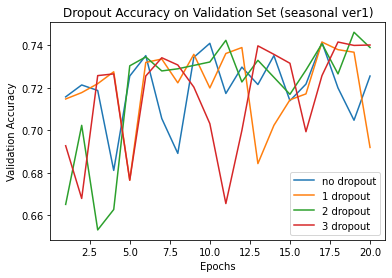

In [ ]:
# Dropout effect on validation accuracy


import matplotlib.pyplot as plt


val_acc_values_seasonal_ver1_onedr = history_dict_seasonal_ver1_onedr["val_accuracy"]
val_acc_values_seasonal_ver1_twodr = history_dict_seasonal_ver1_twodr["val_accuracy"]
val_acc_values_seasonal_ver1_threedr = history_dict_seasonal_ver1_threedr["val_accuracy"]

epochs = range(1, len(val_acc_values_seasonal_ver1_onedr) + 1)


plt.plot(epochs, val_acc_values_seasonal_ver1_one, label="no dropout")
plt.plot(epochs, val_acc_values_seasonal_ver1_onedr, label="1 dropout")
plt.plot(epochs, val_acc_values_seasonal_ver1_twodr, label="2 dropout")
plt.plot(epochs, val_acc_values_seasonal_ver1_threedr, label="3 dropout")

plt.title("Dropout Accuracy on Validation Set (seasonal ver1)")
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
#plt.ylim([0.4,0.6])
plt.legend()
plt.show()

# Seasonal Model.ver2

In [31]:
train_seasonal_ver2 = pd.read_csv('/content/drive/MyDrive/22-1_DLAI_Team_Project/train_seasonal_ver2.csv')

In [32]:
print(train_seasonal_ver2.shape)
train_seasonal_ver2.head()

(25026, 36)


,respondent_id,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,chronic_med_condition,child_under_6_months,...,region_3,region_4,region_5,region_6,region_7,region_8,region_9,msa_1,msa_2,msa_3
0,0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0,0,0,0,0,1,0,1,0,0
1,1,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
2,2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,0,0,0,0,0,1,0,1,0
3,3,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0,0,1,0,0,0,0,0,0,1
4,4,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0,0,0,0,0,0,1,0,1,0


In [33]:
train_seasonal_ver2.columns

Index(['respondent_id', 'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'chronic_med_condition',
       'child_under_6_months', 'health_worker', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group', 'sex',
       'household_adults', 'household_children', 'seasonal_vaccine', 'race_1',
       'race_2', 'race_3', 'race_4', 'region_0', 'region_1', 'region_2',
       'region_3', 'region_4', 'region_5', 'region_6', 'region_7', 'region_8',
       'region_9', 'msa_1', 'msa_2', 'msa_3'],
      dtype='object')

In [34]:
## split feature and target, train set and validation set

from sklearn.model_selection import train_test_split

feature = train_seasonal_ver2.iloc[:,1:-1]
target = train_seasonal_ver2['seasonal_vaccine']

x_train_seasonal_ver2, x_valid_seasonal_ver2, y_train_seasonal_ver2, y_valid_seasonal_ver2 = train_test_split(feature, target, test_size=0.2,shuffle=True,
                                                                                                              stratify=target,  random_state=1234) 

### Layer effect

**layer 3개**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_seasonal_ver2_s = keras.Sequential([
                                      layers.Dense(16, activation = "relu"),
                                      layers.Dense(16, activation = "relu"),
                                      layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_seasonal_ver2_s.compile(optimizer = "rmsprop",
                          loss = "binary_crossentropy",
                          metrics = ["accuracy"])



# fitting model

history_seasonal_ver2_s = model_seasonal_ver2_s.fit(x_train_seasonal_ver2,
                                                    y_train_seasonal_ver2,
                                                    epochs = 20,
                                                    batch_size = 512,
                                                    validation_data = (x_valid_seasonal_ver2, y_valid_seasonal_ver2))


Epoch 1/20
40/40 [==============================] - 1s 7ms/step - loss: 0.6440 - accuracy: 0.6306 - val_loss: 0.5799 - val_accuracy: 0.7074
Epoch 2/20
40/40 [==============================] - 0s 4ms/step - loss: 0.5299 - accuracy: 0.7575 - val_loss: 0.4872 - val_accuracy: 0.7839
Epoch 3/20
40/40 [==============================] - 0s 4ms/step - loss: 0.4307 - accuracy: 0.8401 - val_loss: 0.3824 - val_accuracy: 0.8815
Epoch 4/20
40/40 [==============================] - 0s 4ms/step - loss: 0.3305 - accuracy: 0.9076 - val_loss: 0.2820 - val_accuracy: 0.9379
Epoch 5/20
40/40 [==============================] - 0s 4ms/step - loss: 0.2378 - accuracy: 0.9603 - val_loss: 0.2024 - val_accuracy: 0.9732
Epoch 6/20
40/40 [==============================] - 0s 4ms/step - loss: 0.1602 - accuracy: 0.9889 - val_loss: 0.1309 - val_accuracy: 0.9944
Epoch 7/20
40/40 [==============================] - 0s 5ms/step - loss: 0.0946 - accuracy: 0.9983 - val_loss: 0.0750 - val_accuracy: 0.9994
Epoch 8/20
40/40 [==

**layer 8개**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_seasonal_ver2_b = keras.Sequential([
                                      layers.Dense(256, activation = "relu"),
                                      layers.Dense(256, activation = "relu"),
                                      layers.Dense(128, activation = "relu"),
                                      layers.Dense(64, activation = "relu"),
                                      layers.Dense(64, activation = "relu"),
                                      layers.Dense(16, activation = "relu"),
                                      layers.Dense(16, activation = "relu"),
                                      layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_seasonal_ver2_b.compile(optimizer = "rmsprop",
                          loss = "binary_crossentropy",
                          metrics = ["accuracy"])



# fitting model

history_seasonal_ver2_b = model_seasonal_ver2_b.fit(x_train_seasonal_ver2,
                                            y_train_seasonal_ver2,
                                            epochs = 20,
                                            batch_size = 512,
                                            validation_data = (x_valid_seasonal_ver2, y_valid_seasonal_ver2))


Epoch 1/20
40/40 [==============================] - 2s 10ms/step - loss: 0.5083 - accuracy: 0.7410 - val_loss: 0.1169 - val_accuracy: 0.9896
Epoch 2/20
40/40 [==============================] - 0s 7ms/step - loss: 0.0177 - accuracy: 0.9990 - val_loss: 4.4739e-04 - val_accuracy: 1.0000
Epoch 3/20
40/40 [==============================] - 0s 6ms/step - loss: 9.7219e-05 - accuracy: 1.0000 - val_loss: 1.6540e-05 - val_accuracy: 1.0000
Epoch 4/20
40/40 [==============================] - 0s 5ms/step - loss: 5.5655e-06 - accuracy: 1.0000 - val_loss: 1.4227e-06 - val_accuracy: 1.0000
Epoch 5/20
40/40 [==============================] - 0s 5ms/step - loss: 5.2474e-07 - accuracy: 1.0000 - val_loss: 1.8092e-07 - val_accuracy: 1.0000
Epoch 6/20
40/40 [==============================] - 0s 5ms/step - loss: 7.2069e-08 - accuracy: 1.0000 - val_loss: 4.1833e-08 - val_accuracy: 1.0000
Epoch 7/20
40/40 [==============================] - 0s 5ms/step - loss: 1.4521e-08 - accuracy: 1.0000 - val_loss: 9.2417e-0

#### visualize

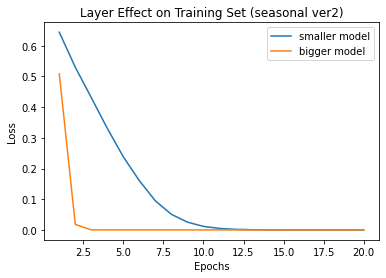

In [ ]:
# Layer effect on training loss


import matplotlib.pyplot as plt

history_dict_seasonal_ver2_s = history_seasonal_ver2_s.history
history_dict_seasonal_ver2_b = history_seasonal_ver2_b.history

loss_values_seasonal_ver2_s = history_dict_seasonal_ver2_s["loss"]
loss_values_seasonal_ver2_b = history_dict_seasonal_ver2_b["loss"]

epochs = range(1, len(loss_values_seasonal_ver2_s) + 1)


plt.plot(epochs, loss_values_seasonal_ver2_s, label="smaller model")
plt.plot(epochs, loss_values_seasonal_ver2_b, label="bigger model")


plt.title("Layer Effect on Training Set (seasonal ver2)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
#plt.ylim([0.3,0.9])
plt.legend()
plt.show()

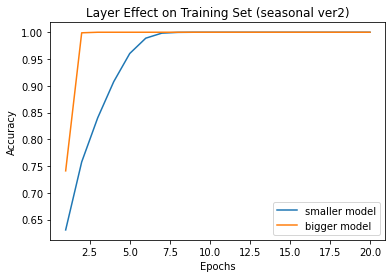

In [ ]:
# Layer effect on training accuracy


import matplotlib.pyplot as plt



acc_values_seasonal_ver2_s = history_dict_seasonal_ver2_s["accuracy"]
acc_values_seasonal_ver2_b = history_dict_seasonal_ver2_b["accuracy"]

epochs = range(1, len(acc_values_seasonal_ver2_s) + 1)


plt.plot(epochs, acc_values_seasonal_ver2_s, label="smaller model")
plt.plot(epochs, acc_values_seasonal_ver2_b, label="bigger model")


plt.title("Layer Effect on Training Set (seasonal ver2)")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
#plt.ylim([0.3,0.9])
plt.legend()
plt.show()

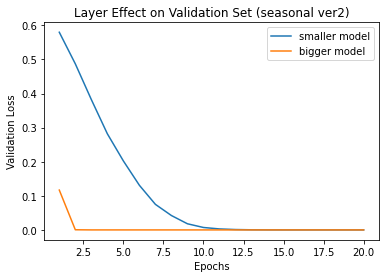

In [ ]:
# Layer effect on validation loss


import matplotlib.pyplot as plt



val_loss_values_seasonal_ver2_s = history_dict_seasonal_ver2_s["val_loss"]
val_loss_values_seasonal_ver2_b = history_dict_seasonal_ver2_b["val_loss"]

epochs = range(1, len(val_loss_values_seasonal_ver2_s) + 1)


plt.plot(epochs, val_loss_values_seasonal_ver2_s, label="smaller model")
plt.plot(epochs, val_loss_values_seasonal_ver2_b, label="bigger model")


plt.title("Layer Effect on Validation Set (seasonal ver2)")
plt.xlabel("Epochs")
plt.ylabel("Validation Loss")
#plt.ylim([0.3,0.9])
plt.legend()
plt.show()

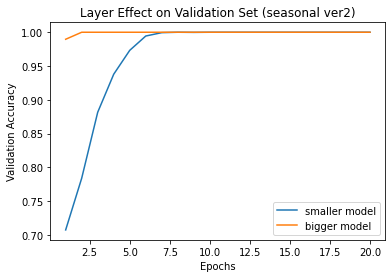

In [ ]:
# Layer effect on validation accuracy


import matplotlib.pyplot as plt



val_acc_values_seasonal_ver2_s = history_dict_seasonal_ver2_s["val_accuracy"]
val_acc_values_seasonal_ver2_b = history_dict_seasonal_ver2_b["val_accuracy"]

epochs = range(1, len(val_acc_values_seasonal_ver2_s) + 1)


plt.plot(epochs, val_acc_values_seasonal_ver2_s, label="smaller model")
plt.plot(epochs, val_acc_values_seasonal_ver2_b, label="bigger model")


plt.title("Layer Effect on Validation Set (seasonal ver2)")
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
#plt.ylim([0.3,0.9])
plt.legend()
plt.show()

## **L1, L2 regularization effect**

**layer 3개 + L1 regularization 1개**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_seasonal_ver2_L1_1 = keras.Sequential([
                                      layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l1(0.001)),
                                      layers.Dense(16, activation = "relu"),
                                      layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_seasonal_ver2_L1_1.compile(optimizer = "rmsprop",
                                loss = "binary_crossentropy",
                                metrics = ["accuracy"])



# fitting model

history_seasonal_ver2_L1_1 = model_seasonal_ver2_L1_1.fit(x_train_seasonal_ver2,
                                                          y_train_seasonal_ver2,
                                                          epochs = 20,
                                                          batch_size = 512,
                                                          validation_data = (x_valid_seasonal_ver2, y_valid_seasonal_ver2))


Epoch 1/20
40/40 [==============================] - 1s 8ms/step - loss: 0.8155 - accuracy: 0.5548 - val_loss: 0.7140 - val_accuracy: 0.6350
Epoch 2/20
40/40 [==============================] - 0s 5ms/step - loss: 0.6471 - accuracy: 0.7206 - val_loss: 0.5842 - val_accuracy: 0.7841
Epoch 3/20
40/40 [==============================] - 0s 5ms/step - loss: 0.5202 - accuracy: 0.8183 - val_loss: 0.4614 - val_accuracy: 0.8590
Epoch 4/20
40/40 [==============================] - 0s 4ms/step - loss: 0.3931 - accuracy: 0.8983 - val_loss: 0.3380 - val_accuracy: 0.9207
Epoch 5/20
40/40 [==============================] - 0s 4ms/step - loss: 0.2730 - accuracy: 0.9566 - val_loss: 0.2287 - val_accuracy: 0.9738
Epoch 6/20
40/40 [==============================] - 0s 4ms/step - loss: 0.1736 - accuracy: 0.9926 - val_loss: 0.1362 - val_accuracy: 0.9980
Epoch 7/20
40/40 [==============================] - 0s 5ms/step - loss: 0.1076 - accuracy: 0.9995 - val_loss: 0.0838 - val_accuracy: 0.9996
Epoch 8/20
40/40 [==

**layer 3개 + L1 regularization 2개**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers



# building model

model_seasonal_ver2_L1_2 = keras.Sequential([
                                      layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l1(0.001)),
                                      layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l1(0.001)),
                                      layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_seasonal_ver2_L1_2.compile(optimizer = "rmsprop",
                                loss = "binary_crossentropy",
                                metrics = ["accuracy"])



# fitting model

history_seasonal_ver2_L1_2 = model_seasonal_ver2_L1_2.fit(x_train_seasonal_ver2,
                                                          y_train_seasonal_ver2,
                                                          epochs = 20,
                                                          batch_size = 512,
                                                          validation_data = (x_valid_seasonal_ver2, y_valid_seasonal_ver2))


Epoch 1/20
40/40 [==============================] - 1s 7ms/step - loss: 0.7595 - accuracy: 0.6580 - val_loss: 0.7001 - val_accuracy: 0.7465
Epoch 2/20
40/40 [==============================] - 0s 4ms/step - loss: 0.6356 - accuracy: 0.7924 - val_loss: 0.5775 - val_accuracy: 0.8316
Epoch 3/20
40/40 [==============================] - 0s 4ms/step - loss: 0.5178 - accuracy: 0.8616 - val_loss: 0.4691 - val_accuracy: 0.8805
Epoch 4/20
40/40 [==============================] - 0s 4ms/step - loss: 0.4066 - accuracy: 0.9192 - val_loss: 0.3619 - val_accuracy: 0.9379
Epoch 5/20
40/40 [==============================] - 0s 4ms/step - loss: 0.3050 - accuracy: 0.9695 - val_loss: 0.2618 - val_accuracy: 0.9844
Epoch 6/20
40/40 [==============================] - 0s 4ms/step - loss: 0.2197 - accuracy: 0.9939 - val_loss: 0.1838 - val_accuracy: 0.9978
Epoch 7/20
40/40 [==============================] - 0s 4ms/step - loss: 0.1580 - accuracy: 0.9989 - val_loss: 0.1352 - val_accuracy: 0.9996
Epoch 8/20
40/40 [==

**layer 3개 + L2 regularization 1개**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_seasonal_ver2_L2_1 = keras.Sequential([
                                      layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.001)),
                                      layers.Dense(16, activation = "relu"),
                                      layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_seasonal_ver2_L2_1.compile(optimizer = "rmsprop",
                                loss = "binary_crossentropy",
                                metrics = ["accuracy"])



# fitting model

history_seasonal_ver2_L2_1 = model_seasonal_ver2_L2_1.fit(x_train_seasonal_ver2,
                                                          y_train_seasonal_ver2,
                                                          epochs = 20,
                                                          batch_size = 512,
                                                          validation_data = (x_valid_seasonal_ver2, y_valid_seasonal_ver2))


Epoch 1/20
40/40 [==============================] - 1s 9ms/step - loss: 0.6516 - accuracy: 0.7065 - val_loss: 0.5948 - val_accuracy: 0.8174
Epoch 2/20
40/40 [==============================] - 0s 4ms/step - loss: 0.5327 - accuracy: 0.8337 - val_loss: 0.4759 - val_accuracy: 0.8370
Epoch 3/20
40/40 [==============================] - 0s 4ms/step - loss: 0.4216 - accuracy: 0.8715 - val_loss: 0.3864 - val_accuracy: 0.8732
Epoch 4/20
40/40 [==============================] - 0s 4ms/step - loss: 0.3269 - accuracy: 0.9175 - val_loss: 0.2869 - val_accuracy: 0.9405
Epoch 5/20
40/40 [==============================] - 0s 4ms/step - loss: 0.2332 - accuracy: 0.9653 - val_loss: 0.1896 - val_accuracy: 0.9848
Epoch 6/20
40/40 [==============================] - 0s 4ms/step - loss: 0.1488 - accuracy: 0.9940 - val_loss: 0.1266 - val_accuracy: 0.9976
Epoch 7/20
40/40 [==============================] - 0s 4ms/step - loss: 0.0897 - accuracy: 0.9995 - val_loss: 0.0683 - val_accuracy: 1.0000
Epoch 8/20
40/40 [==

**layer 3개 + L2 regularization 2개**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model


model_seasonal_ver2_L2_2 = keras.Sequential([
                                      layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.001)),
                                      layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.001)),
                                      layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_seasonal_ver2_L2_2.compile(optimizer = "rmsprop",
                                loss = "binary_crossentropy",
                                metrics = ["accuracy"])



# fitting model

history_seasonal_ver2_L2_2 = model_seasonal_ver2_L2_2.fit(x_train_seasonal_ver2,
                                                          y_train_seasonal_ver2,
                                                          epochs = 20,
                                                          batch_size = 512,
                                                          validation_data = (x_valid_seasonal_ver2, y_valid_seasonal_ver2))


Epoch 1/20
40/40 [==============================] - 1s 8ms/step - loss: 0.7056 - accuracy: 0.6120 - val_loss: 0.6258 - val_accuracy: 0.7251
Epoch 2/20
40/40 [==============================] - 0s 4ms/step - loss: 0.5423 - accuracy: 0.8039 - val_loss: 0.4569 - val_accuracy: 0.8558
Epoch 3/20
40/40 [==============================] - 0s 4ms/step - loss: 0.3719 - accuracy: 0.9182 - val_loss: 0.2970 - val_accuracy: 0.9537
Epoch 4/20
40/40 [==============================] - 0s 4ms/step - loss: 0.2286 - accuracy: 0.9792 - val_loss: 0.1718 - val_accuracy: 0.9948
Epoch 5/20
40/40 [==============================] - 0s 5ms/step - loss: 0.1333 - accuracy: 0.9973 - val_loss: 0.1094 - val_accuracy: 0.9990
Epoch 6/20
40/40 [==============================] - 0s 4ms/step - loss: 0.0816 - accuracy: 0.9993 - val_loss: 0.0653 - val_accuracy: 0.9994
Epoch 7/20
40/40 [==============================] - 0s 5ms/step - loss: 0.0553 - accuracy: 0.9998 - val_loss: 0.0487 - val_accuracy: 0.9998
Epoch 8/20
40/40 [==

**layer 3개 + L1&L2 regularization 1개**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_seasonal_ver2_L12 = keras.Sequential([
                                      layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l1_l2(l1 = 0.001, l2 = 0.001)),
                                      layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l1_l2(l1 = 0.001, l2 = 0.001)),
                                      layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_seasonal_ver2_L12.compile(optimizer = "rmsprop",
                                loss = "binary_crossentropy",
                                metrics = ["accuracy"])



# fitting model

history_seasonal_ver2_L12 = model_seasonal_ver2_L12.fit(x_train_seasonal_ver2,
                                                        y_train_seasonal_ver2,
                                                        epochs = 20,
                                                        batch_size = 512,
                                                        validation_data = (x_valid_seasonal_ver2, y_valid_seasonal_ver2))


Epoch 1/20
40/40 [==============================] - 1s 8ms/step - loss: 0.7938 - accuracy: 0.6635 - val_loss: 0.7025 - val_accuracy: 0.7521
Epoch 2/20
40/40 [==============================] - 0s 4ms/step - loss: 0.6349 - accuracy: 0.7984 - val_loss: 0.5734 - val_accuracy: 0.8234
Epoch 3/20
40/40 [==============================] - 0s 4ms/step - loss: 0.5103 - accuracy: 0.8683 - val_loss: 0.4564 - val_accuracy: 0.8981
Epoch 4/20
40/40 [==============================] - 0s 4ms/step - loss: 0.3968 - accuracy: 0.9312 - val_loss: 0.3612 - val_accuracy: 0.9419
Epoch 5/20
40/40 [==============================] - 0s 4ms/step - loss: 0.2985 - accuracy: 0.9754 - val_loss: 0.2556 - val_accuracy: 0.9894
Epoch 6/20
40/40 [==============================] - 0s 4ms/step - loss: 0.2195 - accuracy: 0.9949 - val_loss: 0.1965 - val_accuracy: 0.9988
Epoch 7/20
40/40 [==============================] - 0s 4ms/step - loss: 0.1645 - accuracy: 0.9995 - val_loss: 0.1432 - val_accuracy: 0.9996
Epoch 8/20
40/40 [==

### visualize

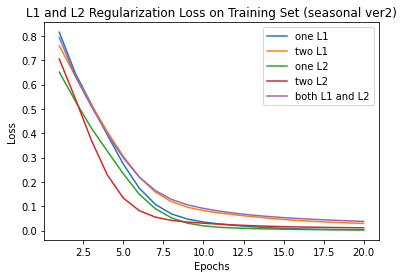

In [ ]:
# L1, L2 regularization effect on training loss


import matplotlib.pyplot as plt

history_dict_seasonal_ver2_L1_1 = history_seasonal_ver2_L1_1.history
history_dict_seasonal_ver2_L1_2 = history_seasonal_ver2_L1_2.history
history_dict_seasonal_ver2_L2_1 = history_seasonal_ver2_L2_1.history
history_dict_seasonal_ver2_L2_2 = history_seasonal_ver2_L2_2.history
history_dict_seasonal_ver2_L12 = history_seasonal_ver2_L12.history

loss_values_seasonal_ver2_L1_1 = history_dict_seasonal_ver2_L1_1["loss"]
loss_values_seasonal_ver2_L1_2 = history_dict_seasonal_ver2_L1_2["loss"]
loss_values_seasonal_ver2_L2_1 = history_dict_seasonal_ver2_L2_1["loss"]
loss_values_seasonal_ver2_L2_2 = history_dict_seasonal_ver2_L2_2["loss"]
loss_values_seasonal_ver2_L12 = history_dict_seasonal_ver2_L12["loss"]


epochs = range(1, len(loss_values_seasonal_ver2_L1_1) + 1)


plt.plot(epochs, loss_values_seasonal_ver2_L1_1, label="one L1")
plt.plot(epochs, loss_values_seasonal_ver2_L1_2, label="two L1")
plt.plot(epochs, loss_values_seasonal_ver2_L2_1, label="one L2")
plt.plot(epochs, loss_values_seasonal_ver2_L2_2, label="two L2")
plt.plot(epochs, loss_values_seasonal_ver2_L12, label="both L1 and L2")


plt.title("L1 and L2 Regularization Loss on Training Set (seasonal ver2)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
#plt.ylim([0.3,0.9])
plt.legend()
plt.show()

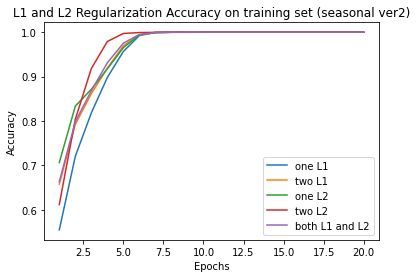

In [ ]:
# L1, L2 regularization effect on training accuracy


import matplotlib.pyplot as plt


acc_values_seasonal_ver2_L1_1 = history_dict_seasonal_ver2_L1_1["accuracy"]
acc_values_seasonal_ver2_L1_2 = history_dict_seasonal_ver2_L1_2["accuracy"]
acc_values_seasonal_ver2_L2_1 = history_dict_seasonal_ver2_L2_1["accuracy"]
acc_values_seasonal_ver2_L2_2 = history_dict_seasonal_ver2_L2_2["accuracy"]
acc_values_seasonal_ver2_L12 = history_dict_seasonal_ver2_L12["accuracy"]

epochs = range(1, len(acc_values_seasonal_ver2_L1_1) + 1)


plt.plot(epochs, acc_values_seasonal_ver2_L1_1, label="one L1")
plt.plot(epochs, acc_values_seasonal_ver2_L1_2, label="two L1")
plt.plot(epochs, acc_values_seasonal_ver2_L2_1, label="one L2")
plt.plot(epochs, acc_values_seasonal_ver2_L2_2, label="two L2")
plt.plot(epochs, acc_values_seasonal_ver2_L12, label="both L1 and L2")

plt.title("L1 and L2 Regularization Accuracy on training set (seasonal ver2)")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
#plt.ylim([0.78, 0.85])
plt.legend()
plt.show()

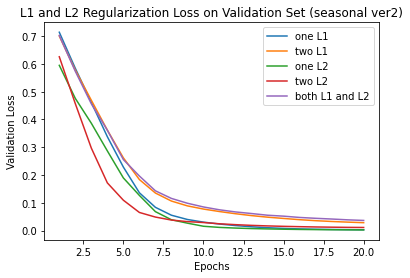

In [ ]:
# L1, L2 regularization effect on validation loss


import matplotlib.pyplot as plt


val_loss_values_seasonal_ver2_L1_1 = history_dict_seasonal_ver2_L1_1["val_loss"]
val_loss_values_seasonal_ver2_L1_2 = history_dict_seasonal_ver2_L1_2["val_loss"]
val_loss_values_seasonal_ver2_L2_1 = history_dict_seasonal_ver2_L2_1["val_loss"]
val_loss_values_seasonal_ver2_L2_2 = history_dict_seasonal_ver2_L2_2["val_loss"]
val_loss_values_seasonal_ver2_L12 = history_dict_seasonal_ver2_L12["val_loss"]


epochs = range(1, len(val_loss_values_seasonal_ver2_L1_1) + 1)


plt.plot(epochs, val_loss_values_seasonal_ver2_L1_1, label="one L1")
plt.plot(epochs, val_loss_values_seasonal_ver2_L1_2, label="two L1")
plt.plot(epochs, val_loss_values_seasonal_ver2_L2_1, label="one L2")
plt.plot(epochs, val_loss_values_seasonal_ver2_L2_2, label="two L2")
plt.plot(epochs, val_loss_values_seasonal_ver2_L12, label="both L1 and L2")


plt.title("L1 and L2 Regularization Loss on Validation Set (seasonal ver2)")
plt.xlabel("Epochs")
plt.ylabel("Validation Loss")
#plt.ylim([0.3,0.9])
plt.legend()
plt.show()

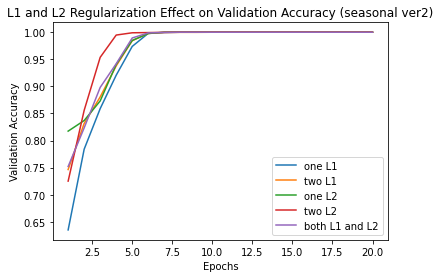

In [ ]:
# L1, L2 regularization effect on validation accuracy


import matplotlib.pyplot as plt


val_acc_values_seasonal_ver2_L1_1 = history_dict_seasonal_ver2_L1_1["val_accuracy"]
val_acc_values_seasonal_ver2_L1_2 = history_dict_seasonal_ver2_L1_2["val_accuracy"]
val_acc_values_seasonal_ver2_L2_1 = history_dict_seasonal_ver2_L2_1["val_accuracy"]
val_acc_values_seasonal_ver2_L2_2 = history_dict_seasonal_ver2_L2_2["val_accuracy"]
val_acc_values_seasonal_ver2_L12 = history_dict_seasonal_ver2_L12["val_accuracy"]



epochs = range(1, len(val_acc_values_seasonal_ver2_L1_1) + 1)


plt.plot(epochs, val_acc_values_seasonal_ver2_L1_1, label="one L1")
plt.plot(epochs, val_acc_values_seasonal_ver2_L1_2, label="two L1")
plt.plot(epochs, val_acc_values_seasonal_ver2_L2_1, label="one L2")
plt.plot(epochs, val_acc_values_seasonal_ver2_L2_2, label="two L2")
plt.plot(epochs, val_acc_values_seasonal_ver2_L12, label="both L1 and L2")


plt.title("L1 and L2 Regularization Effect on Validation Accuracy (seasonal ver2)")
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
plt.legend()
plt.show()

## **Hyperparameter effect**

**0.005**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_seasonal_ver2_one = keras.Sequential([
                                      layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.005)),
                                      layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.005)),
                                      layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_seasonal_ver2_one.compile(optimizer = "rmsprop",
                                loss = "binary_crossentropy",
                                metrics = ["accuracy"])



# fitting model

history_seasonal_ver2_one = model_seasonal_ver2_one.fit(x_train_seasonal_ver2,
                                                        y_train_seasonal_ver2,
                                                        epochs = 20,
                                                        batch_size = 512,
                                                        validation_data = (x_valid_seasonal_ver2, y_valid_seasonal_ver2))


Epoch 1/20
40/40 [==============================] - 1s 14ms/step - loss: 0.8714 - accuracy: 0.5388 - val_loss: 0.8012 - val_accuracy: 0.6772
Epoch 2/20
40/40 [==============================] - 0s 7ms/step - loss: 0.7505 - accuracy: 0.7437 - val_loss: 0.6923 - val_accuracy: 0.8016
Epoch 3/20
40/40 [==============================] - 0s 7ms/step - loss: 0.6396 - accuracy: 0.8268 - val_loss: 0.5854 - val_accuracy: 0.8448
Epoch 4/20
40/40 [==============================] - 0s 7ms/step - loss: 0.5350 - accuracy: 0.8606 - val_loss: 0.4924 - val_accuracy: 0.8670
Epoch 5/20
40/40 [==============================] - 0s 7ms/step - loss: 0.4427 - accuracy: 0.8949 - val_loss: 0.4085 - val_accuracy: 0.9043
Epoch 6/20
40/40 [==============================] - 0s 7ms/step - loss: 0.3556 - accuracy: 0.9344 - val_loss: 0.3251 - val_accuracy: 0.9461
Epoch 7/20
40/40 [==============================] - 0s 7ms/step - loss: 0.2721 - accuracy: 0.9723 - val_loss: 0.2337 - val_accuracy: 0.9864
Epoch 8/20
40/40 [=

**0.002**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_seasonal_ver2_two = keras.Sequential([
                                      layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.002)),
                                      layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.002)),
                                      layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_seasonal_ver2_two.compile(optimizer = "rmsprop",
                                loss = "binary_crossentropy",
                                metrics = ["accuracy"])



# fitting model

history_seasonal_ver2_two = model_seasonal_ver2_two.fit(x_train_seasonal_ver2,
                                                        y_train_seasonal_ver2,
                                                        epochs = 20,
                                                        batch_size = 512,
                                                        validation_data = (x_valid_seasonal_ver2, y_valid_seasonal_ver2))


Epoch 1/20
40/40 [==============================] - 1s 8ms/step - loss: 0.7599 - accuracy: 0.5848 - val_loss: 0.6751 - val_accuracy: 0.6936
Epoch 2/20
40/40 [==============================] - 0s 4ms/step - loss: 0.6020 - accuracy: 0.7746 - val_loss: 0.5342 - val_accuracy: 0.8280
Epoch 3/20
40/40 [==============================] - 0s 4ms/step - loss: 0.4722 - accuracy: 0.8670 - val_loss: 0.4244 - val_accuracy: 0.8831
Epoch 4/20
40/40 [==============================] - 0s 4ms/step - loss: 0.3687 - accuracy: 0.9192 - val_loss: 0.3343 - val_accuracy: 0.9279
Epoch 5/20
40/40 [==============================] - 0s 4ms/step - loss: 0.2810 - accuracy: 0.9578 - val_loss: 0.2402 - val_accuracy: 0.9734
Epoch 6/20
40/40 [==============================] - 0s 4ms/step - loss: 0.2035 - accuracy: 0.9844 - val_loss: 0.1713 - val_accuracy: 0.9934
Epoch 7/20
40/40 [==============================] - 0s 4ms/step - loss: 0.1439 - accuracy: 0.9966 - val_loss: 0.1200 - val_accuracy: 0.9990
Epoch 8/20
40/40 [==

**0.001(original)**

In [38]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_seasonal_ver2_three = keras.Sequential([
                                      layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.001)),
                                      layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.001)),
                                      layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_seasonal_ver2_three.compile(optimizer = "rmsprop",
                                  loss = "binary_crossentropy",
                                  metrics = ["accuracy"])



# fitting model

history_seasonal_ver2_three = model_seasonal_ver2_three.fit(x_train_seasonal_ver2,
                                                            y_train_seasonal_ver2,
                                                            epochs = 20,
                                                            batch_size = 512,
                                                            validation_data = (x_valid_seasonal_ver2, y_valid_seasonal_ver2))


Epoch 1/20
40/40 [==============================] - 1s 9ms/step - loss: 0.6518 - accuracy: 0.6894 - val_loss: 0.5880 - val_accuracy: 0.7727
Epoch 2/20
40/40 [==============================] - 0s 4ms/step - loss: 0.5227 - accuracy: 0.8299 - val_loss: 0.4621 - val_accuracy: 0.8670
Epoch 3/20
40/40 [==============================] - 0s 4ms/step - loss: 0.3994 - accuracy: 0.8977 - val_loss: 0.3588 - val_accuracy: 0.9031
Epoch 4/20
40/40 [==============================] - 0s 4ms/step - loss: 0.2966 - accuracy: 0.9441 - val_loss: 0.2549 - val_accuracy: 0.9628
Epoch 5/20
40/40 [==============================] - 0s 4ms/step - loss: 0.2103 - accuracy: 0.9794 - val_loss: 0.1747 - val_accuracy: 0.9912
Epoch 6/20
40/40 [==============================] - 0s 4ms/step - loss: 0.1411 - accuracy: 0.9966 - val_loss: 0.1156 - val_accuracy: 0.9990
Epoch 7/20
40/40 [==============================] - 0s 4ms/step - loss: 0.0920 - accuracy: 0.9995 - val_loss: 0.0738 - val_accuracy: 1.0000
Epoch 8/20
40/40 [==

**0.0005**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model


model_seasonal_ver2_four = keras.Sequential([
                                      layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.0005)),
                                      layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.0005)),
                                      layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_seasonal_ver2_four.compile(optimizer = "rmsprop",
                                 loss = "binary_crossentropy",
                                 metrics = ["accuracy"])



# fitting model

history_seasonal_ver2_four = model_seasonal_ver2_four.fit(x_train_seasonal_ver2,
                                                          y_train_seasonal_ver2,
                                                          epochs = 20,
                                                          batch_size = 512,
                                                          validation_data = (x_valid_seasonal_ver2, y_valid_seasonal_ver2))


Epoch 1/20
40/40 [==============================] - 2s 13ms/step - loss: 0.7075 - accuracy: 0.5878 - val_loss: 0.6153 - val_accuracy: 0.7407
Epoch 2/20
40/40 [==============================] - 0s 6ms/step - loss: 0.5550 - accuracy: 0.7860 - val_loss: 0.5103 - val_accuracy: 0.8014
Epoch 3/20
40/40 [==============================] - 0s 4ms/step - loss: 0.4403 - accuracy: 0.8633 - val_loss: 0.3853 - val_accuracy: 0.8929
Epoch 4/20
40/40 [==============================] - 0s 7ms/step - loss: 0.3176 - accuracy: 0.9313 - val_loss: 0.2690 - val_accuracy: 0.9517
Epoch 5/20
40/40 [==============================] - 0s 4ms/step - loss: 0.2064 - accuracy: 0.9795 - val_loss: 0.1639 - val_accuracy: 0.9928
Epoch 6/20
40/40 [==============================] - 0s 7ms/step - loss: 0.1246 - accuracy: 0.9965 - val_loss: 0.1058 - val_accuracy: 0.9966
Epoch 7/20
40/40 [==============================] - 0s 7ms/step - loss: 0.0743 - accuracy: 0.9995 - val_loss: 0.0570 - val_accuracy: 0.9994
Epoch 8/20
40/40 [=

**0.0001**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_seasonal_ver2_five = keras.Sequential([
                                      layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.0001)),
                                      layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.0001)),
                                      layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_seasonal_ver2_five.compile(optimizer = "rmsprop",
                                loss = "binary_crossentropy",
                                metrics = ["accuracy"])



# fitting model

history_seasonal_ver2_five = model_seasonal_ver2_five.fit(x_train_seasonal_ver2,
                                                          y_train_seasonal_ver2,
                                                          epochs = 20,
                                                          batch_size = 512,
                                                          validation_data = (x_valid_seasonal_ver2, y_valid_seasonal_ver2))


Epoch 1/20
40/40 [==============================] - 2s 14ms/step - loss: 0.6795 - accuracy: 0.5907 - val_loss: 0.6139 - val_accuracy: 0.7335
Epoch 2/20
40/40 [==============================] - 0s 7ms/step - loss: 0.5508 - accuracy: 0.7777 - val_loss: 0.4967 - val_accuracy: 0.8160
Epoch 3/20
40/40 [==============================] - 0s 7ms/step - loss: 0.4346 - accuracy: 0.8583 - val_loss: 0.3811 - val_accuracy: 0.8851
Epoch 4/20
40/40 [==============================] - 0s 7ms/step - loss: 0.3270 - accuracy: 0.9203 - val_loss: 0.2957 - val_accuracy: 0.9285
Epoch 5/20
40/40 [==============================] - 0s 7ms/step - loss: 0.2391 - accuracy: 0.9638 - val_loss: 0.2072 - val_accuracy: 0.9744
Epoch 6/20
40/40 [==============================] - 0s 6ms/step - loss: 0.1652 - accuracy: 0.9893 - val_loss: 0.1355 - val_accuracy: 0.9964
Epoch 7/20
40/40 [==============================] - 0s 7ms/step - loss: 0.1053 - accuracy: 0.9988 - val_loss: 0.0811 - val_accuracy: 0.9994
Epoch 8/20
40/40 [=

### visualize

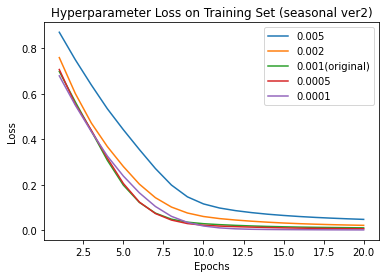

In [ ]:
# Hyperparameter effect on training loss


import matplotlib.pyplot as plt

history_dict_seasonal_ver2_one = history_seasonal_ver2_one.history
history_dict_seasonal_ver2_two = history_seasonal_ver2_two.history
history_dict_seasonal_ver2_three = history_seasonal_ver2_three.history
history_dict_seasonal_ver2_four = history_seasonal_ver2_four.history
history_dict_seasonal_ver2_five = history_seasonal_ver2_five.history

loss_values_seasonal_ver2_one = history_dict_seasonal_ver2_one["loss"]
loss_values_seasonal_ver2_two = history_dict_seasonal_ver2_two["loss"]
loss_values_seasonal_ver2_three = history_dict_seasonal_ver2_three["loss"]
loss_values_seasonal_ver2_four = history_dict_seasonal_ver2_four["loss"]
loss_values_seasonal_ver2_five = history_dict_seasonal_ver2_five["loss"]


epochs = range(1, len(loss_values_seasonal_ver2_one) + 1)


plt.plot(epochs, loss_values_seasonal_ver2_one, label="0.005")
plt.plot(epochs, loss_values_seasonal_ver2_two, label="0.002")
plt.plot(epochs, loss_values_seasonal_ver2_three, label="0.001(original)")
plt.plot(epochs, loss_values_seasonal_ver2_four, label="0.0005")
plt.plot(epochs, loss_values_seasonal_ver2_five, label="0.0001")


plt.title("Hyperparameter Loss on Training Set (seasonal ver2)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
#plt.ylim([0.3,0.6])
plt.legend()
plt.show()

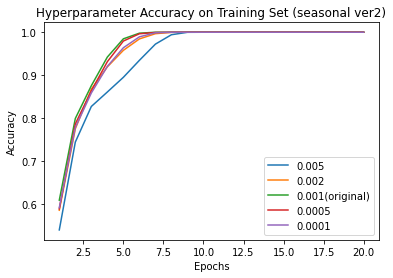

In [ ]:
# Hyperparameter effect on training accuracy


import matplotlib.pyplot as plt


acc_values_seasonal_ver2_one = history_dict_seasonal_ver2_one["accuracy"]
acc_values_seasonal_ver2_two = history_dict_seasonal_ver2_two["accuracy"]
acc_values_seasonal_ver2_three = history_dict_seasonal_ver2_three["accuracy"]
acc_values_seasonal_ver2_four = history_dict_seasonal_ver2_four["accuracy"]
acc_values_seasonal_ver2_five = history_dict_seasonal_ver2_five["accuracy"]

epochs = range(1, len(acc_values_seasonal_ver2_one) + 1)


plt.plot(epochs, acc_values_seasonal_ver2_one, label="0.005")
plt.plot(epochs, acc_values_seasonal_ver2_two, label="0.002")
plt.plot(epochs, acc_values_seasonal_ver2_three, label="0.001(original)")
plt.plot(epochs, acc_values_seasonal_ver2_four, label="0.0005")
plt.plot(epochs, acc_values_seasonal_ver2_five, label="0.0001")

plt.title("Hyperparameter Accuracy on Training Set (seasonal ver2)")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
#plt.ylim([0.78, 0.85])
plt.legend()
plt.show()

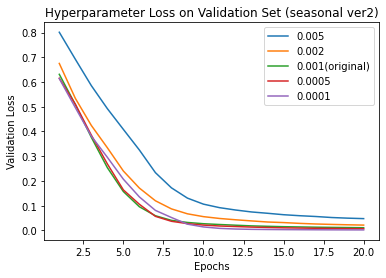

In [ ]:
# Hyperparameter effect on validation loss


import matplotlib.pyplot as plt


val_loss_values_seasonal_ver2_one = history_dict_seasonal_ver2_one["val_loss"]
val_loss_values_seasonal_ver2_two = history_dict_seasonal_ver2_two["val_loss"]
val_loss_values_seasonal_ver2_three = history_dict_seasonal_ver2_three["val_loss"]
val_loss_values_seasonal_ver2_four = history_dict_seasonal_ver2_four["val_loss"]
val_loss_values_seasonal_ver2_five = history_dict_seasonal_ver2_five["val_loss"]


epochs = range(1, len(val_loss_values_seasonal_ver2_one) + 1)


plt.plot(epochs, val_loss_values_seasonal_ver2_one, label="0.005")
plt.plot(epochs, val_loss_values_seasonal_ver2_two, label="0.002")
plt.plot(epochs, val_loss_values_seasonal_ver2_three, label="0.001(original)")
plt.plot(epochs, val_loss_values_seasonal_ver2_four, label="0.0005")
plt.plot(epochs, val_loss_values_seasonal_ver2_five, label="0.0001")


plt.title("Hyperparameter Loss on Validation Set (seasonal ver2)")
plt.xlabel("Epochs")
plt.ylabel("Validation Loss")
#plt.ylim([0.4,0.6])
plt.legend()
plt.show()

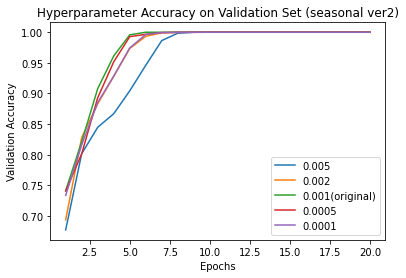

In [ ]:
# Hyperparameter effect on validation accuracy


import matplotlib.pyplot as plt



val_acc_values_seasonal_ver2_one = history_dict_seasonal_ver2_one["val_accuracy"]
val_acc_values_seasonal_ver2_two = history_dict_seasonal_ver2_two["val_accuracy"]
val_acc_values_seasonal_ver2_three = history_dict_seasonal_ver2_three["val_accuracy"]
val_acc_values_seasonal_ver2_four = history_dict_seasonal_ver2_four["val_accuracy"]
val_acc_values_seasonal_ver2_five = history_dict_seasonal_ver2_five["val_accuracy"]



epochs = range(1, len(val_acc_values_seasonal_ver2_one) + 1)


plt.plot(epochs, val_acc_values_seasonal_ver2_one, label="0.005")
plt.plot(epochs, val_acc_values_seasonal_ver2_two, label="0.002")
plt.plot(epochs, val_acc_values_seasonal_ver2_three, label="0.001(original)")
plt.plot(epochs, val_acc_values_seasonal_ver2_four, label="0.0005")
plt.plot(epochs, val_acc_values_seasonal_ver2_five, label="0.0001")


plt.title("Hyperparameter Accuracy on Validation Set (seasonal ver2)")
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
plt.legend()
plt.show()

## **Dropout effect**

**# dropout = 1**

In [35]:
# 수정

from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_seasonal_ver2_onedr = keras.Sequential([
                                      layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.001)),
                                      layers.Dropout(0.5),
                                      layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.001)),
                                      layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_seasonal_ver2_onedr.compile(optimizer = "rmsprop",
                                  loss = "binary_crossentropy",
                                  metrics = ["accuracy"])



# fitting model

history_seasonal_ver2_onedr = model_seasonal_ver2_onedr.fit(x_train_seasonal_ver2,
                                                            y_train_seasonal_ver2,
                                                            epochs = 20,
                                                            batch_size = 512,
                                                            validation_data = (x_valid_seasonal_ver2, y_valid_seasonal_ver2))


Epoch 1/20
40/40 [==============================] - 1s 8ms/step - loss: 0.7476 - accuracy: 0.5253 - val_loss: 0.6875 - val_accuracy: 0.6061
Epoch 2/20
40/40 [==============================] - 0s 4ms/step - loss: 0.6811 - accuracy: 0.6069 - val_loss: 0.6329 - val_accuracy: 0.6982
Epoch 3/20
40/40 [==============================] - 0s 4ms/step - loss: 0.6309 - accuracy: 0.6698 - val_loss: 0.5642 - val_accuracy: 0.7809
Epoch 4/20
40/40 [==============================] - 0s 4ms/step - loss: 0.5745 - accuracy: 0.7223 - val_loss: 0.4958 - val_accuracy: 0.8322
Epoch 5/20
40/40 [==============================] - 0s 4ms/step - loss: 0.5179 - accuracy: 0.7646 - val_loss: 0.4294 - val_accuracy: 0.8584
Epoch 6/20
40/40 [==============================] - 0s 4ms/step - loss: 0.4567 - accuracy: 0.8053 - val_loss: 0.3659 - val_accuracy: 0.8975
Epoch 7/20
40/40 [==============================] - 0s 4ms/step - loss: 0.3957 - accuracy: 0.8423 - val_loss: 0.3021 - val_accuracy: 0.9207
Epoch 8/20
40/40 [==

**# dropout = 2**

In [36]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_seasonal_ver2_twodr = keras.Sequential([
                                      layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.001)),
                                      layers.Dropout(0.5),
                                      layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.001)),
                                      layers.Dropout(0.5),
                                      layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_seasonal_ver2_twodr.compile(optimizer = "rmsprop",
                                  loss = "binary_crossentropy",
                                  metrics = ["accuracy"])



# fitting model

history_seasonal_ver2_twodr = model_seasonal_ver2_twodr.fit(x_train_seasonal_ver2,
                                                            y_train_seasonal_ver2,
                                                            epochs = 20,
                                                            batch_size = 512,
                                                            validation_data = (x_valid_seasonal_ver2, y_valid_seasonal_ver2))


Epoch 1/20
40/40 [==============================] - 1s 7ms/step - loss: 0.8934 - accuracy: 0.5011 - val_loss: 0.7080 - val_accuracy: 0.5789
Epoch 2/20
40/40 [==============================] - 0s 4ms/step - loss: 0.7330 - accuracy: 0.5451 - val_loss: 0.6862 - val_accuracy: 0.6622
Epoch 3/20
40/40 [==============================] - 0s 4ms/step - loss: 0.6943 - accuracy: 0.5960 - val_loss: 0.6461 - val_accuracy: 0.7307
Epoch 4/20
40/40 [==============================] - 0s 4ms/step - loss: 0.6579 - accuracy: 0.6503 - val_loss: 0.5902 - val_accuracy: 0.7829
Epoch 5/20
40/40 [==============================] - 0s 4ms/step - loss: 0.6159 - accuracy: 0.6899 - val_loss: 0.5318 - val_accuracy: 0.8046
Epoch 6/20
40/40 [==============================] - 0s 4ms/step - loss: 0.5639 - accuracy: 0.7372 - val_loss: 0.4502 - val_accuracy: 0.8648
Epoch 7/20
40/40 [==============================] - 0s 4ms/step - loss: 0.5136 - accuracy: 0.7757 - val_loss: 0.3749 - val_accuracy: 0.9017
Epoch 8/20
40/40 [==

### visualize

In [39]:
history_dict_seasonal_ver2_one = history_seasonal_ver2_one.history


loss_values_seasonal_ver2_one = history_dict_seasonal_ver2_one["loss"]


NameError: ignored

In [37]:
# Dropout effect on training loss


import matplotlib.pyplot as plt


history_dict_seasonal_ver2_onedr = history_seasonal_ver2_onedr.history
history_dict_seasonal_ver2_twodr = history_seasonal_ver2_twodr.history


loss_values_seasonal_ver2_onedr = history_dict_seasonal_ver2_onedr["loss"]
loss_values_seasonal_ver2_twodr = history_dict_seasonal_ver2_twodr["loss"]

epochs = range(1, len(loss_values_seasonal_ver2_onedr) + 1)


plt.plot(epochs, loss_values_seasonal_ver2_one, label="no dropout")
plt.plot(epochs, loss_values_seasonal_ver2_onedr, label="1 dropout")
plt.plot(epochs, loss_values_seasonal_ver2_twodr, label="2 dropout")

plt.title("Dropout Loss on Training Set (seasonal ver2)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
#plt.ylim([0.4,0.6])
plt.legend()
plt.show()

NameError: ignored

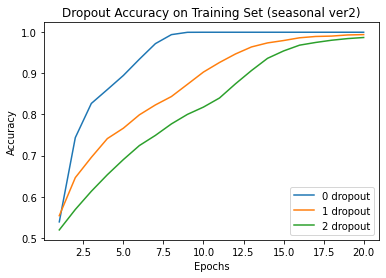

In [ ]:
# Dropout effect on training accuracy


import matplotlib.pyplot as plt


acc_values_seasonal_ver2_onedr = history_dict_seasonal_ver2_onedr["accuracy"]
acc_values_seasonal_ver2_twodr = history_dict_seasonal_ver2_twodr["accuracy"]

epochs = range(1, len(acc_values_seasonal_ver2_onedr) + 1)


plt.plot(epochs, acc_values_seasonal_ver2_one, label="0 dropout")
plt.plot(epochs, acc_values_seasonal_ver2_onedr, label="1 dropout")
plt.plot(epochs, acc_values_seasonal_ver2_twodr, label="2 dropout")

plt.title("Dropout Accuracy on Training Set (seasonal ver2)")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
#plt.ylim([0.78, 0.85])
plt.legend()
plt.show()

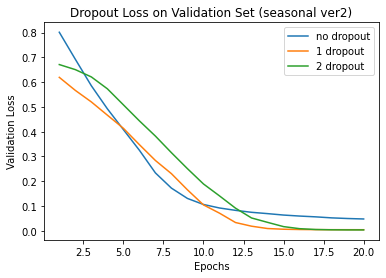

In [ ]:
# Dropout effect on validation loss


import matplotlib.pyplot as plt


val_loss_values_seasonal_ver2_onedr = history_dict_seasonal_ver2_onedr["val_loss"]
val_loss_values_seasonal_ver2_twodr = history_dict_seasonal_ver2_twodr["val_loss"]


epochs = range(1, len(val_loss_values_seasonal_ver2_onedr) + 1)


plt.plot(epochs, val_loss_values_seasonal_ver2_one, label="no dropout")
plt.plot(epochs, val_loss_values_seasonal_ver2_onedr, label="1 dropout")
plt.plot(epochs, val_loss_values_seasonal_ver2_twodr, label="2 dropout")

plt.title("Dropout Loss on Validation Set (seasonal ver2)")
plt.xlabel("Epochs")
plt.ylabel("Validation Loss")
#plt.ylim([0.4,0.6])
plt.legend()
plt.show()

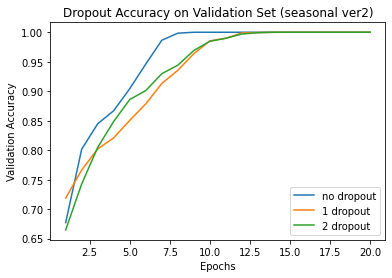

In [ ]:
# Dropout effect on validation accuracy


import matplotlib.pyplot as plt



val_acc_values_seasonal_ver2_onedr = history_dict_seasonal_ver2_onedr["val_accuracy"]
val_acc_values_seasonal_ver2_twodr = history_dict_seasonal_ver2_twodr["val_accuracy"]



epochs = range(1, len(val_acc_values_seasonal_ver2_onedr) + 1)


plt.plot(epochs, val_acc_values_seasonal_ver2_one, label="no dropout")
plt.plot(epochs, val_acc_values_seasonal_ver2_onedr, label="1 dropout")
plt.plot(epochs, val_acc_values_seasonal_ver2_twodr, label="2 dropout")


plt.title("Dropout Accuracy on Validation Set (seasonal ver2)")
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
plt.legend()
plt.show()

## **Hyperparameter effect**

**0.8**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_seasonal_ver2_twodr2 = keras.Sequential([
                                      layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.0001)),
                                      layers.Dropout(0.8),
                                      layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.0001)),
                                      layers.Dropout(0.8),
                                      layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_seasonal_ver2_twodr2.compile(optimizer = "rmsprop",
                                   loss = "binary_crossentropy",
                                   metrics = ["accuracy"])



# fitting model

history_seasonal_ver2_twodr2 = model_seasonal_ver2_twodr2.fit(x_train_seasonal_ver2,
                                                              y_train_seasonal_ver2,
                                                              epochs = 20,
                                                              batch_size = 512,
                                                              validation_data = (x_valid_seasonal_ver2, y_valid_seasonal_ver2))


Epoch 1/20
40/40 [==============================] - 1s 13ms/step - loss: 1.6899 - accuracy: 0.5066 - val_loss: 0.7120 - val_accuracy: 0.5016
Epoch 2/20
40/40 [==============================] - 0s 7ms/step - loss: 1.0354 - accuracy: 0.5155 - val_loss: 0.6987 - val_accuracy: 0.4980
Epoch 3/20
40/40 [==============================] - 0s 6ms/step - loss: 0.7910 - accuracy: 0.5241 - val_loss: 0.6926 - val_accuracy: 0.5334
Epoch 4/20
40/40 [==============================] - 0s 7ms/step - loss: 0.7095 - accuracy: 0.5343 - val_loss: 0.6883 - val_accuracy: 0.5348
Epoch 5/20
40/40 [==============================] - 0s 8ms/step - loss: 0.6927 - accuracy: 0.5536 - val_loss: 0.6845 - val_accuracy: 0.5443
Epoch 6/20
40/40 [==============================] - 0s 8ms/step - loss: 0.6841 - accuracy: 0.5649 - val_loss: 0.6769 - val_accuracy: 0.5969
Epoch 7/20
40/40 [==============================] - 0s 6ms/step - loss: 0.6772 - accuracy: 0.5778 - val_loss: 0.6695 - val_accuracy: 0.6322
Epoch 8/20
40/40 [=

### visualize

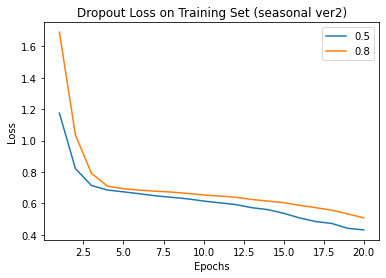

In [ ]:
# Dropout effect on training loss


import matplotlib.pyplot as plt


history_dict_seasonal_ver2_twodr = history_seasonal_ver2_twodr.history
history_dict_seasonal_ver2_twodr2 = history_seasonal_ver2_twodr2.history


loss_values_seasonal_ver2_twodr = history_dict_seasonal_ver2_twodr["loss"]
loss_values_seasonal_ver2_twodr2 = history_dict_seasonal_ver2_twodr2["loss"]


epochs = range(1, len(loss_values_seasonal_ver2_twodr) + 1)


plt.plot(epochs, loss_values_seasonal_ver2_twodr, label="0.5")
plt.plot(epochs, loss_values_seasonal_ver2_twodr2, label="0.8")

plt.title("Dropout Loss on Training Set (seasonal ver2)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
#plt.ylim([0.4,0.6])
plt.legend()
plt.show()

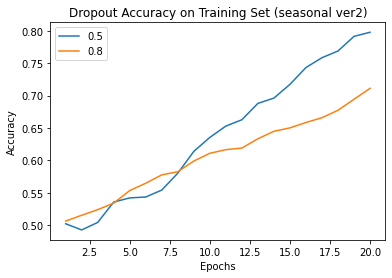

In [ ]:
# Dropout effect on training accuracy


import matplotlib.pyplot as plt


acc_values_seasonal_ver2_twodr = history_dict_seasonal_ver2_twodr["accuracy"]
acc_values_seasonal_ver2_twodr2 = history_dict_seasonal_ver2_twodr2["accuracy"]

epochs = range(1, len(acc_values_seasonal_ver2_twodr) + 1)


plt.plot(epochs, acc_values_seasonal_ver2_twodr, label="0.5")
plt.plot(epochs, acc_values_seasonal_ver2_twodr2, label="0.8")


plt.title("Dropout Accuracy on Training Set (seasonal ver2)")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
#plt.ylim([0.78, 0.85])
plt.legend()
plt.show()

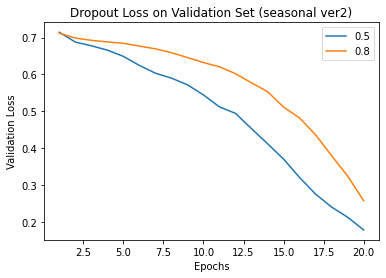

In [ ]:
# Dropout effect on validation loss


import matplotlib.pyplot as plt


val_loss_values_seasonal_ver2_twodr = history_dict_seasonal_ver2_twodr["val_loss"]
val_loss_values_seasonal_ver2_twodr2 = history_dict_seasonal_ver2_twodr2["val_loss"]


epochs = range(1, len(val_loss_values_seasonal_ver2_twodr) + 1)


plt.plot(epochs, val_loss_values_seasonal_ver2_twodr, label="0.5")
plt.plot(epochs, val_loss_values_seasonal_ver2_twodr2, label="0.8")


plt.title("Dropout Loss on Validation Set (seasonal ver2)")
plt.xlabel("Epochs")
plt.ylabel("Validation Loss")
#plt.ylim([0.4,0.6])
plt.legend()
plt.show()

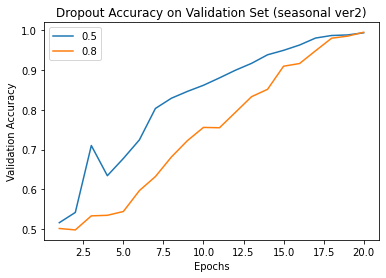

In [ ]:
# Dropout effect on validation accuracy


import matplotlib.pyplot as plt



val_acc_values_seasonal_ver2_twodr = history_dict_seasonal_ver2_twodr["val_accuracy"]
val_acc_values_seasonal_ver2_twodr2 = history_dict_seasonal_ver2_twodr2["val_accuracy"]



epochs = range(1, len(val_acc_values_seasonal_ver2_twodr) + 1)


plt.plot(epochs, val_acc_values_seasonal_ver2_twodr, label="0.5")
plt.plot(epochs, val_acc_values_seasonal_ver2_twodr2, label="0.8")


plt.title("Dropout Accuracy on Validation Set (seasonal ver2)")
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
plt.legend()
plt.show()

# Predict

In [ ]:
sub_frmt = pd.read_csv('/content/drive/MyDrive/22-1_DLAI_Team_Project/submission_format.csv')

In [ ]:
sub_frmt.head()

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,26707,0.5,0.7
1,26708,0.5,0.7
2,26709,0.5,0.7
3,26710,0.5,0.7
4,26711,0.5,0.7


#### Predict ver1

**h1n1_vaccine**

In [ ]:
test_h1n1_ver1 = pd.read_csv('/content/drive/MyDrive/22-1_DLAI_Team_Project/test_h1n1_ver1.csv')

In [ ]:
test_h1n1_ver1.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,age_group,race,sex,hhs_geo_region,census_msa,household_adults,household_children
0,26707,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,5.0,1.0,1.0,2,4,1,7,2,1.0,0.0
1,26708,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,1.0,1.0,1,1,2,1,1,3.0,0.0
2,26709,2.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,5.0,4.0,2.0,4,1,2,5,1,1.0,0.0
3,26710,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,2.0,2.0,5,1,1,5,2,1.0,0.0
4,26711,3.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,5.0,2.0,4.0,2,2,1,6,1,0.0,1.0


In [ ]:
test_h1n1_ver1 = test_h1n1_ver1.drop(['respondent_id'], axis = 1)
test_h1n1_ver1.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,chronic_med_condition,...,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,age_group,race,sex,hhs_geo_region,census_msa,household_adults,household_children
0,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,5.0,1.0,1.0,2,4,1,7,2,1.0,0.0
1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,1.0,1.0,1,1,2,1,1,3.0,0.0
2,2.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,...,5.0,4.0,2.0,4,1,2,5,1,1.0,0.0
3,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,4.0,2.0,2.0,5,1,1,5,2,1.0,0.0
4,3.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,...,5.0,2.0,4.0,2,2,1,6,1,0.0,1.0


In [ ]:
pred_h1n1_ver1 = model_h1n1_ver1_onedr.predict(test_h1n1_ver1)

In [ ]:
pred_h1n1_ver1

array([[0.10545674],
       [0.06555585],
       [0.57769877],
       ...,
       [0.11005425],
       [0.21622697],
       [0.13972388]], dtype=float32)

In [ ]:
sub_frmt['h1n1_vaccine'] = pred_h1n1_ver1

**seasonal_vaccine**

In [ ]:
test_seasonal_ver1 = pd.read_csv('/content/drive/MyDrive/22-1_DLAI_Team_Project/test_seasonal_ver1.csv')

In [ ]:
test_seasonal_ver1.head()

,respondent_id,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,chronic_med_condition,child_under_6_months,...,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,race,sex,hhs_geo_region,census_msa,household_adults,household_children
0,26707,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,5.0,1.0,1.0,2,4,1,7,2,1.0,0.0
1,26708,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,1.0,1.0,1,1,2,1,1,3.0,0.0
2,26709,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,...,5.0,4.0,4.0,4,1,2,5,1,1.0,0.0
3,26710,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,4.0,4.0,2.0,5,1,1,5,2,1.0,0.0
4,26711,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,...,4.0,4.0,2.0,2,2,1,6,1,0.0,1.0


In [ ]:
test_seasonal_ver1 = test_seasonal_ver1.drop(['respondent_id'], axis = 1)
test_seasonal_ver1.head()

,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,chronic_med_condition,child_under_6_months,health_worker,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,race,sex,hhs_geo_region,census_msa,household_adults,household_children
0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,5.0,1.0,1.0,2,4,1,7,2,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,1.0,1,1,2,1,1,3.0,0.0
2,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,5.0,4.0,4.0,4,1,2,5,1,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4.0,4.0,2.0,5,1,1,5,2,1.0,0.0
4,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,4.0,4.0,2.0,2,2,1,6,1,0.0,1.0


In [ ]:
pred_seasonal_ver1 = model_seasonal_ver1_twodr.predict(test_seasonal_ver1)

In [ ]:
pred_seasonal_ver1

array([[0.15772308],
       [0.10484045],
       [0.68897426],
       ...,
       [0.18094026],
       [0.5891771 ],
       [0.7109244 ]], dtype=float32)

In [ ]:
sub_frmt['seasonal_vaccine'] = pred_seasonal_ver1

**submission_ver1**

In [ ]:
submission_ver1 = sub_frmt[['respondent_id', 'h1n1_vaccine', 'seasonal_vaccine']]

In [ ]:
submission_ver1.head()

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,26707,0.105457,0.157723
1,26708,0.065556,0.104840
2,26709,0.577699,0.688974
3,26710,0.153820,0.728879
4,26711,0.275364,0.714245


In [ ]:
submission_ver1.to_csv('submission_ver1.csv', index=False)

## 셀 실행 후 왼쪽 파일 모양 클릭하고 'submission_ver21.csv' 파일을 다운받으면 됨.

#### Predict ver2

**h1n1_vaccine**

In [ ]:
test_h1n1_ver2 = pd.read_csv('/content/drive/MyDrive/22-1_DLAI_Team_Project/test_h1n1_ver2.csv')

In [ ]:
test_h1n1_ver2.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,region_3,region_4,region_5,region_6,region_7,region_8,region_9,msa_1,msa_2,msa_3
0,26707,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,0,0,0,0,1,0,0,0,1,0
1,26708,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
2,26709,2.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,0,0,1,0,0,0,0,1,0,0
3,26710,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1,0,0,0,0,0,1,0
4,26711,3.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,0,0,0,1,0,0,0,1,0,0


In [ ]:
test_h1n1_ver2 = test_h1n1_ver2.drop(['respondent_id'], axis = 1)
test_h1n1_ver2.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,chronic_med_condition,...,region_3,region_4,region_5,region_6,region_7,region_8,region_9,msa_1,msa_2,msa_3
0,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0,0,0,0,1,0,0,0,1,0
1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
2,2.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,...,0,0,1,0,0,0,0,1,0,0
3,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0,0,1,0,0,0,0,0,1,0
4,3.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,...,0,0,0,1,0,0,0,1,0,0


In [ ]:
pred_h1n1_ver2 = model_h1n1_ver2_twodr2.predict(test_h1n1_ver2)

In [ ]:
pred_h1n1_ver2

array([[0.01218019],
       [0.6485988 ],
       [0.74438614],
       ...,
       [0.7951481 ],
       [0.6508222 ],
       [0.6536006 ]], dtype=float32)

In [ ]:
sub_frmt['h1n1_vaccine'] = pred_h1n1_ver2

**seasonal_vaccine**

In [ ]:
test_seasonal_ver2 = pd.read_csv('/content/drive/MyDrive/22-1_DLAI_Team_Project/test_seasonal_ver2.csv')

In [ ]:
test_seasonal_ver2.head()

,respondent_id,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,chronic_med_condition,child_under_6_months,...,region_3,region_4,region_5,region_6,region_7,region_8,region_9,msa_1,msa_2,msa_3
0,26707,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0,0,0,0,1,0,0,0,1,0
1,26708,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
2,26709,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,...,0,0,1,0,0,0,0,1,0,0
3,26710,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,0,1,0,0,0,0,0,1,0
4,26711,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,...,0,0,0,1,0,0,0,1,0,0


In [ ]:
test_seasonal_ver2 = test_seasonal_ver2.drop(['respondent_id'], axis = 1)
test_seasonal_ver2.head()

,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,chronic_med_condition,child_under_6_months,health_worker,...,region_3,region_4,region_5,region_6,region_7,region_8,region_9,msa_1,msa_2,msa_3
0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0,0,0,0,1,0,0,0,1,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
2,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0,0,1,0,0,0,0,1,0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0,0,1,0,0,0,0,0,1,0
4,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,...,0,0,0,1,0,0,0,1,0,0


In [ ]:
pred_seasonal_ver2 = model_seasonal_ver2_twodr2.predict(test_seasonal_ver2)

In [ ]:
pred_seasonal_ver2

array([[0.32491055],
       [0.52302027],
       [0.74384886],
       ...,
       [0.78094125],
       [0.83455193],
       [0.846171  ]], dtype=float32)

In [ ]:
sub_frmt['seasonal_vaccine'] = pred_seasonal_ver2

**submission_ver2**

In [ ]:
submission_ver2 = sub_frmt[['respondent_id', 'h1n1_vaccine', 'seasonal_vaccine']]

In [ ]:
submission_ver2.head()

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,26707,0.012180,0.324911
1,26708,0.648599,0.523020
2,26709,0.744386,0.743849
3,26710,0.731891,0.894899
4,26711,0.013574,0.318285


In [ ]:
submission_ver2.to_csv('submission_ver2.csv', index=False)

## 셀 실행 후 왼쪽 파일 모양 클릭하고 'submission_ver2.csv' 파일을 다운받으면 됨.